## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["Stem_bark_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Stem_bark_t_ha                                                    \
                    count       mean        std  min     25%    50%     75%   
Species_ID                                                                    
0                   371.0   7.894070   4.128113  0.3   4.900   7.70  10.350   
1                     7.0  34.728571  23.382095  8.3  13.950  35.70  52.750   
2                   120.0  11.320000   7.552123  0.8   6.375   9.45  15.250   
3                   115.0  15.307826   8.294197  2.1   7.950  15.30  21.450   
4                    66.0  11.296970   6.528234  1.6   6.500   9.25  16.575   
5                    68.0  29.010294  12.702287  2.5  18.400  29.70  39.675   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           23.2         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           65.7           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           38.8         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           41.1         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           28.7          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           48.8          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "Crown_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,Crown_t_ha
0,8.4
1,11.5
2,13.7
3,14.4
4,14.2


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7678060243841798, 0.7692460390436656, 0.7106737516473869]
    Mean: 0.749
    Std: 0.027

 --------------------
Root-mean-square error (RMSE): 

    Scores: [5.70070378 5.78680159 6.56341425]
    Mean: 6.017
    Std: 0.388

 --------------------
Mean absolute error (MAE): 

    Scores: [3.675231903184775, 3.705479877936883, 3.8457725906250104]
    Mean: 3.742
    Std: 0.074

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.7848716719102183                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.4866695626319013                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.2038298608008555                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 172         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.8630421607056131                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7848716719102183
Gamma: 0.4866695626319013
Learning_rate: 0.2038298608008555
Max_depth: 4
N_estimators: 172
Subsample: 0.8630421607056131


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:14.82749	validation_1-rmse:13.84096
[1]	validation_0-rmse:12.48096	validation_1-rmse:11.39555
[2]	validation_0-rmse:10.78712	validation_1-rmse:9.96673
[3]	validation_0-rmse:9.40464	validation_1-rmse:8.62895
[4]	validation_0-rmse:8.45396	validation_1-rmse:7.89786


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.57391	validation_1-rmse:7.21054
[6]	validation_0-rmse:6.93243	validation_1-rmse:6.74534
[7]	validation_0-rmse:6.49709	validation_1-rmse:6.44811
[8]	validation_0-rmse:6.14289	validation_1-rmse:6.25509
[9]	validation_0-rmse:5.86032	validation_1-rmse:6.07228
[10]	validation_0-rmse:5.62881	validation_1-rmse:6.00461
[11]	validation_0-rmse:5.49139	validation_1-rmse:5.95079
[12]	validation_0-rmse:5.20553	validation_1-rmse:5.71607
[13]	validation_0-rmse:5.09376	validation_1-rmse:5.73499
[14]	validation_0-rmse:5.02521	validation_1-rmse:5.69807
[15]	validation_0-rmse:4.94369	validation_1-rmse:5.70697
[16]	validation_0-rmse:4.88387	validation_1-rmse:5.67590
[17]	validation_0-rmse:4.73249	validation_1-rmse:5.53115
[18]	validation_0-rmse:4.69886	validation_1-rmse:5.53632
[19]	validation_0-rmse:4.67487	validation_1-rmse:5.53659
[20]	validation_0-rmse:4.62489	validation_1-rmse:5.54453
[21]	validation_0-rmse:4.60095	validation_1-rmse:5.55244
[22]	validation_0-rmse:4.49112	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.52906	validation_1-rmse:15.28727


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.22232	validation_1-rmse:12.93875
[2]	validation_0-rmse:10.70801	validation_1-rmse:11.41178
[3]	validation_0-rmse:9.27587	validation_1-rmse:10.01519
[4]	validation_0-rmse:8.31861	validation_1-rmse:9.17652
[5]	validation_0-rmse:7.49261	validation_1-rmse:8.37087
[6]	validation_0-rmse:6.81996	validation_1-rmse:7.72767
[7]	validation_0-rmse:6.32419	validation_1-rmse:7.24057
[8]	validation_0-rmse:5.98009	validation_1-rmse:6.99823
[9]	validation_0-rmse:5.72435	validation_1-rmse:6.81273
[10]	validation_0-rmse:5.54370	validation_1-rmse:6.72332
[11]	validation_0-rmse:5.39817	validation_1-rmse:6.68041
[12]	validation_0-rmse:5.13933	validation_1-rmse:6.45971
[13]	validation_0-rmse:5.06124	validation_1-rmse:6.45113
[14]	validation_0-rmse:4.87963	validation_1-rmse:6.29792
[15]	validation_0-rmse:4.79885	validation_1-rmse:6.30448
[16]	validation_0-rmse:4.73702	validation_1-rmse:6.27009
[17]	validation_0-rmse:4.66129	validation_1-rmse:6.26333
[18]	validation_0-rmse:4.54992	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.52210	validation_1-rmse:15.23440
[1]	validation_0-rmse:12.24358	validation_1-rmse:12.88588
[2]	validation_0-rmse:10.66480	validation_1-rmse:11.41364
[3]	validation_0-rmse:9.32455	validation_1-rmse:10.00950


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.35825	validation_1-rmse:9.09158
[5]	validation_0-rmse:7.54919	validation_1-rmse:8.35543
[6]	validation_0-rmse:6.76751	validation_1-rmse:7.73303
[7]	validation_0-rmse:6.26177	validation_1-rmse:7.36989
[8]	validation_0-rmse:5.92028	validation_1-rmse:7.05702
[9]	validation_0-rmse:5.59868	validation_1-rmse:6.70460
[10]	validation_0-rmse:5.44135	validation_1-rmse:6.60901
[11]	validation_0-rmse:5.28374	validation_1-rmse:6.52747
[12]	validation_0-rmse:5.17099	validation_1-rmse:6.41508
[13]	validation_0-rmse:5.06177	validation_1-rmse:6.37412
[14]	validation_0-rmse:4.97193	validation_1-rmse:6.31311
[15]	validation_0-rmse:4.90447	validation_1-rmse:6.33184
[16]	validation_0-rmse:4.72236	validation_1-rmse:6.29734
[17]	validation_0-rmse:4.67690	validation_1-rmse:6.24186
[18]	validation_0-rmse:4.64093	validation_1-rmse:6.19917
[19]	validation_0-rmse:4.47985	validation_1-rmse:6.18921
[20]	validation_0-rmse:4.44707	validation_1-rmse:6.18889
[21]	validation_0-rmse:4.41746	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.13423	validation_1-rmse:17.23790
[1]	validation_0-rmse:11.93589	validation_1-rmse:14.52681
[2]	validation_0-rmse:10.45274	validation_1-rmse:12.99116
[3]	validation_0-rmse:9.12188	validation_1-rmse:11.50351
[4]	validation_0-rmse:8.21502	validation_1-rmse:10.60431
[5]	validation_0-rmse:7.40506	validation_1-rmse:9.48290
[6]	validation_0-rmse:6.78605	validation_1-rmse:8.66513
[7]	validation_0-rmse:6.33688	validation_1-rmse:8.06936
[8]	validation_0-rmse:6.00471	validation_1-rmse:7.60040
[9]	validation_0-rmse:5.75410	validation_1-rmse:7.29144
[10]	validation_0-rmse:5.57053	validation_1-rmse:7.13631
[11]	validation_0-rmse:5.45109	validation_1-rmse:7.01694
[12]	validation_0-rmse:5.32982	validation_1-rmse:6.84256
[13]	validation_0-rmse:5.22258	validation_1-rmse:6.77425
[14]	validation_0-rmse:5.13997	validation_1-rmse:6.67031
[15]	validation_0-rmse:5.08619	validation_1-rmse:6.64028
[16]	validation_0-rmse:5.04781	validation_1-rmse:6.60515
[17]	validation_0-rmse:5.00119	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.95067	validation_1-rmse:13.41022
[1]	validation_0-rmse:12.56597	validation_1-rmse:11.39122
[2]	validation_0-rmse:10.91295	validation_1-rmse:10.03851
[3]	validation_0-rmse:9.49907	validation_1-rmse:9.03285
[4]	validation_0-rmse:8.50838	validation_1-rmse:8.28398


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.60138	validation_1-rmse:7.63477
[6]	validation_0-rmse:6.93671	validation_1-rmse:7.15044
[7]	validation_0-rmse:6.45117	validation_1-rmse:6.82447
[8]	validation_0-rmse:6.10537	validation_1-rmse:6.58932
[9]	validation_0-rmse:5.83933	validation_1-rmse:6.38616
[10]	validation_0-rmse:5.63681	validation_1-rmse:6.23977
[11]	validation_0-rmse:5.48974	validation_1-rmse:6.20457
[12]	validation_0-rmse:5.34418	validation_1-rmse:6.13318
[13]	validation_0-rmse:5.18627	validation_1-rmse:6.14082
[14]	validation_0-rmse:5.10061	validation_1-rmse:6.07653
[15]	validation_0-rmse:5.04256	validation_1-rmse:6.03252
[16]	validation_0-rmse:4.80812	validation_1-rmse:5.82289
[17]	validation_0-rmse:4.74345	validation_1-rmse:5.82669
[18]	validation_0-rmse:4.57901	validation_1-rmse:5.79107
[19]	validation_0-rmse:4.42126	validation_1-rmse:5.66819
[20]	validation_0-rmse:4.39910	validation_1-rmse:5.67208
[21]	validation_0-rmse:4.35927	validation_1-rmse:5.66495
[22]	validation_0-rmse:4.30922	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.41760	validation_1-rmse:15.76145


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.12092	validation_1-rmse:13.52362
[2]	validation_0-rmse:10.50604	validation_1-rmse:12.22632
[3]	validation_0-rmse:9.06653	validation_1-rmse:10.74574
[4]	validation_0-rmse:8.13439	validation_1-rmse:9.97228
[5]	validation_0-rmse:7.28763	validation_1-rmse:9.16782
[6]	validation_0-rmse:6.66278	validation_1-rmse:8.50928
[7]	validation_0-rmse:6.22225	validation_1-rmse:8.12171
[8]	validation_0-rmse:5.91095	validation_1-rmse:7.82978
[9]	validation_0-rmse:5.63880	validation_1-rmse:7.57234
[10]	validation_0-rmse:5.47960	validation_1-rmse:7.42515
[11]	validation_0-rmse:5.34224	validation_1-rmse:7.34229
[12]	validation_0-rmse:5.21560	validation_1-rmse:7.23808
[13]	validation_0-rmse:5.10166	validation_1-rmse:7.21843
[14]	validation_0-rmse:4.85936	validation_1-rmse:6.91898
[15]	validation_0-rmse:4.79815	validation_1-rmse:6.89047
[16]	validation_0-rmse:4.64946	validation_1-rmse:6.84655
[17]	validation_0-rmse:4.50130	validation_1-rmse:6.66710
[18]	validation_0-rmse:4.43984	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.94972	validation_1-rmse:13.78552
[1]	validation_0-rmse:12.58452	validation_1-rmse:11.69597


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.90359	validation_1-rmse:10.30866
[3]	validation_0-rmse:9.48048	validation_1-rmse:9.12739
[4]	validation_0-rmse:8.49744	validation_1-rmse:8.25988
[5]	validation_0-rmse:7.59703	validation_1-rmse:7.52254
[6]	validation_0-rmse:6.95832	validation_1-rmse:7.04711
[7]	validation_0-rmse:6.47048	validation_1-rmse:6.68628
[8]	validation_0-rmse:6.12635	validation_1-rmse:6.42322
[9]	validation_0-rmse:5.80894	validation_1-rmse:6.27468
[10]	validation_0-rmse:5.64852	validation_1-rmse:6.22292
[11]	validation_0-rmse:5.52217	validation_1-rmse:6.12813
[12]	validation_0-rmse:5.38630	validation_1-rmse:6.04758
[13]	validation_0-rmse:5.28506	validation_1-rmse:5.99836
[14]	validation_0-rmse:5.05429	validation_1-rmse:5.81908
[15]	validation_0-rmse:4.98976	validation_1-rmse:5.78738
[16]	validation_0-rmse:4.93022	validation_1-rmse:5.76694
[17]	validation_0-rmse:4.86443	validation_1-rmse:5.76736
[18]	validation_0-rmse:4.80844	validation_1-rmse:5.74092
[19]	validation_0-rmse:4.69300	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.82920	validation_1-rmse:14.35596


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.43669	validation_1-rmse:12.18068
[2]	validation_0-rmse:10.87932	validation_1-rmse:10.62399
[3]	validation_0-rmse:9.50450	validation_1-rmse:9.39558
[4]	validation_0-rmse:8.52295	validation_1-rmse:8.51029
[5]	validation_0-rmse:7.62671	validation_1-rmse:7.79897
[6]	validation_0-rmse:6.99214	validation_1-rmse:7.28732
[7]	validation_0-rmse:6.43718	validation_1-rmse:6.85569
[8]	validation_0-rmse:6.09881	validation_1-rmse:6.66749
[9]	validation_0-rmse:5.82443	validation_1-rmse:6.45612
[10]	validation_0-rmse:5.67185	validation_1-rmse:6.40601
[11]	validation_0-rmse:5.46657	validation_1-rmse:6.41162
[12]	validation_0-rmse:5.18396	validation_1-rmse:6.22642
[13]	validation_0-rmse:5.10988	validation_1-rmse:6.19982
[14]	validation_0-rmse:5.00976	validation_1-rmse:6.12272
[15]	validation_0-rmse:4.95077	validation_1-rmse:6.11034
[16]	validation_0-rmse:4.84580	validation_1-rmse:6.10463
[17]	validation_0-rmse:4.69828	validation_1-rmse:6.02030
[18]	validation_0-rmse:4.64435	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.79672	validation_1-rmse:13.93680
[1]	validation_0-rmse:12.45051	validation_1-rmse:11.71384
[2]	validation_0-rmse:10.79435	validation_1-rmse:10.30322
[3]	validation_0-rmse:9.40985	validation_1-rmse:9.08510
[4]	validation_0-rmse:8.47407	validation_1-rmse:8.37855
[5]	validation_0-rmse:7.62893	validation_1-rmse:7.65645
[6]	validation_0-rmse:7.03545	validation_1-rmse:7.12945
[7]	validation_0-rmse:6.58058	validation_1-rmse:6.87725
[8]	validation_0-rmse:6.27559	validation_1-rmse:6.68555
[9]	validation_0-rmse:5.98858	validation_1-rmse:6.49246
[10]	validation_0-rmse:5.78702	validation_1-rmse:6.45378
[11]	validation_0-rmse:5.66931	validation_1-rmse:6.46072
[12]	validation_0-rmse:5.54869	validation_1-rmse:6.39356
[13]	validation_0-rmse:5.49375	validation_1-rmse:6.37658
[14]	validation_0-rmse:5.40059	validation_1-rmse:6.28882
[15]	validation_0-rmse:5.30146	validation_1-rmse:6.29219
[16]	validation_0-rmse:5.03336	validation_1-rmse:6.25755
[17]	validation_0-rmse:4.97071	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.41578	validation_1-rmse:15.79458
[1]	validation_0-rmse:12.16109	validation_1-rmse:13.45649
[2]	validation_0-rmse:10.53682	validation_1-rmse:12.10493
[3]	validation_0-rmse:9.18752	validation_1-rmse:10.72905
[4]	validation_0-rmse:8.18644	validation_1-rmse:9.92444
[5]	validation_0-rmse:7.37111	validation_1-rmse:9.19904
[6]	validation_0-rmse:6.71936	validation_1-rmse:8.55002
[7]	validation_0-rmse:6.22912	validation_1-rmse:8.10429
[8]	validation_0-rmse:5.92858	validation_1-rmse:7.84074
[9]	validation_0-rmse:5.66782	validation_1-rmse:7.67135
[10]	validation_0-rmse:5.48403	validation_1-rmse:7.49432
[11]	validation_0-rmse:5.32543	validation_1-rmse:7.42310
[12]	validation_0-rmse:5.19333	validation_1-rmse:7.29716
[13]	validation_0-rmse:5.08040	validation_1-rmse:7.26887
[14]	validation_0-rmse:4.98520	validation_1-rmse:7.22434
[15]	validation_0-rmse:4.93056	validation_1-rmse:7.20419
[16]	validation_0-rmse:4.75489	validation_1-rmse:6.98039
[17]	validation_0-rmse:4.63470	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.90934	validation_1-rmse:13.72248
[1]	validation_0-rmse:12.54209	validation_1-rmse:11.47363
[2]	validation_0-rmse:10.96461	validation_1-rmse:10.18324
[3]	validation_0-rmse:9.60043	validation_1-rmse:8.90088
[4]	validation_0-rmse:8.59391	validation_1-rmse:7.96775
[5]	validation_0-rmse:7.64271	validation_1-rmse:7.13041
[6]	validation_0-rmse:7.02381	validation_1-rmse:6.60470
[7]	validation_0-rmse:6.49766	validation_1-rmse:6.17792
[8]	validation_0-rmse:6.11644	validation_1-rmse:5.82770
[9]	validation_0-rmse:5.84708	validation_1-rmse:5.60741
[10]	validation_0-rmse:5.69265	validation_1-rmse:5.55559
[11]	validation_0-rmse:5.53584	validation_1-rmse:5.53064
[12]	validation_0-rmse:5.36998	validation_1-rmse:5.48344
[13]	validation_0-rmse:5.28112	validation_1-rmse:5.43465
[14]	validation_0-rmse:5.18433	validation_1-rmse:5.35609
[15]	validation_0-rmse:5.13377	validation_1-rmse:5.37795
[16]	validation_0-rmse:4.96181	validation_1-rmse:5.17459
[17]	validation_0-rmse:4.90821	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.73037	validation_1-rmse:14.54132
[1]	validation_0-rmse:12.33715	validation_1-rmse:12.27154
[2]	validation_0-rmse:10.84219	validation_1-rmse:10.85992
[3]	validation_0-rmse:9.41784	validation_1-rmse:9.49942
[4]	validation_0-rmse:8.44355	validation_1-rmse:8.58432
[5]	validation_0-rmse:7.59812	validation_1-rmse:7.75881
[6]	validation_0-rmse:6.94504	validation_1-rmse:7.18018
[7]	validation_0-rmse:6.44402	validation_1-rmse:6.83265
[8]	validation_0-rmse:6.10845	validation_1-rmse:6.56121
[9]	validation_0-rmse:5.81717	validation_1-rmse:6.33109
[10]	validation_0-rmse:5.62976	validation_1-rmse:6.18592
[11]	validation_0-rmse:5.44757	validation_1-rmse:6.10131
[12]	validation_0-rmse:5.29928	validation_1-rmse:6.03705
[13]	validation_0-rmse:5.15510	validation_1-rmse:6.04527
[14]	validation_0-rmse:4.91249	validation_1-rmse:5.88804
[15]	validation_0-rmse:4.86838	validation_1-rmse:5.86182
[16]	validation_0-rmse:4.69613	validation_1-rmse:5.76370
[17]	validation_0-rmse:4.64340	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.83908	validation_1-rmse:14.19045
[1]	validation_0-rmse:12.43558	validation_1-rmse:12.35162
[2]	validation_0-rmse:10.75251	validation_1-rmse:10.98470
[3]	validation_0-rmse:9.27244	validation_1-rmse:9.99751
[4]	validation_0-rmse:8.24968	validation_1-rmse:9.27137
[5]	validation_0-rmse:7.30477	validation_1-rmse:8.67026
[6]	validation_0-rmse:6.63589	validation_1-rmse:8.29952
[7]	validation_0-rmse:6.13858	validation_1-rmse:8.03107
[8]	validation_0-rmse:5.78650	validation_1-rmse:7.88608
[9]	validation_0-rmse:5.51879	validation_1-rmse:7.79045
[10]	validation_0-rmse:5.27383	validation_1-rmse:7.66674
[11]	validation_0-rmse:5.11406	validation_1-rmse:7.63021
[12]	validation_0-rmse:4.87833	validation_1-rmse:7.33812
[13]	validation_0-rmse:4.79717	validation_1-rmse:7.31351
[14]	validation_0-rmse:4.70014	validation_1-rmse:7.30951
[15]	validation_0-rmse:4.63832	validation_1-rmse:7.27356
[16]	validation_0-rmse:4.58602	validation_1-rmse:7.26574
[17]	validation_0-rmse:4.52872	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.82521	validation_1-rmse:14.01747
[1]	validation_0-rmse:12.45003	validation_1-rmse:11.96219
[2]	validation_0-rmse:10.79655	validation_1-rmse:10.41230
[3]	validation_0-rmse:9.30374	validation_1-rmse:9.19470
[4]	validation_0-rmse:8.27524	validation_1-rmse:8.39297
[5]	validation_0-rmse:7.42962	validation_1-rmse:7.74011
[6]	validation_0-rmse:6.83355	validation_1-rmse:7.30474
[7]	validation_0-rmse:6.34654	validation_1-rmse:6.93247
[8]	validation_0-rmse:6.01632	validation_1-rmse:6.71568
[9]	validation_0-rmse:5.76922	validation_1-rmse:6.61939
[10]	validation_0-rmse:5.54587	validation_1-rmse:6.37442
[11]	validation_0-rmse:5.37920	validation_1-rmse:6.29289
[12]	validation_0-rmse:5.12195	validation_1-rmse:6.09721
[13]	validation_0-rmse:5.02981	validation_1-rmse:6.05876
[14]	validation_0-rmse:4.82689	validation_1-rmse:5.90204
[15]	validation_0-rmse:4.76296	validation_1-rmse:5.87207
[16]	validation_0-rmse:4.64102	validation_1-rmse:5.74525
[17]	validation_0-rmse:4.52513	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.59495	validation_1-rmse:15.08300
[1]	validation_0-rmse:12.39459	validation_1-rmse:12.67420
[2]	validation_0-rmse:10.82903	validation_1-rmse:11.01785
[3]	validation_0-rmse:9.45249	validation_1-rmse:9.28417
[4]	validation_0-rmse:8.52896	validation_1-rmse:8.43222
[5]	validation_0-rmse:7.71229	validation_1-rmse:7.42571
[6]	validation_0-rmse:7.08608	validation_1-rmse:6.62075
[7]	validation_0-rmse:6.63469	validation_1-rmse:6.04890
[8]	validation_0-rmse:6.26784	validation_1-rmse:5.68611
[9]	validation_0-rmse:6.00376	validation_1-rmse:5.42158
[10]	validation_0-rmse:5.77017	validation_1-rmse:5.27366
[11]	validation_0-rmse:5.60652	validation_1-rmse:5.12256
[12]	validation_0-rmse:5.50022	validation_1-rmse:5.08898
[13]	validation_0-rmse:5.42124	validation_1-rmse:5.07741
[14]	validation_0-rmse:5.35555	validation_1-rmse:4.98554
[15]	validation_0-rmse:5.27795	validation_1-rmse:4.98245
[16]	validation_0-rmse:5.06728	validation_1-rmse:4.92140
[17]	validation_0-rmse:4.88021	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.94739	validation_1-rmse:13.72089
[1]	validation_0-rmse:12.60818	validation_1-rmse:11.62271
[2]	validation_0-rmse:11.01531	validation_1-rmse:10.26729
[3]	validation_0-rmse:9.57368	validation_1-rmse:8.99165
[4]	validation_0-rmse:8.58009	validation_1-rmse:8.08035
[5]	validation_0-rmse:7.72898	validation_1-rmse:7.38344
[6]	validation_0-rmse:7.10402	validation_1-rmse:6.94339
[7]	validation_0-rmse:6.60872	validation_1-rmse:6.62804
[8]	validation_0-rmse:6.22609	validation_1-rmse:6.39018
[9]	validation_0-rmse:5.96127	validation_1-rmse:6.17769
[10]	validation_0-rmse:5.74313	validation_1-rmse:6.11863
[11]	validation_0-rmse:5.54499	validation_1-rmse:6.08713
[12]	validation_0-rmse:5.39517	validation_1-rmse:6.05397
[13]	validation_0-rmse:5.30905	validation_1-rmse:6.05929
[14]	validation_0-rmse:5.19639	validation_1-rmse:5.99527
[15]	validation_0-rmse:5.12468	validation_1-rmse:6.00216
[16]	validation_0-rmse:5.05532	validation_1-rmse:6.02223
[17]	validation_0-rmse:4.83963	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.51471	validation_1-rmse:15.52383
[1]	validation_0-rmse:12.30741	validation_1-rmse:13.17892
[2]	validation_0-rmse:10.77106	validation_1-rmse:11.67774
[3]	validation_0-rmse:9.40457	validation_1-rmse:10.28655
[4]	validation_0-rmse:8.43447	validation_1-rmse:9.24377
[5]	validation_0-rmse:7.58102	validation_1-rmse:8.27251
[6]	validation_0-rmse:6.98903	validation_1-rmse:7.58986
[7]	validation_0-rmse:6.51545	validation_1-rmse:6.96404
[8]	validation_0-rmse:6.20821	validation_1-rmse:6.66818
[9]	validation_0-rmse:5.93443	validation_1-rmse:6.36305
[10]	validation_0-rmse:5.75725	validation_1-rmse:6.25203
[11]	validation_0-rmse:5.60956	validation_1-rmse:6.15075
[12]	validation_0-rmse:5.30086	validation_1-rmse:5.83860
[13]	validation_0-rmse:5.22031	validation_1-rmse:5.81230
[14]	validation_0-rmse:5.12211	validation_1-rmse:5.65762
[15]	validation_0-rmse:5.03925	validation_1-rmse:5.64129
[16]	validation_0-rmse:4.97932	validation_1-rmse:5.58013
[17]	validation_0-rmse:4.87246	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.62203	validation_1-rmse:15.09475
[1]	validation_0-rmse:12.29376	validation_1-rmse:12.91792
[2]	validation_0-rmse:10.65712	validation_1-rmse:11.44131
[3]	validation_0-rmse:9.23256	validation_1-rmse:10.16153
[4]	validation_0-rmse:8.28204	validation_1-rmse:9.39166
[5]	validation_0-rmse:7.47297	validation_1-rmse:8.77100
[6]	validation_0-rmse:6.87839	validation_1-rmse:8.32659
[7]	validation_0-rmse:6.39505	validation_1-rmse:7.96238
[8]	validation_0-rmse:6.07280	validation_1-rmse:7.68726
[9]	validation_0-rmse:5.80144	validation_1-rmse:7.48752
[10]	validation_0-rmse:5.58587	validation_1-rmse:7.39974
[11]	validation_0-rmse:5.41203	validation_1-rmse:7.31987
[12]	validation_0-rmse:5.28082	validation_1-rmse:7.26155
[13]	validation_0-rmse:5.20901	validation_1-rmse:7.21624
[14]	validation_0-rmse:5.02828	validation_1-rmse:6.99790
[15]	validation_0-rmse:4.93827	validation_1-rmse:6.99514
[16]	validation_0-rmse:4.88627	validation_1-rmse:6.96790
[17]	validation_0-rmse:4.77429	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.52788	validation_1-rmse:15.36653
[1]	validation_0-rmse:12.23505	validation_1-rmse:13.11747
[2]	validation_0-rmse:10.62729	validation_1-rmse:11.82830
[3]	validation_0-rmse:9.24512	validation_1-rmse:10.58307


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.27366	validation_1-rmse:9.70735
[5]	validation_0-rmse:7.41775	validation_1-rmse:8.87751
[6]	validation_0-rmse:6.77663	validation_1-rmse:8.25859
[7]	validation_0-rmse:6.26850	validation_1-rmse:7.83001
[8]	validation_0-rmse:5.92622	validation_1-rmse:7.55695
[9]	validation_0-rmse:5.65744	validation_1-rmse:7.30965
[10]	validation_0-rmse:5.47730	validation_1-rmse:7.20702
[11]	validation_0-rmse:5.34939	validation_1-rmse:7.11244
[12]	validation_0-rmse:5.20947	validation_1-rmse:7.01018
[13]	validation_0-rmse:5.11179	validation_1-rmse:6.96859
[14]	validation_0-rmse:5.02172	validation_1-rmse:6.93195
[15]	validation_0-rmse:4.92566	validation_1-rmse:6.93539
[16]	validation_0-rmse:4.70833	validation_1-rmse:6.77878
[17]	validation_0-rmse:4.56906	validation_1-rmse:6.65627
[18]	validation_0-rmse:4.46359	validation_1-rmse:6.57658
[19]	validation_0-rmse:4.42340	validation_1-rmse:6.56077
[20]	validation_0-rmse:4.39167	validation_1-rmse:6.55151
[21]	validation_0-rmse:4.32165	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.07265	validation_1-rmse:13.07192
[1]	validation_0-rmse:12.64750	validation_1-rmse:11.17769
[2]	validation_0-rmse:10.91773	validation_1-rmse:9.84366
[3]	validation_0-rmse:9.45086	validation_1-rmse:8.90619
[4]	validation_0-rmse:8.45533	validation_1-rmse:8.27827
[5]	validation_0-rmse:7.53613	validation_1-rmse:7.80461
[6]	validation_0-rmse:6.87825	validation_1-rmse:7.55233
[7]	validation_0-rmse:6.31996	validation_1-rmse:7.25753


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:5.97842	validation_1-rmse:7.12275
[9]	validation_0-rmse:5.67187	validation_1-rmse:6.96216
[10]	validation_0-rmse:5.48398	validation_1-rmse:6.93893
[11]	validation_0-rmse:5.33830	validation_1-rmse:6.91889
[12]	validation_0-rmse:5.15453	validation_1-rmse:6.70891
[13]	validation_0-rmse:5.04753	validation_1-rmse:6.59462
[14]	validation_0-rmse:4.96024	validation_1-rmse:6.55891
[15]	validation_0-rmse:4.87251	validation_1-rmse:6.57113
[16]	validation_0-rmse:4.79043	validation_1-rmse:6.57643
[17]	validation_0-rmse:4.69427	validation_1-rmse:6.58161
[18]	validation_0-rmse:4.63415	validation_1-rmse:6.62229
[19]	validation_0-rmse:4.59133	validation_1-rmse:6.59501
[20]	validation_0-rmse:4.54599	validation_1-rmse:6.59340
[21]	validation_0-rmse:4.51091	validation_1-rmse:6.59189
[22]	validation_0-rmse:4.39778	validation_1-rmse:6.34301
[23]	validation_0-rmse:4.31922	validation_1-rmse:6.15610
[24]	validation_0-rmse:4.24618	validation_1-rmse:5.99302
[25]	validation_0-rmse:4.20450	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:13.99941	validation_1-rmse:17.29193
[1]	validation_0-rmse:11.79971	validation_1-rmse:14.76160
[2]	validation_0-rmse:10.21528	validation_1-rmse:13.12406
[3]	validation_0-rmse:8.88051	validation_1-rmse:11.59613
[4]	validation_0-rmse:7.96646	validation_1-rmse:10.70716
[5]	validation_0-rmse:7.18806	validation_1-rmse:9.78196
[6]	validation_0-rmse:6.60005	validation_1-rmse:9.03031
[7]	validation_0-rmse:6.12463	validation_1-rmse:8.56727
[8]	validation_0-rmse:5.82583	validation_1-rmse:8.21492
[9]	validation_0-rmse:5.54414	validation_1-rmse:8.02421
[10]	validation_0-rmse:5.32601	validation_1-rmse:7.89168


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:5.19175	validation_1-rmse:7.83604
[12]	validation_0-rmse:4.94212	validation_1-rmse:7.56481
[13]	validation_0-rmse:4.86022	validation_1-rmse:7.47731
[14]	validation_0-rmse:4.76750	validation_1-rmse:7.40100
[15]	validation_0-rmse:4.72043	validation_1-rmse:7.39031
[16]	validation_0-rmse:4.65855	validation_1-rmse:7.33628
[17]	validation_0-rmse:4.59069	validation_1-rmse:7.31146
[18]	validation_0-rmse:4.47315	validation_1-rmse:7.21098
[19]	validation_0-rmse:4.45265	validation_1-rmse:7.20745
[20]	validation_0-rmse:4.42105	validation_1-rmse:7.14664
[21]	validation_0-rmse:4.31819	validation_1-rmse:7.15035
[22]	validation_0-rmse:4.19543	validation_1-rmse:7.06478
[23]	validation_0-rmse:4.16029	validation_1-rmse:7.05484
[24]	validation_0-rmse:4.14866	validation_1-rmse:7.04574
[25]	validation_0-rmse:4.12612	validation_1-rmse:7.03688
[26]	validation_0-rmse:4.08735	validation_1-rmse:7.00959
[27]	validation_0-rmse:4.03041	validation_1-rmse:7.01295
[28]	validation_0-rmse:3.95948	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.93720	validation_1-rmse:13.56998
[1]	validation_0-rmse:12.53251	validation_1-rmse:11.82882
[2]	validation_0-rmse:10.93388	validation_1-rmse:10.64392


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.45260	validation_1-rmse:9.68784
[4]	validation_0-rmse:8.48867	validation_1-rmse:9.02041
[5]	validation_0-rmse:7.52404	validation_1-rmse:8.46943
[6]	validation_0-rmse:6.85265	validation_1-rmse:8.07284
[7]	validation_0-rmse:6.33100	validation_1-rmse:7.76666
[8]	validation_0-rmse:5.97001	validation_1-rmse:7.55921
[9]	validation_0-rmse:5.66951	validation_1-rmse:7.43670
[10]	validation_0-rmse:5.48854	validation_1-rmse:7.33906
[11]	validation_0-rmse:5.29542	validation_1-rmse:7.36134
[12]	validation_0-rmse:5.05423	validation_1-rmse:7.16504
[13]	validation_0-rmse:4.95851	validation_1-rmse:7.14588
[14]	validation_0-rmse:4.79397	validation_1-rmse:6.99509
[15]	validation_0-rmse:4.72793	validation_1-rmse:6.99602
[16]	validation_0-rmse:4.60531	validation_1-rmse:6.88984
[17]	validation_0-rmse:4.50005	validation_1-rmse:6.78185
[18]	validation_0-rmse:4.44177	validation_1-rmse:6.78338
[19]	validation_0-rmse:4.37661	validation_1-rmse:6.77929
[20]	validation_0-rmse:4.35663	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.67551	validation_1-rmse:14.59300
[1]	validation_0-rmse:12.33673	validation_1-rmse:12.58848
[2]	validation_0-rmse:10.67244	validation_1-rmse:11.18389
[3]	validation_0-rmse:9.26515	validation_1-rmse:10.03687
[4]	validation_0-rmse:8.31342	validation_1-rmse:9.40905
[5]	validation_0-rmse:7.46698	validation_1-rmse:8.69871


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:6.77615	validation_1-rmse:8.19506
[7]	validation_0-rmse:6.24768	validation_1-rmse:7.75343
[8]	validation_0-rmse:5.91394	validation_1-rmse:7.48369
[9]	validation_0-rmse:5.62840	validation_1-rmse:7.24101
[10]	validation_0-rmse:5.39917	validation_1-rmse:7.13552
[11]	validation_0-rmse:5.24407	validation_1-rmse:7.09265
[12]	validation_0-rmse:5.10786	validation_1-rmse:7.00248
[13]	validation_0-rmse:4.98894	validation_1-rmse:6.96329
[14]	validation_0-rmse:4.91300	validation_1-rmse:6.88422
[15]	validation_0-rmse:4.82688	validation_1-rmse:6.88833
[16]	validation_0-rmse:4.69076	validation_1-rmse:6.75807
[17]	validation_0-rmse:4.63634	validation_1-rmse:6.71340
[18]	validation_0-rmse:4.57916	validation_1-rmse:6.67724
[19]	validation_0-rmse:4.49806	validation_1-rmse:6.67602
[20]	validation_0-rmse:4.47486	validation_1-rmse:6.62875
[21]	validation_0-rmse:4.41543	validation_1-rmse:6.64392
[22]	validation_0-rmse:4.34637	validation_1-rmse:6.61619
[23]	validation_0-rmse:4.24421	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.50378	validation_1-rmse:15.72576


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.17517	validation_1-rmse:13.41459
[2]	validation_0-rmse:10.59349	validation_1-rmse:12.01606
[3]	validation_0-rmse:9.18277	validation_1-rmse:10.61300
[4]	validation_0-rmse:8.25875	validation_1-rmse:9.68471
[5]	validation_0-rmse:7.42686	validation_1-rmse:8.87119
[6]	validation_0-rmse:6.76251	validation_1-rmse:8.18463
[7]	validation_0-rmse:6.29928	validation_1-rmse:7.74860
[8]	validation_0-rmse:5.96083	validation_1-rmse:7.44487
[9]	validation_0-rmse:5.67868	validation_1-rmse:7.24968
[10]	validation_0-rmse:5.48145	validation_1-rmse:7.08672
[11]	validation_0-rmse:5.35260	validation_1-rmse:7.02606
[12]	validation_0-rmse:5.10260	validation_1-rmse:6.66010
[13]	validation_0-rmse:5.01891	validation_1-rmse:6.61754
[14]	validation_0-rmse:4.83552	validation_1-rmse:6.34812
[15]	validation_0-rmse:4.75569	validation_1-rmse:6.32355
[16]	validation_0-rmse:4.64947	validation_1-rmse:6.19239
[17]	validation_0-rmse:4.58394	validation_1-rmse:6.17766
[18]	validation_0-rmse:4.54849	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.70608	validation_1-rmse:14.31932
[1]	validation_0-rmse:12.37958	validation_1-rmse:12.15764
[2]	validation_0-rmse:10.76088	validation_1-rmse:10.80940
[3]	validation_0-rmse:9.31348	validation_1-rmse:9.49319


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.31807	validation_1-rmse:8.80535
[5]	validation_0-rmse:7.45206	validation_1-rmse:8.21383
[6]	validation_0-rmse:6.77323	validation_1-rmse:7.70645
[7]	validation_0-rmse:6.33575	validation_1-rmse:7.38577
[8]	validation_0-rmse:6.02726	validation_1-rmse:7.20319
[9]	validation_0-rmse:5.69077	validation_1-rmse:7.06581
[10]	validation_0-rmse:5.47253	validation_1-rmse:6.96493
[11]	validation_0-rmse:5.33707	validation_1-rmse:6.91951
[12]	validation_0-rmse:5.16573	validation_1-rmse:6.80501
[13]	validation_0-rmse:5.04639	validation_1-rmse:6.76449
[14]	validation_0-rmse:4.80883	validation_1-rmse:6.60296
[15]	validation_0-rmse:4.74087	validation_1-rmse:6.60073
[16]	validation_0-rmse:4.68770	validation_1-rmse:6.56251
[17]	validation_0-rmse:4.55044	validation_1-rmse:6.48980
[18]	validation_0-rmse:4.50665	validation_1-rmse:6.47435
[19]	validation_0-rmse:4.38496	validation_1-rmse:6.40878
[20]	validation_0-rmse:4.37297	validation_1-rmse:6.40324
[21]	validation_0-rmse:4.30985	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.53499	validation_1-rmse:15.42794
[1]	validation_0-rmse:12.21630	validation_1-rmse:13.31183
[2]	validation_0-rmse:10.62972	validation_1-rmse:11.82535
[3]	validation_0-rmse:9.17305	validation_1-rmse:10.49116
[4]	validation_0-rmse:8.20192	validation_1-rmse:9.65342
[5]	validation_0-rmse:7.35358	validation_1-rmse:8.96241
[6]	validation_0-rmse:6.68950	validation_1-rmse:8.53731
[7]	validation_0-rmse:6.20592	validation_1-rmse:8.14398
[8]	validation_0-rmse:5.87093	validation_1-rmse:7.82478
[9]	validation_0-rmse:5.61873	validation_1-rmse:7.64430
[10]	validation_0-rmse:5.41507	validation_1-rmse:7.59318
[11]	validation_0-rmse:5.21474	validation_1-rmse:7.51272
[12]	validation_0-rmse:5.05509	validation_1-rmse:7.43803
[13]	validation_0-rmse:4.98443	validation_1-rmse:7.41415
[14]	validation_0-rmse:4.84414	validation_1-rmse:7.13373
[15]	validation_0-rmse:4.78089	validation_1-rmse:7.11134
[16]	validation_0-rmse:4.69989	validation_1-rmse:7.09763
[17]	validation_0-rmse:4.62484	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.60937	validation_1-rmse:14.98196
[1]	validation_0-rmse:12.31353	validation_1-rmse:12.79182
[2]	validation_0-rmse:10.69685	validation_1-rmse:11.29446
[3]	validation_0-rmse:9.29385	validation_1-rmse:9.88750
[4]	validation_0-rmse:8.34708	validation_1-rmse:8.96628
[5]	validation_0-rmse:7.52238	validation_1-rmse:8.23961
[6]	validation_0-rmse:6.93244	validation_1-rmse:7.76420
[7]	validation_0-rmse:6.51301	validation_1-rmse:7.43084
[8]	validation_0-rmse:6.21991	validation_1-rmse:7.18141
[9]	validation_0-rmse:5.79208	validation_1-rmse:6.82855
[10]	validation_0-rmse:5.57618	validation_1-rmse:6.67762
[11]	validation_0-rmse:5.46401	validation_1-rmse:6.63433
[12]	validation_0-rmse:5.31547	validation_1-rmse:6.54042
[13]	validation_0-rmse:5.16993	validation_1-rmse:6.54569
[14]	validation_0-rmse:4.95698	validation_1-rmse:6.42549
[15]	validation_0-rmse:4.87774	validation_1-rmse:6.37950
[16]	validation_0-rmse:4.72150	validation_1-rmse:6.29860
[17]	validation_0-rmse:4.65840	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.76343	validation_1-rmse:14.38889
[1]	validation_0-rmse:12.42822	validation_1-rmse:12.00878
[2]	validation_0-rmse:10.77234	validation_1-rmse:10.35671


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.30944	validation_1-rmse:8.97001
[4]	validation_0-rmse:8.34087	validation_1-rmse:8.04394
[5]	validation_0-rmse:7.55548	validation_1-rmse:7.32284
[6]	validation_0-rmse:6.89900	validation_1-rmse:6.79897
[7]	validation_0-rmse:6.42327	validation_1-rmse:6.35863
[8]	validation_0-rmse:6.10173	validation_1-rmse:6.05699
[9]	validation_0-rmse:5.83020	validation_1-rmse:5.85621
[10]	validation_0-rmse:5.67128	validation_1-rmse:5.76833
[11]	validation_0-rmse:5.46644	validation_1-rmse:5.73610
[12]	validation_0-rmse:5.27210	validation_1-rmse:5.43162
[13]	validation_0-rmse:5.17848	validation_1-rmse:5.39059
[14]	validation_0-rmse:5.02712	validation_1-rmse:5.14443
[15]	validation_0-rmse:4.92565	validation_1-rmse:5.15531
[16]	validation_0-rmse:4.84421	validation_1-rmse:5.14545
[17]	validation_0-rmse:4.79882	validation_1-rmse:5.12655
[18]	validation_0-rmse:4.75368	validation_1-rmse:5.14523
[19]	validation_0-rmse:4.71682	validation_1-rmse:5.13296
[20]	validation_0-rmse:4.67849	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.77476	validation_1-rmse:14.31088
[1]	validation_0-rmse:12.47239	validation_1-rmse:12.19502


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.86521	validation_1-rmse:10.75244
[3]	validation_0-rmse:9.40683	validation_1-rmse:9.47641
[4]	validation_0-rmse:8.46996	validation_1-rmse:8.66633
[5]	validation_0-rmse:7.60107	validation_1-rmse:7.96610
[6]	validation_0-rmse:6.91690	validation_1-rmse:7.39452
[7]	validation_0-rmse:6.43431	validation_1-rmse:6.99673
[8]	validation_0-rmse:6.07210	validation_1-rmse:6.78139
[9]	validation_0-rmse:5.83809	validation_1-rmse:6.62122
[10]	validation_0-rmse:5.65220	validation_1-rmse:6.55515
[11]	validation_0-rmse:5.48427	validation_1-rmse:6.44574
[12]	validation_0-rmse:5.20806	validation_1-rmse:6.31101
[13]	validation_0-rmse:5.10448	validation_1-rmse:6.25445
[14]	validation_0-rmse:4.98678	validation_1-rmse:6.18599
[15]	validation_0-rmse:4.92975	validation_1-rmse:6.18637
[16]	validation_0-rmse:4.74908	validation_1-rmse:6.05523
[17]	validation_0-rmse:4.69863	validation_1-rmse:6.03242
[18]	validation_0-rmse:4.59770	validation_1-rmse:5.92768
[19]	validation_0-rmse:4.56355	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.04752	validation_1-rmse:13.34054
[1]	validation_0-rmse:12.73632	validation_1-rmse:11.18867
[2]	validation_0-rmse:11.08061	validation_1-rmse:9.70359


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.55739	validation_1-rmse:8.40068
[4]	validation_0-rmse:8.55884	validation_1-rmse:7.61517
[5]	validation_0-rmse:7.69954	validation_1-rmse:6.90266
[6]	validation_0-rmse:7.04135	validation_1-rmse:6.42702
[7]	validation_0-rmse:6.55819	validation_1-rmse:6.06960
[8]	validation_0-rmse:6.22827	validation_1-rmse:5.81771
[9]	validation_0-rmse:5.89945	validation_1-rmse:5.64630
[10]	validation_0-rmse:5.68874	validation_1-rmse:5.58392
[11]	validation_0-rmse:5.55628	validation_1-rmse:5.66149
[12]	validation_0-rmse:5.41693	validation_1-rmse:5.58071
[13]	validation_0-rmse:5.32813	validation_1-rmse:5.59057
[14]	validation_0-rmse:5.23035	validation_1-rmse:5.50850
[15]	validation_0-rmse:5.16121	validation_1-rmse:5.51456
[16]	validation_0-rmse:4.98590	validation_1-rmse:5.32605
[17]	validation_0-rmse:4.83706	validation_1-rmse:5.23817
[18]	validation_0-rmse:4.73518	validation_1-rmse:5.14727
[19]	validation_0-rmse:4.67281	validation_1-rmse:5.17997
[20]	validation_0-rmse:4.62372	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.62424	validation_1-rmse:15.11806
[1]	validation_0-rmse:12.31000	validation_1-rmse:12.71972
[2]	validation_0-rmse:10.71059	validation_1-rmse:11.02715


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.30542	validation_1-rmse:9.46052
[4]	validation_0-rmse:8.38027	validation_1-rmse:8.58032
[5]	validation_0-rmse:7.57330	validation_1-rmse:7.71189
[6]	validation_0-rmse:6.98992	validation_1-rmse:7.11141
[7]	validation_0-rmse:6.54409	validation_1-rmse:6.62226
[8]	validation_0-rmse:6.23551	validation_1-rmse:6.31173
[9]	validation_0-rmse:5.99038	validation_1-rmse:6.09739
[10]	validation_0-rmse:5.78680	validation_1-rmse:6.02018
[11]	validation_0-rmse:5.61547	validation_1-rmse:5.93989
[12]	validation_0-rmse:5.41503	validation_1-rmse:5.68304
[13]	validation_0-rmse:5.32283	validation_1-rmse:5.66121
[14]	validation_0-rmse:5.14233	validation_1-rmse:5.43564
[15]	validation_0-rmse:5.06216	validation_1-rmse:5.40208
[16]	validation_0-rmse:4.92638	validation_1-rmse:5.19762
[17]	validation_0-rmse:4.84979	validation_1-rmse:5.16809
[18]	validation_0-rmse:4.74203	validation_1-rmse:5.04431
[19]	validation_0-rmse:4.68114	validation_1-rmse:4.96122
[20]	validation_0-rmse:4.59929	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.56924	validation_1-rmse:15.13084
[1]	validation_0-rmse:12.22672	validation_1-rmse:12.96978
[2]	validation_0-rmse:10.62775	validation_1-rmse:11.42256


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.17648	validation_1-rmse:10.15333
[4]	validation_0-rmse:8.23882	validation_1-rmse:9.46151
[5]	validation_0-rmse:7.41759	validation_1-rmse:8.73630
[6]	validation_0-rmse:6.81422	validation_1-rmse:8.20010
[7]	validation_0-rmse:6.33011	validation_1-rmse:7.83404
[8]	validation_0-rmse:5.84291	validation_1-rmse:7.58847
[9]	validation_0-rmse:5.58040	validation_1-rmse:7.38085
[10]	validation_0-rmse:5.40107	validation_1-rmse:7.34557
[11]	validation_0-rmse:5.20907	validation_1-rmse:7.31911
[12]	validation_0-rmse:5.09024	validation_1-rmse:7.24006
[13]	validation_0-rmse:4.98308	validation_1-rmse:7.24256
[14]	validation_0-rmse:4.88979	validation_1-rmse:7.14016
[15]	validation_0-rmse:4.82691	validation_1-rmse:7.11711
[16]	validation_0-rmse:4.66104	validation_1-rmse:7.05708
[17]	validation_0-rmse:4.56793	validation_1-rmse:7.01480
[18]	validation_0-rmse:4.43829	validation_1-rmse:6.95422
[19]	validation_0-rmse:4.34156	validation_1-rmse:6.91196
[20]	validation_0-rmse:4.25854	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.80681	validation_1-rmse:14.19170
[1]	validation_0-rmse:12.57347	validation_1-rmse:11.76220
[2]	validation_0-rmse:11.03120	validation_1-rmse:10.23350
[3]	validation_0-rmse:9.63377	validation_1-rmse:8.66059
[4]	validation_0-rmse:8.62364	validation_1-rmse:7.71983


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.77569	validation_1-rmse:6.80103
[6]	validation_0-rmse:7.14123	validation_1-rmse:6.11807
[7]	validation_0-rmse:6.64206	validation_1-rmse:5.56405
[8]	validation_0-rmse:6.33318	validation_1-rmse:5.25492
[9]	validation_0-rmse:6.05320	validation_1-rmse:5.06767
[10]	validation_0-rmse:5.88458	validation_1-rmse:5.06053
[11]	validation_0-rmse:5.71081	validation_1-rmse:4.99340
[12]	validation_0-rmse:5.42057	validation_1-rmse:4.82444
[13]	validation_0-rmse:5.30818	validation_1-rmse:4.81515
[14]	validation_0-rmse:5.09318	validation_1-rmse:4.68636
[15]	validation_0-rmse:5.04348	validation_1-rmse:4.68166
[16]	validation_0-rmse:4.99605	validation_1-rmse:4.65155
[17]	validation_0-rmse:4.93497	validation_1-rmse:4.63991
[18]	validation_0-rmse:4.78454	validation_1-rmse:4.65032
[19]	validation_0-rmse:4.73194	validation_1-rmse:4.64861
[20]	validation_0-rmse:4.67465	validation_1-rmse:4.70763
[21]	validation_0-rmse:4.64195	validation_1-rmse:4.71887
[22]	validation_0-rmse:4.61499	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.54841	validation_1-rmse:15.24690
[1]	validation_0-rmse:12.29892	validation_1-rmse:12.70499


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.76628	validation_1-rmse:11.00682
[3]	validation_0-rmse:9.45100	validation_1-rmse:9.58137
[4]	validation_0-rmse:8.51026	validation_1-rmse:8.64933
[5]	validation_0-rmse:7.61732	validation_1-rmse:7.63839
[6]	validation_0-rmse:6.98698	validation_1-rmse:6.84090
[7]	validation_0-rmse:6.52247	validation_1-rmse:6.33008
[8]	validation_0-rmse:6.20528	validation_1-rmse:5.98523
[9]	validation_0-rmse:5.96593	validation_1-rmse:5.73141
[10]	validation_0-rmse:5.76154	validation_1-rmse:5.59293
[11]	validation_0-rmse:5.57196	validation_1-rmse:5.49565
[12]	validation_0-rmse:5.43540	validation_1-rmse:5.39720
[13]	validation_0-rmse:5.37740	validation_1-rmse:5.32942
[14]	validation_0-rmse:5.14150	validation_1-rmse:5.23008
[15]	validation_0-rmse:5.04607	validation_1-rmse:5.23248
[16]	validation_0-rmse:4.86596	validation_1-rmse:5.21005
[17]	validation_0-rmse:4.74049	validation_1-rmse:5.17984
[18]	validation_0-rmse:4.65083	validation_1-rmse:5.12782
[19]	validation_0-rmse:4.61884	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.91241	validation_1-rmse:13.56096
[1]	validation_0-rmse:12.54061	validation_1-rmse:11.32875
[2]	validation_0-rmse:10.94462	validation_1-rmse:9.77200
[3]	validation_0-rmse:9.48893	validation_1-rmse:8.49313
[4]	validation_0-rmse:8.52228	validation_1-rmse:7.62322
[5]	validation_0-rmse:7.62891	validation_1-rmse:6.86758
[6]	validation_0-rmse:6.98850	validation_1-rmse:6.42131
[7]	validation_0-rmse:6.43662	validation_1-rmse:6.11134
[8]	validation_0-rmse:6.09579	validation_1-rmse:5.91166
[9]	validation_0-rmse:5.81190	validation_1-rmse:5.77574
[10]	validation_0-rmse:5.65111	validation_1-rmse:5.69843
[11]	validation_0-rmse:5.46818	validation_1-rmse:5.65602
[12]	validation_0-rmse:5.33133	validation_1-rmse:5.60407
[13]	validation_0-rmse:5.20489	validation_1-rmse:5.66090
[14]	validation_0-rmse:5.10068	validation_1-rmse:5.62357
[15]	validation_0-rmse:5.02034	validation_1-rmse:5.63714
[16]	validation_0-rmse:4.97760	validation_1-rmse:5.63875
[17]	validation_0-rmse:4.91217	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.66878	validation_1-rmse:14.66579
[1]	validation_0-rmse:12.43084	validation_1-rmse:12.22816
[2]	validation_0-rmse:10.82546	validation_1-rmse:10.50791
[3]	validation_0-rmse:9.46924	validation_1-rmse:9.08000
[4]	validation_0-rmse:8.44732	validation_1-rmse:8.11627
[5]	validation_0-rmse:7.62508	validation_1-rmse:7.19333
[6]	validation_0-rmse:6.84820	validation_1-rmse:6.34297
[7]	validation_0-rmse:6.36129	validation_1-rmse:5.99003
[8]	validation_0-rmse:6.01153	validation_1-rmse:5.75658
[9]	validation_0-rmse:5.71841	validation_1-rmse:5.52736
[10]	validation_0-rmse:5.54974	validation_1-rmse:5.47884
[11]	validation_0-rmse:5.38496	validation_1-rmse:5.47473
[12]	validation_0-rmse:5.15206	validation_1-rmse:5.32927
[13]	validation_0-rmse:5.05242	validation_1-rmse:5.32777
[14]	validation_0-rmse:4.90080	validation_1-rmse:5.29112
[15]	validation_0-rmse:4.85071	validation_1-rmse:5.24157
[16]	validation_0-rmse:4.73586	validation_1-rmse:5.19202
[17]	validation_0-rmse:4.68023	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.61214	validation_1-rmse:14.96193
[1]	validation_0-rmse:12.23048	validation_1-rmse:12.73192


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.65811	validation_1-rmse:11.36915
[3]	validation_0-rmse:9.24183	validation_1-rmse:10.08879
[4]	validation_0-rmse:8.25059	validation_1-rmse:9.13626
[5]	validation_0-rmse:7.42033	validation_1-rmse:8.37892
[6]	validation_0-rmse:6.77938	validation_1-rmse:7.85400
[7]	validation_0-rmse:6.25834	validation_1-rmse:7.37431
[8]	validation_0-rmse:5.90943	validation_1-rmse:7.09364
[9]	validation_0-rmse:5.64714	validation_1-rmse:6.87831
[10]	validation_0-rmse:5.45582	validation_1-rmse:6.79949
[11]	validation_0-rmse:5.31209	validation_1-rmse:6.75056
[12]	validation_0-rmse:5.08866	validation_1-rmse:6.58286
[13]	validation_0-rmse:5.00651	validation_1-rmse:6.56026
[14]	validation_0-rmse:4.89416	validation_1-rmse:6.55714
[15]	validation_0-rmse:4.80922	validation_1-rmse:6.49719
[16]	validation_0-rmse:4.73178	validation_1-rmse:6.46082
[17]	validation_0-rmse:4.65957	validation_1-rmse:6.44496
[18]	validation_0-rmse:4.52141	validation_1-rmse:6.33641
[19]	validation_0-rmse:4.48836	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.85995	validation_1-rmse:14.05606
[1]	validation_0-rmse:12.59429	validation_1-rmse:11.82488
[2]	validation_0-rmse:10.92329	validation_1-rmse:10.32773


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.47077	validation_1-rmse:8.87665
[4]	validation_0-rmse:8.49332	validation_1-rmse:8.03994
[5]	validation_0-rmse:7.62559	validation_1-rmse:7.29028
[6]	validation_0-rmse:7.00563	validation_1-rmse:6.78844
[7]	validation_0-rmse:6.49578	validation_1-rmse:6.38702
[8]	validation_0-rmse:6.16710	validation_1-rmse:6.09621
[9]	validation_0-rmse:5.86413	validation_1-rmse:5.88094
[10]	validation_0-rmse:5.71391	validation_1-rmse:5.79995
[11]	validation_0-rmse:5.56080	validation_1-rmse:5.72356
[12]	validation_0-rmse:5.42480	validation_1-rmse:5.62465
[13]	validation_0-rmse:5.32418	validation_1-rmse:5.53028
[14]	validation_0-rmse:5.09975	validation_1-rmse:5.41676
[15]	validation_0-rmse:5.02008	validation_1-rmse:5.39759
[16]	validation_0-rmse:4.82823	validation_1-rmse:5.28270
[17]	validation_0-rmse:4.71657	validation_1-rmse:5.21511
[18]	validation_0-rmse:4.68432	validation_1-rmse:5.20333
[19]	validation_0-rmse:4.60427	validation_1-rmse:5.20834
[20]	validation_0-rmse:4.58132	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.34713	validation_1-rmse:16.05091
[1]	validation_0-rmse:12.15078	validation_1-rmse:13.54617
[2]	validation_0-rmse:10.64886	validation_1-rmse:11.87062
[3]	validation_0-rmse:9.34158	validation_1-rmse:10.33019
[4]	validation_0-rmse:8.34351	validation_1-rmse:9.10403
[5]	validation_0-rmse:7.54611	validation_1-rmse:8.12646
[6]	validation_0-rmse:6.95064	validation_1-rmse:7.35488
[7]	validation_0-rmse:6.45027	validation_1-rmse:6.69696
[8]	validation_0-rmse:6.12121	validation_1-rmse:6.23194
[9]	validation_0-rmse:5.88603	validation_1-rmse:5.91589
[10]	validation_0-rmse:5.69882	validation_1-rmse:5.75461
[11]	validation_0-rmse:5.51379	validation_1-rmse:5.62575
[12]	validation_0-rmse:5.40439	validation_1-rmse:5.52565
[13]	validation_0-rmse:5.29860	validation_1-rmse:5.38151
[14]	validation_0-rmse:5.25288	validation_1-rmse:5.33171
[15]	validation_0-rmse:5.21028	validation_1-rmse:5.30266
[16]	validation_0-rmse:4.98736	validation_1-rmse:5.14256
[17]	validation_0-rmse:4.93492	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.41758	validation_1-rmse:15.75737
[1]	validation_0-rmse:12.19625	validation_1-rmse:13.52867
[2]	validation_0-rmse:10.65381	validation_1-rmse:12.10631
[3]	validation_0-rmse:9.25670	validation_1-rmse:10.76639
[4]	validation_0-rmse:8.27369	validation_1-rmse:9.94254


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.49014	validation_1-rmse:9.11137
[6]	validation_0-rmse:6.90399	validation_1-rmse:8.51202
[7]	validation_0-rmse:6.26930	validation_1-rmse:7.94010
[8]	validation_0-rmse:5.92774	validation_1-rmse:7.50702
[9]	validation_0-rmse:5.67902	validation_1-rmse:7.21398
[10]	validation_0-rmse:5.45471	validation_1-rmse:7.12715
[11]	validation_0-rmse:5.28336	validation_1-rmse:7.10148
[12]	validation_0-rmse:5.03223	validation_1-rmse:6.91006
[13]	validation_0-rmse:4.95026	validation_1-rmse:6.88049
[14]	validation_0-rmse:4.78486	validation_1-rmse:6.75808
[15]	validation_0-rmse:4.69089	validation_1-rmse:6.77691
[16]	validation_0-rmse:4.63388	validation_1-rmse:6.75928
[17]	validation_0-rmse:4.49573	validation_1-rmse:6.68531
[18]	validation_0-rmse:4.45617	validation_1-rmse:6.63412
[19]	validation_0-rmse:4.40360	validation_1-rmse:6.58870
[20]	validation_0-rmse:4.34922	validation_1-rmse:6.57917
[21]	validation_0-rmse:4.30629	validation_1-rmse:6.57181
[22]	validation_0-rmse:4.27700	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.37993	validation_1-rmse:15.81613
[1]	validation_0-rmse:12.22308	validation_1-rmse:13.48603
[2]	validation_0-rmse:10.64934	validation_1-rmse:11.98212
[3]	validation_0-rmse:9.29152	validation_1-rmse:10.47100


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.35400	validation_1-rmse:9.55808
[5]	validation_0-rmse:7.52488	validation_1-rmse:8.61000
[6]	validation_0-rmse:6.89900	validation_1-rmse:7.88311
[7]	validation_0-rmse:6.39935	validation_1-rmse:7.33625
[8]	validation_0-rmse:6.06027	validation_1-rmse:6.98684
[9]	validation_0-rmse:5.78770	validation_1-rmse:6.74785
[10]	validation_0-rmse:5.56334	validation_1-rmse:6.56941
[11]	validation_0-rmse:5.42781	validation_1-rmse:6.49744
[12]	validation_0-rmse:5.29307	validation_1-rmse:6.36912
[13]	validation_0-rmse:5.20115	validation_1-rmse:6.28596
[14]	validation_0-rmse:5.12856	validation_1-rmse:6.21273
[15]	validation_0-rmse:5.06619	validation_1-rmse:6.13558
[16]	validation_0-rmse:4.87332	validation_1-rmse:5.98768
[17]	validation_0-rmse:4.84145	validation_1-rmse:5.96626
[18]	validation_0-rmse:4.75424	validation_1-rmse:5.83256
[19]	validation_0-rmse:4.71624	validation_1-rmse:5.82607
[20]	validation_0-rmse:4.66983	validation_1-rmse:5.70915
[21]	validation_0-rmse:4.63878	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.58908	validation_1-rmse:15.43482
[1]	validation_0-rmse:12.21194	validation_1-rmse:13.35427


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.58108	validation_1-rmse:12.02654
[3]	validation_0-rmse:9.14689	validation_1-rmse:10.69386
[4]	validation_0-rmse:8.20447	validation_1-rmse:9.83662
[5]	validation_0-rmse:7.34710	validation_1-rmse:9.14010
[6]	validation_0-rmse:6.66996	validation_1-rmse:8.51506
[7]	validation_0-rmse:6.18349	validation_1-rmse:8.03775
[8]	validation_0-rmse:5.86950	validation_1-rmse:7.68824
[9]	validation_0-rmse:5.61921	validation_1-rmse:7.44225
[10]	validation_0-rmse:5.46233	validation_1-rmse:7.31663
[11]	validation_0-rmse:5.33141	validation_1-rmse:7.17841
[12]	validation_0-rmse:5.10143	validation_1-rmse:6.92174
[13]	validation_0-rmse:4.98444	validation_1-rmse:6.84071
[14]	validation_0-rmse:4.80158	validation_1-rmse:6.62474
[15]	validation_0-rmse:4.72400	validation_1-rmse:6.59815
[16]	validation_0-rmse:4.59808	validation_1-rmse:6.44513
[17]	validation_0-rmse:4.55461	validation_1-rmse:6.40571
[18]	validation_0-rmse:4.50683	validation_1-rmse:6.37860
[19]	validation_0-rmse:4.47595	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.81631	validation_1-rmse:14.49002
[1]	validation_0-rmse:12.54900	validation_1-rmse:12.41123
[2]	validation_0-rmse:10.87616	validation_1-rmse:11.13935
[3]	validation_0-rmse:9.46542	validation_1-rmse:9.86325
[4]	validation_0-rmse:8.45772	validation_1-rmse:9.02282
[5]	validation_0-rmse:7.59180	validation_1-rmse:8.25488
[6]	validation_0-rmse:6.94573	validation_1-rmse:7.63053
[7]	validation_0-rmse:6.45632	validation_1-rmse:7.24459
[8]	validation_0-rmse:6.12739	validation_1-rmse:6.92613
[9]	validation_0-rmse:5.87254	validation_1-rmse:6.71466
[10]	validation_0-rmse:5.67253	validation_1-rmse:6.60181
[11]	validation_0-rmse:5.53501	validation_1-rmse:6.56779
[12]	validation_0-rmse:5.42618	validation_1-rmse:6.45680
[13]	validation_0-rmse:5.35553	validation_1-rmse:6.41620
[14]	validation_0-rmse:5.15087	validation_1-rmse:6.11902
[15]	validation_0-rmse:5.10566	validation_1-rmse:6.08354
[16]	validation_0-rmse:5.02440	validation_1-rmse:6.08190
[17]	validation_0-rmse:4.96387	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.70092	validation_1-rmse:14.46139
[1]	validation_0-rmse:12.42168	validation_1-rmse:12.21165


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.73136	validation_1-rmse:10.62161
[3]	validation_0-rmse:9.33091	validation_1-rmse:9.29844
[4]	validation_0-rmse:8.35447	validation_1-rmse:8.43293
[5]	validation_0-rmse:7.45332	validation_1-rmse:7.66625
[6]	validation_0-rmse:6.80486	validation_1-rmse:7.21561
[7]	validation_0-rmse:6.36485	validation_1-rmse:6.88015
[8]	validation_0-rmse:5.97997	validation_1-rmse:6.69758
[9]	validation_0-rmse:5.71822	validation_1-rmse:6.54763
[10]	validation_0-rmse:5.49991	validation_1-rmse:6.50551
[11]	validation_0-rmse:5.32496	validation_1-rmse:6.43486
[12]	validation_0-rmse:5.19097	validation_1-rmse:6.38078
[13]	validation_0-rmse:5.10371	validation_1-rmse:6.35973
[14]	validation_0-rmse:4.87780	validation_1-rmse:6.18626
[15]	validation_0-rmse:4.81784	validation_1-rmse:6.17612
[16]	validation_0-rmse:4.66799	validation_1-rmse:6.04079
[17]	validation_0-rmse:4.62186	validation_1-rmse:6.01536
[18]	validation_0-rmse:4.51847	validation_1-rmse:5.91902
[19]	validation_0-rmse:4.45143	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.83369	validation_1-rmse:14.40620
[1]	validation_0-rmse:12.50096	validation_1-rmse:12.14288
[2]	validation_0-rmse:10.92610	validation_1-rmse:10.71003


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.44544	validation_1-rmse:9.39639
[4]	validation_0-rmse:8.42578	validation_1-rmse:8.42305
[5]	validation_0-rmse:7.55721	validation_1-rmse:7.70455
[6]	validation_0-rmse:6.90137	validation_1-rmse:7.15974
[7]	validation_0-rmse:6.44406	validation_1-rmse:6.80317
[8]	validation_0-rmse:6.08504	validation_1-rmse:6.63765
[9]	validation_0-rmse:5.77660	validation_1-rmse:6.40394
[10]	validation_0-rmse:5.55843	validation_1-rmse:6.31065
[11]	validation_0-rmse:5.40762	validation_1-rmse:6.27822
[12]	validation_0-rmse:5.14712	validation_1-rmse:5.91177
[13]	validation_0-rmse:5.03780	validation_1-rmse:5.90576
[14]	validation_0-rmse:4.93739	validation_1-rmse:5.89667
[15]	validation_0-rmse:4.86921	validation_1-rmse:5.91225
[16]	validation_0-rmse:4.81305	validation_1-rmse:5.89743
[17]	validation_0-rmse:4.65733	validation_1-rmse:5.71552
[18]	validation_0-rmse:4.59243	validation_1-rmse:5.69740
[19]	validation_0-rmse:4.54915	validation_1-rmse:5.70842
[20]	validation_0-rmse:4.51907	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.90545	validation_1-rmse:13.81170
[1]	validation_0-rmse:12.51082	validation_1-rmse:11.71809
[2]	validation_0-rmse:10.79490	validation_1-rmse:10.33008
[3]	validation_0-rmse:9.34738	validation_1-rmse:9.15795


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.32984	validation_1-rmse:8.49866
[5]	validation_0-rmse:7.47809	validation_1-rmse:7.87283
[6]	validation_0-rmse:6.83887	validation_1-rmse:7.40788
[7]	validation_0-rmse:6.33915	validation_1-rmse:7.07541
[8]	validation_0-rmse:6.02338	validation_1-rmse:6.88669
[9]	validation_0-rmse:5.74075	validation_1-rmse:6.69314
[10]	validation_0-rmse:5.51821	validation_1-rmse:6.63132
[11]	validation_0-rmse:5.37637	validation_1-rmse:6.62196
[12]	validation_0-rmse:5.24303	validation_1-rmse:6.56633
[13]	validation_0-rmse:5.09418	validation_1-rmse:6.59829
[14]	validation_0-rmse:5.01480	validation_1-rmse:6.56483
[15]	validation_0-rmse:4.95550	validation_1-rmse:6.55886
[16]	validation_0-rmse:4.77031	validation_1-rmse:6.25304
[17]	validation_0-rmse:4.71528	validation_1-rmse:6.23125
[18]	validation_0-rmse:4.67950	validation_1-rmse:6.19765
[19]	validation_0-rmse:4.55384	validation_1-rmse:6.07438
[20]	validation_0-rmse:4.49417	validation_1-rmse:6.07614
[21]	validation_0-rmse:4.44814	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:15.01322	validation_1-rmse:13.10021
[1]	validation_0-rmse:12.64069	validation_1-rmse:10.62414
[2]	validation_0-rmse:10.93989	validation_1-rmse:8.96447
[3]	validation_0-rmse:9.50867	validation_1-rmse:7.52140
[4]	validation_0-rmse:8.53757	validation_1-rmse:6.67372
[5]	validation_0-rmse:7.71897	validation_1-rmse:5.87312
[6]	validation_0-rmse:6.95498	validation_1-rmse:5.33895
[7]	validation_0-rmse:6.46550	validation_1-rmse:4.92337
[8]	validation_0-rmse:6.10757	validation_1-rmse:4.69945
[9]	validation_0-rmse:5.87416	validation_1-rmse:4.58513
[10]	validation_0-rmse:5.64772	validation_1-rmse:4.54341
[11]	validation_0-rmse:5.46671	validation_1-rmse:4.50559
[12]	validation_0-rmse:5.34028	validation_1-rmse:4.44342
[13]	validation_0-rmse:5.23571	validation_1-rmse:4.41762
[14]	validation_0-rmse:5.13929	validation_1-rmse:4.41599
[15]	validation_0-rmse:5.09695	validation_1-rmse:4.42504
[16]	validation_0-rmse:4.89632	validation_1-rmse:4.41980
[17]	validation_0-rmse:4.82980	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.80233	validation_1-rmse:14.38337
[1]	validation_0-rmse:12.50392	validation_1-rmse:12.30005


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.93365	validation_1-rmse:10.93709
[3]	validation_0-rmse:9.50710	validation_1-rmse:9.54577
[4]	validation_0-rmse:8.59505	validation_1-rmse:8.78715
[5]	validation_0-rmse:7.74738	validation_1-rmse:8.20454
[6]	validation_0-rmse:7.11983	validation_1-rmse:7.78556
[7]	validation_0-rmse:6.63215	validation_1-rmse:7.25795
[8]	validation_0-rmse:6.26784	validation_1-rmse:6.91999
[9]	validation_0-rmse:5.93780	validation_1-rmse:6.67866
[10]	validation_0-rmse:5.74642	validation_1-rmse:6.54452
[11]	validation_0-rmse:5.57186	validation_1-rmse:6.48161
[12]	validation_0-rmse:5.45309	validation_1-rmse:6.41821
[13]	validation_0-rmse:5.36049	validation_1-rmse:6.43983
[14]	validation_0-rmse:5.10630	validation_1-rmse:6.32520
[15]	validation_0-rmse:5.01636	validation_1-rmse:6.32598
[16]	validation_0-rmse:4.84329	validation_1-rmse:6.28589
[17]	validation_0-rmse:4.71763	validation_1-rmse:6.28162
[18]	validation_0-rmse:4.59714	validation_1-rmse:6.19401
[19]	validation_0-rmse:4.50951	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.59237	validation_1-rmse:15.46713
[1]	validation_0-rmse:12.30980	validation_1-rmse:13.25843
[2]	validation_0-rmse:10.69921	validation_1-rmse:11.68214


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.29445	validation_1-rmse:10.27174
[4]	validation_0-rmse:8.37099	validation_1-rmse:9.53735
[5]	validation_0-rmse:7.55338	validation_1-rmse:8.52207
[6]	validation_0-rmse:6.95109	validation_1-rmse:7.75416
[7]	validation_0-rmse:6.45131	validation_1-rmse:7.29238
[8]	validation_0-rmse:6.08069	validation_1-rmse:6.95521
[9]	validation_0-rmse:5.77160	validation_1-rmse:6.64835
[10]	validation_0-rmse:5.56943	validation_1-rmse:6.57349
[11]	validation_0-rmse:5.42363	validation_1-rmse:6.53689
[12]	validation_0-rmse:5.29098	validation_1-rmse:6.38490
[13]	validation_0-rmse:5.20128	validation_1-rmse:6.38432
[14]	validation_0-rmse:4.93199	validation_1-rmse:6.25264
[15]	validation_0-rmse:4.84587	validation_1-rmse:6.19705
[16]	validation_0-rmse:4.65579	validation_1-rmse:6.11024
[17]	validation_0-rmse:4.60707	validation_1-rmse:6.08114
[18]	validation_0-rmse:4.47578	validation_1-rmse:6.06617
[19]	validation_0-rmse:4.36197	validation_1-rmse:6.04365
[20]	validation_0-rmse:4.31210	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:15.08153	validation_1-rmse:12.77374
[1]	validation_0-rmse:12.71355	validation_1-rmse:10.66786
[2]	validation_0-rmse:11.05807	validation_1-rmse:9.26425
[3]	validation_0-rmse:9.62627	validation_1-rmse:8.09265
[4]	validation_0-rmse:8.63239	validation_1-rmse:7.25819


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.80355	validation_1-rmse:6.49853
[6]	validation_0-rmse:7.18677	validation_1-rmse:5.93732
[7]	validation_0-rmse:6.75117	validation_1-rmse:5.68570
[8]	validation_0-rmse:6.19383	validation_1-rmse:5.47327
[9]	validation_0-rmse:5.94412	validation_1-rmse:5.21466
[10]	validation_0-rmse:5.77449	validation_1-rmse:5.03281
[11]	validation_0-rmse:5.62678	validation_1-rmse:4.86401
[12]	validation_0-rmse:5.34467	validation_1-rmse:4.81518
[13]	validation_0-rmse:5.23054	validation_1-rmse:4.78227
[14]	validation_0-rmse:5.03795	validation_1-rmse:4.75861
[15]	validation_0-rmse:4.98271	validation_1-rmse:4.67752
[16]	validation_0-rmse:4.85332	validation_1-rmse:4.62294
[17]	validation_0-rmse:4.73000	validation_1-rmse:4.63940
[18]	validation_0-rmse:4.69981	validation_1-rmse:4.63550
[19]	validation_0-rmse:4.62492	validation_1-rmse:4.65593
[20]	validation_0-rmse:4.60252	validation_1-rmse:4.65223
[21]	validation_0-rmse:4.52613	validation_1-rmse:4.59599
[22]	validation_0-rmse:4.51273	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.86958	validation_1-rmse:13.94192
[1]	validation_0-rmse:12.54856	validation_1-rmse:11.83656
[2]	validation_0-rmse:10.92638	validation_1-rmse:10.49105
[3]	validation_0-rmse:9.39654	validation_1-rmse:9.13692


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.40563	validation_1-rmse:8.39358
[5]	validation_0-rmse:7.52606	validation_1-rmse:7.62980
[6]	validation_0-rmse:6.88752	validation_1-rmse:7.08409
[7]	validation_0-rmse:6.39102	validation_1-rmse:6.70569
[8]	validation_0-rmse:6.03837	validation_1-rmse:6.48739
[9]	validation_0-rmse:5.72273	validation_1-rmse:6.35689
[10]	validation_0-rmse:5.52026	validation_1-rmse:6.29456
[11]	validation_0-rmse:5.38826	validation_1-rmse:6.26877
[12]	validation_0-rmse:5.26032	validation_1-rmse:6.17848
[13]	validation_0-rmse:5.18792	validation_1-rmse:6.17163
[14]	validation_0-rmse:4.96231	validation_1-rmse:6.11437
[15]	validation_0-rmse:4.86522	validation_1-rmse:6.12461
[16]	validation_0-rmse:4.72779	validation_1-rmse:6.17910
[17]	validation_0-rmse:4.54710	validation_1-rmse:6.17294
[18]	validation_0-rmse:4.50601	validation_1-rmse:6.18521
[19]	validation_0-rmse:4.35165	validation_1-rmse:6.16661
[20]	validation_0-rmse:4.31040	validation_1-rmse:6.19061
[21]	validation_0-rmse:4.28746	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.70007	validation_1-rmse:14.64594
[1]	validation_0-rmse:12.36097	validation_1-rmse:12.51160


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.72109	validation_1-rmse:11.09397
[3]	validation_0-rmse:9.28681	validation_1-rmse:9.82948
[4]	validation_0-rmse:8.26517	validation_1-rmse:8.98066
[5]	validation_0-rmse:7.40053	validation_1-rmse:8.19520
[6]	validation_0-rmse:6.80252	validation_1-rmse:7.69291
[7]	validation_0-rmse:6.31769	validation_1-rmse:7.36363
[8]	validation_0-rmse:5.98376	validation_1-rmse:7.09384
[9]	validation_0-rmse:5.67212	validation_1-rmse:6.95228
[10]	validation_0-rmse:5.50446	validation_1-rmse:6.88034
[11]	validation_0-rmse:5.37966	validation_1-rmse:6.80180
[12]	validation_0-rmse:5.15233	validation_1-rmse:6.39539
[13]	validation_0-rmse:5.07309	validation_1-rmse:6.32937
[14]	validation_0-rmse:4.98194	validation_1-rmse:6.31644
[15]	validation_0-rmse:4.92206	validation_1-rmse:6.26969
[16]	validation_0-rmse:4.86475	validation_1-rmse:6.23861
[17]	validation_0-rmse:4.72247	validation_1-rmse:5.96301
[18]	validation_0-rmse:4.62305	validation_1-rmse:5.74117
[19]	validation_0-rmse:4.56505	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.92239	validation_1-rmse:13.75353
[1]	validation_0-rmse:12.58151	validation_1-rmse:11.63114
[2]	validation_0-rmse:10.93223	validation_1-rmse:10.15984
[3]	validation_0-rmse:9.42947	validation_1-rmse:8.75857
[4]	validation_0-rmse:8.44852	validation_1-rmse:7.87703
[5]	validation_0-rmse:7.58647	validation_1-rmse:7.08517
[6]	validation_0-rmse:6.95365	validation_1-rmse:6.50925
[7]	validation_0-rmse:6.45365	validation_1-rmse:6.11388
[8]	validation_0-rmse:6.10102	validation_1-rmse:5.81097
[9]	validation_0-rmse:5.85976	validation_1-rmse:5.61036
[10]	validation_0-rmse:5.68673	validation_1-rmse:5.53612
[11]	validation_0-rmse:5.56666	validation_1-rmse:5.47502
[12]	validation_0-rmse:5.42748	validation_1-rmse:5.33485
[13]	validation_0-rmse:5.30145	validation_1-rmse:5.28352
[14]	validation_0-rmse:5.06608	validation_1-rmse:5.22219
[15]	validation_0-rmse:4.99683	validation_1-rmse:5.21385
[16]	validation_0-rmse:4.84763	validation_1-rmse:5.14021
[17]	validation_0-rmse:4.69484	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.92069	validation_1-rmse:13.73459
[1]	validation_0-rmse:12.52213	validation_1-rmse:11.90115


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.85567	validation_1-rmse:10.76739
[3]	validation_0-rmse:9.40161	validation_1-rmse:9.81685
[4]	validation_0-rmse:8.39691	validation_1-rmse:9.21590
[5]	validation_0-rmse:7.52904	validation_1-rmse:8.71473
[6]	validation_0-rmse:6.87067	validation_1-rmse:8.27511
[7]	validation_0-rmse:6.35308	validation_1-rmse:7.94198
[8]	validation_0-rmse:5.98418	validation_1-rmse:7.71050
[9]	validation_0-rmse:5.69055	validation_1-rmse:7.56652
[10]	validation_0-rmse:5.47409	validation_1-rmse:7.50746
[11]	validation_0-rmse:5.32309	validation_1-rmse:7.47652
[12]	validation_0-rmse:5.18982	validation_1-rmse:7.41861
[13]	validation_0-rmse:5.08554	validation_1-rmse:7.37122
[14]	validation_0-rmse:5.00677	validation_1-rmse:7.28815
[15]	validation_0-rmse:4.95613	validation_1-rmse:7.29611
[16]	validation_0-rmse:4.89062	validation_1-rmse:7.23727
[17]	validation_0-rmse:4.82786	validation_1-rmse:7.21253
[18]	validation_0-rmse:4.69428	validation_1-rmse:6.94539
[19]	validation_0-rmse:4.64916	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.92914	validation_1-rmse:13.84962
[1]	validation_0-rmse:12.54451	validation_1-rmse:11.79624
[2]	validation_0-rmse:10.90648	validation_1-rmse:10.47742
[3]	validation_0-rmse:9.45063	validation_1-rmse:9.35330
[4]	validation_0-rmse:8.46795	validation_1-rmse:8.58767
[5]	validation_0-rmse:7.54992	validation_1-rmse:7.95443
[6]	validation_0-rmse:6.89174	validation_1-rmse:7.53521
[7]	validation_0-rmse:6.45796	validation_1-rmse:7.26740
[8]	validation_0-rmse:6.07218	validation_1-rmse:6.99523
[9]	validation_0-rmse:5.79473	validation_1-rmse:6.86225
[10]	validation_0-rmse:5.62194	validation_1-rmse:6.79062
[11]	validation_0-rmse:5.46904	validation_1-rmse:6.72545
[12]	validation_0-rmse:5.22738	validation_1-rmse:6.39299
[13]	validation_0-rmse:5.14310	validation_1-rmse:6.36287
[14]	validation_0-rmse:5.05056	validation_1-rmse:6.31377
[15]	validation_0-rmse:4.98096	validation_1-rmse:6.31482
[16]	validation_0-rmse:4.93382	validation_1-rmse:6.28347
[17]	validation_0-rmse:4.87501	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.53457	validation_1-rmse:14.73648
[1]	validation_0-rmse:12.26605	validation_1-rmse:12.23496
[2]	validation_0-rmse:10.72621	validation_1-rmse:10.56404


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.32706	validation_1-rmse:8.98237
[4]	validation_0-rmse:8.32483	validation_1-rmse:8.00171
[5]	validation_0-rmse:7.49356	validation_1-rmse:7.24590
[6]	validation_0-rmse:6.86866	validation_1-rmse:6.74197
[7]	validation_0-rmse:6.33823	validation_1-rmse:6.42735
[8]	validation_0-rmse:5.98865	validation_1-rmse:6.20666
[9]	validation_0-rmse:5.72971	validation_1-rmse:6.08882
[10]	validation_0-rmse:5.51960	validation_1-rmse:5.97685
[11]	validation_0-rmse:5.35777	validation_1-rmse:5.98359
[12]	validation_0-rmse:5.23152	validation_1-rmse:5.97863
[13]	validation_0-rmse:5.17676	validation_1-rmse:5.97961
[14]	validation_0-rmse:4.97040	validation_1-rmse:5.84181
[15]	validation_0-rmse:4.92629	validation_1-rmse:5.84967
[16]	validation_0-rmse:4.88414	validation_1-rmse:5.84917
[17]	validation_0-rmse:4.80741	validation_1-rmse:5.87183
[18]	validation_0-rmse:4.77715	validation_1-rmse:5.87330
[19]	validation_0-rmse:4.69696	validation_1-rmse:5.79906
[20]	validation_0-rmse:4.66691	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.46916	validation_1-rmse:15.54592
[1]	validation_0-rmse:12.23233	validation_1-rmse:13.20078
[2]	validation_0-rmse:10.64533	validation_1-rmse:11.56144


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.28168	validation_1-rmse:10.04397
[4]	validation_0-rmse:8.30929	validation_1-rmse:8.93238
[5]	validation_0-rmse:7.48886	validation_1-rmse:7.93252
[6]	validation_0-rmse:6.85231	validation_1-rmse:7.21022
[7]	validation_0-rmse:6.38343	validation_1-rmse:6.68923
[8]	validation_0-rmse:6.04326	validation_1-rmse:6.34146
[9]	validation_0-rmse:5.77973	validation_1-rmse:6.11062
[10]	validation_0-rmse:5.57236	validation_1-rmse:5.97627
[11]	validation_0-rmse:5.42915	validation_1-rmse:5.91211
[12]	validation_0-rmse:5.29608	validation_1-rmse:5.75707
[13]	validation_0-rmse:5.20252	validation_1-rmse:5.69002
[14]	validation_0-rmse:5.15020	validation_1-rmse:5.64986
[15]	validation_0-rmse:5.10647	validation_1-rmse:5.60359
[16]	validation_0-rmse:5.05152	validation_1-rmse:5.54938
[17]	validation_0-rmse:4.83647	validation_1-rmse:5.48874
[18]	validation_0-rmse:4.77111	validation_1-rmse:5.49640
[19]	validation_0-rmse:4.63219	validation_1-rmse:5.43382
[20]	validation_0-rmse:4.58269	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.92662	validation_1-rmse:13.48457
[1]	validation_0-rmse:12.57114	validation_1-rmse:11.21403
[2]	validation_0-rmse:10.97783	validation_1-rmse:9.86639
[3]	validation_0-rmse:9.45919	validation_1-rmse:8.48329
[4]	validation_0-rmse:8.45157	validation_1-rmse:7.56546
[5]	validation_0-rmse:7.57360	validation_1-rmse:6.89070
[6]	validation_0-rmse:6.91833	validation_1-rmse:6.42256
[7]	validation_0-rmse:6.43080	validation_1-rmse:5.98432
[8]	validation_0-rmse:6.07944	validation_1-rmse:5.70213
[9]	validation_0-rmse:5.82123	validation_1-rmse:5.54469
[10]	validation_0-rmse:5.60041	validation_1-rmse:5.52763
[11]	validation_0-rmse:5.41932	validation_1-rmse:5.55436
[12]	validation_0-rmse:5.31215	validation_1-rmse:5.49065
[13]	validation_0-rmse:5.22351	validation_1-rmse:5.46997
[14]	validation_0-rmse:5.11649	validation_1-rmse:5.43843
[15]	validation_0-rmse:5.07340	validation_1-rmse:5.42047
[16]	validation_0-rmse:4.91774	validation_1-rmse:5.37685
[17]	validation_0-rmse:4.84070	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.51530	validation_1-rmse:15.55577
[1]	validation_0-rmse:12.24388	validation_1-rmse:12.97300
[2]	validation_0-rmse:10.73262	validation_1-rmse:11.45775


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.32668	validation_1-rmse:9.89324
[4]	validation_0-rmse:8.37819	validation_1-rmse:9.00004
[5]	validation_0-rmse:7.59484	validation_1-rmse:8.09268
[6]	validation_0-rmse:7.00147	validation_1-rmse:7.33502
[7]	validation_0-rmse:6.47790	validation_1-rmse:6.69889
[8]	validation_0-rmse:6.18822	validation_1-rmse:6.34625
[9]	validation_0-rmse:5.97639	validation_1-rmse:6.04664
[10]	validation_0-rmse:5.78159	validation_1-rmse:5.93785
[11]	validation_0-rmse:5.67367	validation_1-rmse:5.86653
[12]	validation_0-rmse:5.36786	validation_1-rmse:5.65256
[13]	validation_0-rmse:5.24474	validation_1-rmse:5.61629
[14]	validation_0-rmse:5.10990	validation_1-rmse:5.58758
[15]	validation_0-rmse:5.05148	validation_1-rmse:5.55199
[16]	validation_0-rmse:4.99854	validation_1-rmse:5.48893
[17]	validation_0-rmse:4.81768	validation_1-rmse:5.36597
[18]	validation_0-rmse:4.75003	validation_1-rmse:5.32202
[19]	validation_0-rmse:4.69910	validation_1-rmse:5.23353
[20]	validation_0-rmse:4.65422	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.43216	validation_1-rmse:15.89748
[1]	validation_0-rmse:12.16065	validation_1-rmse:13.64429
[2]	validation_0-rmse:10.61589	validation_1-rmse:12.15230


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.24149	validation_1-rmse:10.88912
[4]	validation_0-rmse:8.27467	validation_1-rmse:10.03838
[5]	validation_0-rmse:7.39657	validation_1-rmse:9.16786
[6]	validation_0-rmse:6.75718	validation_1-rmse:8.55329
[7]	validation_0-rmse:6.24783	validation_1-rmse:8.16847
[8]	validation_0-rmse:5.90777	validation_1-rmse:7.91805
[9]	validation_0-rmse:5.63562	validation_1-rmse:7.66863
[10]	validation_0-rmse:5.43496	validation_1-rmse:7.52468
[11]	validation_0-rmse:5.29781	validation_1-rmse:7.41350
[12]	validation_0-rmse:5.11206	validation_1-rmse:7.12710
[13]	validation_0-rmse:5.05029	validation_1-rmse:7.08711
[14]	validation_0-rmse:4.94963	validation_1-rmse:7.04279
[15]	validation_0-rmse:4.89258	validation_1-rmse:7.00314
[16]	validation_0-rmse:4.78949	validation_1-rmse:6.75553
[17]	validation_0-rmse:4.73861	validation_1-rmse:6.73690
[18]	validation_0-rmse:4.65405	validation_1-rmse:6.70719
[19]	validation_0-rmse:4.54880	validation_1-rmse:6.51101
[20]	validation_0-rmse:4.49365	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.62756	validation_1-rmse:14.99105
[1]	validation_0-rmse:12.33491	validation_1-rmse:12.61617
[2]	validation_0-rmse:10.72347	validation_1-rmse:11.03463


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.22978	validation_1-rmse:9.52598
[4]	validation_0-rmse:8.28838	validation_1-rmse:8.74852
[5]	validation_0-rmse:7.46541	validation_1-rmse:8.06480
[6]	validation_0-rmse:6.84151	validation_1-rmse:7.54870
[7]	validation_0-rmse:6.36510	validation_1-rmse:7.12366
[8]	validation_0-rmse:6.05952	validation_1-rmse:6.87792
[9]	validation_0-rmse:5.80034	validation_1-rmse:6.66443
[10]	validation_0-rmse:5.59392	validation_1-rmse:6.60204
[11]	validation_0-rmse:5.36068	validation_1-rmse:6.51284
[12]	validation_0-rmse:5.09328	validation_1-rmse:6.35770
[13]	validation_0-rmse:5.00290	validation_1-rmse:6.34392
[14]	validation_0-rmse:4.82106	validation_1-rmse:6.22951
[15]	validation_0-rmse:4.74463	validation_1-rmse:6.29352
[16]	validation_0-rmse:4.68975	validation_1-rmse:6.28827
[17]	validation_0-rmse:4.57353	validation_1-rmse:6.23031
[18]	validation_0-rmse:4.51125	validation_1-rmse:6.23925
[19]	validation_0-rmse:4.42459	validation_1-rmse:6.22793
[20]	validation_0-rmse:4.40915	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.60391	validation_1-rmse:15.15780
[1]	validation_0-rmse:12.32595	validation_1-rmse:12.85341
[2]	validation_0-rmse:10.71598	validation_1-rmse:11.42486
[3]	validation_0-rmse:9.29688	validation_1-rmse:9.98232
[4]	validation_0-rmse:8.35384	validation_1-rmse:9.14519
[5]	validation_0-rmse:7.51835	validation_1-rmse:8.30224
[6]	validation_0-rmse:6.89732	validation_1-rmse:7.80221
[7]	validation_0-rmse:6.46104	validation_1-rmse:7.50750
[8]	validation_0-rmse:6.08648	validation_1-rmse:7.15549
[9]	validation_0-rmse:5.75829	validation_1-rmse:7.03775
[10]	validation_0-rmse:5.55412	validation_1-rmse:6.89164
[11]	validation_0-rmse:5.40125	validation_1-rmse:6.86977
[12]	validation_0-rmse:5.25300	validation_1-rmse:6.73595
[13]	validation_0-rmse:5.16209	validation_1-rmse:6.66803
[14]	validation_0-rmse:5.09726	validation_1-rmse:6.59828
[15]	validation_0-rmse:5.03273	validation_1-rmse:6.57357
[16]	validation_0-rmse:4.97470	validation_1-rmse:6.55439
[17]	validation_0-rmse:4.82471	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:13.93872	validation_1-rmse:17.47314
[1]	validation_0-rmse:11.74487	validation_1-rmse:15.09473
[2]	validation_0-rmse:10.21317	validation_1-rmse:13.47762
[3]	validation_0-rmse:8.84367	validation_1-rmse:12.03608
[4]	validation_0-rmse:7.98772	validation_1-rmse:11.24000


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.13342	validation_1-rmse:10.39407
[6]	validation_0-rmse:6.50862	validation_1-rmse:9.78457
[7]	validation_0-rmse:6.09587	validation_1-rmse:9.35805
[8]	validation_0-rmse:5.74694	validation_1-rmse:9.01935
[9]	validation_0-rmse:5.47268	validation_1-rmse:8.80568
[10]	validation_0-rmse:5.24429	validation_1-rmse:8.52133
[11]	validation_0-rmse:5.11201	validation_1-rmse:8.45674
[12]	validation_0-rmse:4.96438	validation_1-rmse:8.35065
[13]	validation_0-rmse:4.90496	validation_1-rmse:8.33979
[14]	validation_0-rmse:4.80230	validation_1-rmse:8.23182
[15]	validation_0-rmse:4.74299	validation_1-rmse:8.17309
[16]	validation_0-rmse:4.66325	validation_1-rmse:8.13368
[17]	validation_0-rmse:4.54432	validation_1-rmse:7.87966
[18]	validation_0-rmse:4.51755	validation_1-rmse:7.86738
[19]	validation_0-rmse:4.46665	validation_1-rmse:7.80855
[20]	validation_0-rmse:4.43968	validation_1-rmse:7.78545
[21]	validation_0-rmse:4.39076	validation_1-rmse:7.78916
[22]	validation_0-rmse:4.27705	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.60274	validation_1-rmse:14.90196
[1]	validation_0-rmse:12.32746	validation_1-rmse:12.64909
[2]	validation_0-rmse:10.77644	validation_1-rmse:11.18654


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.41270	validation_1-rmse:9.76248
[4]	validation_0-rmse:8.39089	validation_1-rmse:8.85412
[5]	validation_0-rmse:7.56574	validation_1-rmse:8.06558
[6]	validation_0-rmse:6.90315	validation_1-rmse:7.40541
[7]	validation_0-rmse:6.44817	validation_1-rmse:6.97149
[8]	validation_0-rmse:6.05161	validation_1-rmse:6.59749
[9]	validation_0-rmse:5.80953	validation_1-rmse:6.41800
[10]	validation_0-rmse:5.58556	validation_1-rmse:6.28741
[11]	validation_0-rmse:5.39131	validation_1-rmse:6.19122
[12]	validation_0-rmse:5.24094	validation_1-rmse:6.08661
[13]	validation_0-rmse:5.12634	validation_1-rmse:6.05235
[14]	validation_0-rmse:4.92595	validation_1-rmse:5.68226
[15]	validation_0-rmse:4.86528	validation_1-rmse:5.64387
[16]	validation_0-rmse:4.78994	validation_1-rmse:5.59556
[17]	validation_0-rmse:4.69459	validation_1-rmse:5.54142
[18]	validation_0-rmse:4.58280	validation_1-rmse:5.32401
[19]	validation_0-rmse:4.55954	validation_1-rmse:5.32762
[20]	validation_0-rmse:4.52032	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.78067	validation_1-rmse:14.20238
[1]	validation_0-rmse:12.45652	validation_1-rmse:11.86890
[2]	validation_0-rmse:10.84134	validation_1-rmse:10.35398


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.43648	validation_1-rmse:9.09764
[4]	validation_0-rmse:8.45676	validation_1-rmse:8.22434
[5]	validation_0-rmse:7.55807	validation_1-rmse:7.51178
[6]	validation_0-rmse:6.91928	validation_1-rmse:7.00139
[7]	validation_0-rmse:6.41430	validation_1-rmse:6.61599
[8]	validation_0-rmse:6.06754	validation_1-rmse:6.35412
[9]	validation_0-rmse:5.79833	validation_1-rmse:6.18429
[10]	validation_0-rmse:5.54100	validation_1-rmse:6.02102
[11]	validation_0-rmse:5.35957	validation_1-rmse:5.96500
[12]	validation_0-rmse:5.21875	validation_1-rmse:5.90991
[13]	validation_0-rmse:5.13766	validation_1-rmse:5.82145
[14]	validation_0-rmse:5.04931	validation_1-rmse:5.79656
[15]	validation_0-rmse:4.97286	validation_1-rmse:5.77815
[16]	validation_0-rmse:4.91081	validation_1-rmse:5.75417
[17]	validation_0-rmse:4.86236	validation_1-rmse:5.74383
[18]	validation_0-rmse:4.77689	validation_1-rmse:5.73002
[19]	validation_0-rmse:4.64771	validation_1-rmse:5.55227
[20]	validation_0-rmse:4.61084	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.84385	validation_1-rmse:14.07568
[1]	validation_0-rmse:12.54438	validation_1-rmse:11.68690
[2]	validation_0-rmse:10.83024	validation_1-rmse:10.06175


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.45345	validation_1-rmse:8.71290
[4]	validation_0-rmse:8.47379	validation_1-rmse:7.82721
[5]	validation_0-rmse:7.62749	validation_1-rmse:7.09462
[6]	validation_0-rmse:6.94382	validation_1-rmse:6.55511
[7]	validation_0-rmse:6.45160	validation_1-rmse:6.16133
[8]	validation_0-rmse:5.99685	validation_1-rmse:5.67426
[9]	validation_0-rmse:5.71692	validation_1-rmse:5.53811
[10]	validation_0-rmse:5.47083	validation_1-rmse:5.50876
[11]	validation_0-rmse:5.33014	validation_1-rmse:5.49912
[12]	validation_0-rmse:5.18048	validation_1-rmse:5.46799
[13]	validation_0-rmse:5.11297	validation_1-rmse:5.46325
[14]	validation_0-rmse:5.03176	validation_1-rmse:5.41324
[15]	validation_0-rmse:4.96859	validation_1-rmse:5.43332
[16]	validation_0-rmse:4.89403	validation_1-rmse:5.39377
[17]	validation_0-rmse:4.86064	validation_1-rmse:5.39298
[18]	validation_0-rmse:4.83142	validation_1-rmse:5.38010
[19]	validation_0-rmse:4.65779	validation_1-rmse:5.36935
[20]	validation_0-rmse:4.62085	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.63184	validation_1-rmse:15.30456
[1]	validation_0-rmse:12.36538	validation_1-rmse:13.16297
[2]	validation_0-rmse:10.76460	validation_1-rmse:11.79000


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.36165	validation_1-rmse:10.57318
[4]	validation_0-rmse:8.39794	validation_1-rmse:9.78549
[5]	validation_0-rmse:7.58149	validation_1-rmse:9.06987
[6]	validation_0-rmse:6.95863	validation_1-rmse:8.57625
[7]	validation_0-rmse:6.48687	validation_1-rmse:8.14088
[8]	validation_0-rmse:5.97461	validation_1-rmse:7.79880
[9]	validation_0-rmse:5.64501	validation_1-rmse:7.57272
[10]	validation_0-rmse:5.42033	validation_1-rmse:7.48988
[11]	validation_0-rmse:5.25278	validation_1-rmse:7.36425
[12]	validation_0-rmse:5.10940	validation_1-rmse:7.24098
[13]	validation_0-rmse:5.03569	validation_1-rmse:7.23108
[14]	validation_0-rmse:4.83598	validation_1-rmse:7.16091
[15]	validation_0-rmse:4.77143	validation_1-rmse:7.16934
[16]	validation_0-rmse:4.71828	validation_1-rmse:7.16600
[17]	validation_0-rmse:4.67329	validation_1-rmse:7.13207
[18]	validation_0-rmse:4.60301	validation_1-rmse:7.07177
[19]	validation_0-rmse:4.51240	validation_1-rmse:7.05517
[20]	validation_0-rmse:4.46013	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.57230	validation_1-rmse:14.98809
[1]	validation_0-rmse:12.29536	validation_1-rmse:12.60002
[2]	validation_0-rmse:10.77716	validation_1-rmse:10.80680


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.39990	validation_1-rmse:9.18432
[4]	validation_0-rmse:8.44499	validation_1-rmse:8.09019
[5]	validation_0-rmse:7.60753	validation_1-rmse:7.16877
[6]	validation_0-rmse:6.98538	validation_1-rmse:6.50986
[7]	validation_0-rmse:6.51601	validation_1-rmse:6.05537
[8]	validation_0-rmse:6.17603	validation_1-rmse:5.74102
[9]	validation_0-rmse:5.90253	validation_1-rmse:5.55480
[10]	validation_0-rmse:5.70236	validation_1-rmse:5.45932
[11]	validation_0-rmse:5.56032	validation_1-rmse:5.49185
[12]	validation_0-rmse:5.26360	validation_1-rmse:5.41957
[13]	validation_0-rmse:5.16273	validation_1-rmse:5.42287
[14]	validation_0-rmse:5.08134	validation_1-rmse:5.45067
[15]	validation_0-rmse:4.97124	validation_1-rmse:5.49718
[16]	validation_0-rmse:4.76218	validation_1-rmse:5.44509
[17]	validation_0-rmse:4.63282	validation_1-rmse:5.41810
[18]	validation_0-rmse:4.58713	validation_1-rmse:5.40893
[19]	validation_0-rmse:4.52942	validation_1-rmse:5.40898
[20]	validation_0-rmse:4.49071	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.69613	validation_1-rmse:14.68930
[1]	validation_0-rmse:12.37612	validation_1-rmse:12.39139
[2]	validation_0-rmse:10.78003	validation_1-rmse:10.85855


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.31937	validation_1-rmse:9.49215
[4]	validation_0-rmse:8.33277	validation_1-rmse:8.55934
[5]	validation_0-rmse:7.51138	validation_1-rmse:7.87715
[6]	validation_0-rmse:6.91914	validation_1-rmse:7.31040
[7]	validation_0-rmse:6.42759	validation_1-rmse:6.90653
[8]	validation_0-rmse:6.06025	validation_1-rmse:6.59292
[9]	validation_0-rmse:5.81705	validation_1-rmse:6.41300
[10]	validation_0-rmse:5.64965	validation_1-rmse:6.34016
[11]	validation_0-rmse:5.39413	validation_1-rmse:6.29983
[12]	validation_0-rmse:5.25064	validation_1-rmse:6.20590
[13]	validation_0-rmse:5.14781	validation_1-rmse:6.22136
[14]	validation_0-rmse:5.03784	validation_1-rmse:6.13330
[15]	validation_0-rmse:4.95692	validation_1-rmse:6.04865
[16]	validation_0-rmse:4.88804	validation_1-rmse:6.08898
[17]	validation_0-rmse:4.74202	validation_1-rmse:6.03400
[18]	validation_0-rmse:4.69574	validation_1-rmse:6.02606
[19]	validation_0-rmse:4.66256	validation_1-rmse:6.00859
[20]	validation_0-rmse:4.63715	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.64813	validation_1-rmse:14.52749
[1]	validation_0-rmse:12.33911	validation_1-rmse:12.11087
[2]	validation_0-rmse:10.76428	validation_1-rmse:10.56200


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.28594	validation_1-rmse:9.13691
[4]	validation_0-rmse:8.29852	validation_1-rmse:8.22870
[5]	validation_0-rmse:7.46292	validation_1-rmse:7.49255
[6]	validation_0-rmse:6.82104	validation_1-rmse:6.97170
[7]	validation_0-rmse:6.33616	validation_1-rmse:6.62453
[8]	validation_0-rmse:5.99972	validation_1-rmse:6.42249
[9]	validation_0-rmse:5.73423	validation_1-rmse:6.25168
[10]	validation_0-rmse:5.54881	validation_1-rmse:6.17762
[11]	validation_0-rmse:5.42796	validation_1-rmse:6.10530
[12]	validation_0-rmse:5.18600	validation_1-rmse:5.88281
[13]	validation_0-rmse:5.09430	validation_1-rmse:5.89555
[14]	validation_0-rmse:5.00594	validation_1-rmse:5.88912
[15]	validation_0-rmse:4.93115	validation_1-rmse:5.88032
[16]	validation_0-rmse:4.85875	validation_1-rmse:5.92412
[17]	validation_0-rmse:4.80035	validation_1-rmse:5.90913
[18]	validation_0-rmse:4.75950	validation_1-rmse:5.90256
[19]	validation_0-rmse:4.68388	validation_1-rmse:5.90225
[20]	validation_0-rmse:4.64527	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.09329	validation_1-rmse:12.82128
[1]	validation_0-rmse:12.71372	validation_1-rmse:10.73630
[2]	validation_0-rmse:10.98569	validation_1-rmse:9.31079


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.53436	validation_1-rmse:8.09462
[4]	validation_0-rmse:8.56826	validation_1-rmse:7.32959
[5]	validation_0-rmse:7.67998	validation_1-rmse:6.72046
[6]	validation_0-rmse:7.02796	validation_1-rmse:6.25024
[7]	validation_0-rmse:6.58422	validation_1-rmse:5.91660
[8]	validation_0-rmse:6.22553	validation_1-rmse:5.63828
[9]	validation_0-rmse:5.92559	validation_1-rmse:5.47111
[10]	validation_0-rmse:5.72133	validation_1-rmse:5.39442
[11]	validation_0-rmse:5.57680	validation_1-rmse:5.35134
[12]	validation_0-rmse:5.31935	validation_1-rmse:5.21929
[13]	validation_0-rmse:5.24597	validation_1-rmse:5.17529
[14]	validation_0-rmse:5.03869	validation_1-rmse:5.06558
[15]	validation_0-rmse:4.95502	validation_1-rmse:5.05479
[16]	validation_0-rmse:4.89292	validation_1-rmse:5.04137
[17]	validation_0-rmse:4.81911	validation_1-rmse:5.03299
[18]	validation_0-rmse:4.76730	validation_1-rmse:5.00168
[19]	validation_0-rmse:4.72911	validation_1-rmse:4.98985
[20]	validation_0-rmse:4.65616	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.53505	validation_1-rmse:15.32094
[1]	validation_0-rmse:12.21962	validation_1-rmse:12.92054
[2]	validation_0-rmse:10.58236	validation_1-rmse:11.24413


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.16097	validation_1-rmse:9.87217
[4]	validation_0-rmse:8.20720	validation_1-rmse:8.94537
[5]	validation_0-rmse:7.34805	validation_1-rmse:8.22974
[6]	validation_0-rmse:6.69594	validation_1-rmse:7.73790
[7]	validation_0-rmse:6.20830	validation_1-rmse:7.41869
[8]	validation_0-rmse:5.84373	validation_1-rmse:7.23435
[9]	validation_0-rmse:5.55166	validation_1-rmse:7.15731
[10]	validation_0-rmse:5.35455	validation_1-rmse:7.01070
[11]	validation_0-rmse:5.20312	validation_1-rmse:6.93362
[12]	validation_0-rmse:5.06164	validation_1-rmse:6.91592
[13]	validation_0-rmse:4.94349	validation_1-rmse:6.91058
[14]	validation_0-rmse:4.75909	validation_1-rmse:6.67372
[15]	validation_0-rmse:4.68690	validation_1-rmse:6.65272
[16]	validation_0-rmse:4.60739	validation_1-rmse:6.65925
[17]	validation_0-rmse:4.51656	validation_1-rmse:6.50958
[18]	validation_0-rmse:4.46842	validation_1-rmse:6.55880
[19]	validation_0-rmse:4.41607	validation_1-rmse:6.53116
[20]	validation_0-rmse:4.38993	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.57456	validation_1-rmse:14.94095
[1]	validation_0-rmse:12.23525	validation_1-rmse:12.71594
[2]	validation_0-rmse:10.64446	validation_1-rmse:11.40305


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.22450	validation_1-rmse:10.16779
[4]	validation_0-rmse:8.25101	validation_1-rmse:9.42861
[5]	validation_0-rmse:7.41942	validation_1-rmse:8.79128
[6]	validation_0-rmse:6.79653	validation_1-rmse:8.37969
[7]	validation_0-rmse:6.34329	validation_1-rmse:8.03635
[8]	validation_0-rmse:5.99683	validation_1-rmse:7.72958
[9]	validation_0-rmse:5.76145	validation_1-rmse:7.57936
[10]	validation_0-rmse:5.61983	validation_1-rmse:7.54254
[11]	validation_0-rmse:5.45105	validation_1-rmse:7.49734
[12]	validation_0-rmse:5.21054	validation_1-rmse:7.22562
[13]	validation_0-rmse:5.09082	validation_1-rmse:7.19176
[14]	validation_0-rmse:4.88712	validation_1-rmse:6.98078
[15]	validation_0-rmse:4.83672	validation_1-rmse:6.95060
[16]	validation_0-rmse:4.69890	validation_1-rmse:6.83162
[17]	validation_0-rmse:4.61748	validation_1-rmse:6.69266
[18]	validation_0-rmse:4.55804	validation_1-rmse:6.71917
[19]	validation_0-rmse:4.52734	validation_1-rmse:6.73045
[20]	validation_0-rmse:4.49757	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.47517	validation_1-rmse:15.48607
[1]	validation_0-rmse:12.14337	validation_1-rmse:13.27367
[2]	validation_0-rmse:10.54658	validation_1-rmse:11.86223


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.15811	validation_1-rmse:10.60232
[4]	validation_0-rmse:8.24441	validation_1-rmse:9.82729
[5]	validation_0-rmse:7.41768	validation_1-rmse:9.18171
[6]	validation_0-rmse:6.78650	validation_1-rmse:8.57759
[7]	validation_0-rmse:6.28464	validation_1-rmse:8.16118
[8]	validation_0-rmse:5.92068	validation_1-rmse:7.83973
[9]	validation_0-rmse:5.63059	validation_1-rmse:7.62551
[10]	validation_0-rmse:5.49966	validation_1-rmse:7.50500
[11]	validation_0-rmse:5.30350	validation_1-rmse:7.45525
[12]	validation_0-rmse:5.14941	validation_1-rmse:7.33475
[13]	validation_0-rmse:5.04659	validation_1-rmse:7.32839
[14]	validation_0-rmse:4.96061	validation_1-rmse:7.28232
[15]	validation_0-rmse:4.89783	validation_1-rmse:7.19055
[16]	validation_0-rmse:4.80850	validation_1-rmse:7.17174
[17]	validation_0-rmse:4.75539	validation_1-rmse:7.10703
[18]	validation_0-rmse:4.69928	validation_1-rmse:7.07835
[19]	validation_0-rmse:4.66542	validation_1-rmse:7.07467
[20]	validation_0-rmse:4.63236	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.92721	validation_1-rmse:13.62801
[1]	validation_0-rmse:12.58107	validation_1-rmse:11.32240
[2]	validation_0-rmse:10.87378	validation_1-rmse:9.72217


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.35919	validation_1-rmse:8.27539
[4]	validation_0-rmse:8.37465	validation_1-rmse:7.40686
[5]	validation_0-rmse:7.48120	validation_1-rmse:6.66473
[6]	validation_0-rmse:6.84084	validation_1-rmse:6.18921
[7]	validation_0-rmse:6.33764	validation_1-rmse:5.81136
[8]	validation_0-rmse:6.00296	validation_1-rmse:5.56016
[9]	validation_0-rmse:5.74257	validation_1-rmse:5.42000
[10]	validation_0-rmse:5.54708	validation_1-rmse:5.35939
[11]	validation_0-rmse:5.43186	validation_1-rmse:5.37053
[12]	validation_0-rmse:5.18224	validation_1-rmse:5.32177
[13]	validation_0-rmse:5.11448	validation_1-rmse:5.32230
[14]	validation_0-rmse:4.91265	validation_1-rmse:5.30622
[15]	validation_0-rmse:4.84412	validation_1-rmse:5.33557
[16]	validation_0-rmse:4.77663	validation_1-rmse:5.30303
[17]	validation_0-rmse:4.72121	validation_1-rmse:5.28131
[18]	validation_0-rmse:4.58969	validation_1-rmse:5.26515
[19]	validation_0-rmse:4.49045	validation_1-rmse:5.25273
[20]	validation_0-rmse:4.43626	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.63275	validation_1-rmse:14.77722
[1]	validation_0-rmse:12.37013	validation_1-rmse:12.45831
[2]	validation_0-rmse:10.78961	validation_1-rmse:11.13892
[3]	validation_0-rmse:9.33891	validation_1-rmse:9.69094
[4]	validation_0-rmse:8.35203	validation_1-rmse:8.92597


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.53118	validation_1-rmse:8.08465
[6]	validation_0-rmse:6.89855	validation_1-rmse:7.43357
[7]	validation_0-rmse:6.42115	validation_1-rmse:6.98516
[8]	validation_0-rmse:6.06259	validation_1-rmse:6.69478
[9]	validation_0-rmse:5.79285	validation_1-rmse:6.52421
[10]	validation_0-rmse:5.60250	validation_1-rmse:6.40857
[11]	validation_0-rmse:5.46910	validation_1-rmse:6.35502
[12]	validation_0-rmse:5.19681	validation_1-rmse:6.09243
[13]	validation_0-rmse:5.08710	validation_1-rmse:6.03957
[14]	validation_0-rmse:5.00182	validation_1-rmse:5.96396
[15]	validation_0-rmse:4.93764	validation_1-rmse:5.96199
[16]	validation_0-rmse:4.78797	validation_1-rmse:5.81832
[17]	validation_0-rmse:4.74343	validation_1-rmse:5.79167
[18]	validation_0-rmse:4.68817	validation_1-rmse:5.78041
[19]	validation_0-rmse:4.65124	validation_1-rmse:5.76457
[20]	validation_0-rmse:4.60574	validation_1-rmse:5.76795
[21]	validation_0-rmse:4.51793	validation_1-rmse:5.77370
[22]	validation_0-rmse:4.48588	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.18369	validation_1-rmse:16.83290
[1]	validation_0-rmse:12.00630	validation_1-rmse:14.22376


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.44575	validation_1-rmse:12.43738
[3]	validation_0-rmse:9.15519	validation_1-rmse:10.86396
[4]	validation_0-rmse:8.28619	validation_1-rmse:9.91654
[5]	validation_0-rmse:7.49942	validation_1-rmse:8.88563
[6]	validation_0-rmse:6.90202	validation_1-rmse:8.10749
[7]	validation_0-rmse:6.42939	validation_1-rmse:7.46406
[8]	validation_0-rmse:6.11436	validation_1-rmse:7.03180
[9]	validation_0-rmse:5.84744	validation_1-rmse:6.80107
[10]	validation_0-rmse:5.67481	validation_1-rmse:6.69255
[11]	validation_0-rmse:5.54902	validation_1-rmse:6.59997
[12]	validation_0-rmse:5.28556	validation_1-rmse:6.23987
[13]	validation_0-rmse:5.20864	validation_1-rmse:6.26288
[14]	validation_0-rmse:5.03276	validation_1-rmse:6.00648
[15]	validation_0-rmse:4.94611	validation_1-rmse:6.01475
[16]	validation_0-rmse:4.84189	validation_1-rmse:5.85650
[17]	validation_0-rmse:4.74420	validation_1-rmse:5.68676
[18]	validation_0-rmse:4.70846	validation_1-rmse:5.63346
[19]	validation_0-rmse:4.61316	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.00312	validation_1-rmse:13.25965
[1]	validation_0-rmse:12.64464	validation_1-rmse:11.16481


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:11.04123	validation_1-rmse:9.66655
[3]	validation_0-rmse:9.57769	validation_1-rmse:8.42501
[4]	validation_0-rmse:8.56411	validation_1-rmse:7.55392
[5]	validation_0-rmse:7.73162	validation_1-rmse:6.91709
[6]	validation_0-rmse:7.06152	validation_1-rmse:6.42216
[7]	validation_0-rmse:6.62876	validation_1-rmse:6.19484
[8]	validation_0-rmse:6.23719	validation_1-rmse:5.91663
[9]	validation_0-rmse:5.97047	validation_1-rmse:5.80121
[10]	validation_0-rmse:5.79966	validation_1-rmse:5.76443
[11]	validation_0-rmse:5.62631	validation_1-rmse:5.79737
[12]	validation_0-rmse:5.47218	validation_1-rmse:5.71995
[13]	validation_0-rmse:5.31289	validation_1-rmse:5.69545
[14]	validation_0-rmse:5.21730	validation_1-rmse:5.61852
[15]	validation_0-rmse:5.16514	validation_1-rmse:5.63961
[16]	validation_0-rmse:5.10684	validation_1-rmse:5.62807
[17]	validation_0-rmse:5.03932	validation_1-rmse:5.65918
[18]	validation_0-rmse:4.86066	validation_1-rmse:5.55343
[19]	validation_0-rmse:4.71694	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.36646	validation_1-rmse:15.84755
[1]	validation_0-rmse:12.17608	validation_1-rmse:13.33426
[2]	validation_0-rmse:10.59964	validation_1-rmse:11.72146
[3]	validation_0-rmse:9.27349	validation_1-rmse:10.36561
[4]	validation_0-rmse:8.33823	validation_1-rmse:9.46429
[5]	validation_0-rmse:7.54126	validation_1-rmse:8.60950
[6]	validation_0-rmse:6.89303	validation_1-rmse:8.05049
[7]	validation_0-rmse:6.36550	validation_1-rmse:7.59134
[8]	validation_0-rmse:6.01212	validation_1-rmse:7.22466
[9]	validation_0-rmse:5.75525	validation_1-rmse:6.95197
[10]	validation_0-rmse:5.51717	validation_1-rmse:6.86278
[11]	validation_0-rmse:5.36966	validation_1-rmse:6.85205
[12]	validation_0-rmse:5.25413	validation_1-rmse:6.74530
[13]	validation_0-rmse:5.08431	validation_1-rmse:6.72901
[14]	validation_0-rmse:4.87353	validation_1-rmse:6.65994
[15]	validation_0-rmse:4.80346	validation_1-rmse:6.62184
[16]	validation_0-rmse:4.59399	validation_1-rmse:6.56733
[17]	validation_0-rmse:4.53816	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.60077	validation_1-rmse:15.19249
[1]	validation_0-rmse:12.30098	validation_1-rmse:13.10769
[2]	validation_0-rmse:10.73091	validation_1-rmse:11.78537
[3]	validation_0-rmse:9.23822	validation_1-rmse:10.48551
[4]	validation_0-rmse:8.24109	validation_1-rmse:9.66250


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.36831	validation_1-rmse:9.01201
[6]	validation_0-rmse:6.70137	validation_1-rmse:8.57405
[7]	validation_0-rmse:6.21843	validation_1-rmse:8.23289
[8]	validation_0-rmse:5.85723	validation_1-rmse:7.96968
[9]	validation_0-rmse:5.58575	validation_1-rmse:7.84106
[10]	validation_0-rmse:5.41099	validation_1-rmse:7.73917
[11]	validation_0-rmse:5.26535	validation_1-rmse:7.64660
[12]	validation_0-rmse:5.12434	validation_1-rmse:7.60836
[13]	validation_0-rmse:5.03597	validation_1-rmse:7.56729
[14]	validation_0-rmse:4.91370	validation_1-rmse:7.41479
[15]	validation_0-rmse:4.81595	validation_1-rmse:7.40765
[16]	validation_0-rmse:4.68479	validation_1-rmse:7.29925
[17]	validation_0-rmse:4.63141	validation_1-rmse:7.26582
[18]	validation_0-rmse:4.48011	validation_1-rmse:7.17333
[19]	validation_0-rmse:4.40003	validation_1-rmse:7.16963
[20]	validation_0-rmse:4.38247	validation_1-rmse:7.15756
[21]	validation_0-rmse:4.34921	validation_1-rmse:7.14267
[22]	validation_0-rmse:4.32847	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:15.10851	validation_1-rmse:13.07574
[1]	validation_0-rmse:12.66976	validation_1-rmse:11.11779
[2]	validation_0-rmse:10.98517	validation_1-rmse:10.00990
[3]	validation_0-rmse:9.52865	validation_1-rmse:8.95460


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.53535	validation_1-rmse:8.16205
[5]	validation_0-rmse:7.63359	validation_1-rmse:7.49684
[6]	validation_0-rmse:6.99945	validation_1-rmse:7.14528
[7]	validation_0-rmse:6.44975	validation_1-rmse:6.83340
[8]	validation_0-rmse:6.09969	validation_1-rmse:6.57245
[9]	validation_0-rmse:5.78437	validation_1-rmse:6.40560
[10]	validation_0-rmse:5.59885	validation_1-rmse:6.23156
[11]	validation_0-rmse:5.42599	validation_1-rmse:6.19965
[12]	validation_0-rmse:5.13347	validation_1-rmse:6.11231
[13]	validation_0-rmse:5.04944	validation_1-rmse:6.07658
[14]	validation_0-rmse:4.83738	validation_1-rmse:5.98974
[15]	validation_0-rmse:4.77928	validation_1-rmse:5.94138
[16]	validation_0-rmse:4.70473	validation_1-rmse:5.88725
[17]	validation_0-rmse:4.56234	validation_1-rmse:5.84586
[18]	validation_0-rmse:4.43953	validation_1-rmse:5.81183
[19]	validation_0-rmse:4.37200	validation_1-rmse:5.78244
[20]	validation_0-rmse:4.34060	validation_1-rmse:5.76718
[21]	validation_0-rmse:4.29021	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.69684	validation_1-rmse:14.76170
[1]	validation_0-rmse:12.41569	validation_1-rmse:12.72716
[2]	validation_0-rmse:10.83081	validation_1-rmse:11.18545


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.40321	validation_1-rmse:9.95693
[4]	validation_0-rmse:8.44738	validation_1-rmse:9.16649
[5]	validation_0-rmse:7.62745	validation_1-rmse:8.49180
[6]	validation_0-rmse:6.84120	validation_1-rmse:7.89889
[7]	validation_0-rmse:6.36372	validation_1-rmse:7.56113
[8]	validation_0-rmse:6.00852	validation_1-rmse:7.14929
[9]	validation_0-rmse:5.74320	validation_1-rmse:6.90058
[10]	validation_0-rmse:5.50689	validation_1-rmse:6.73362
[11]	validation_0-rmse:5.33968	validation_1-rmse:6.64475
[12]	validation_0-rmse:5.09252	validation_1-rmse:6.47031
[13]	validation_0-rmse:4.97010	validation_1-rmse:6.38881
[14]	validation_0-rmse:4.87459	validation_1-rmse:6.29260
[15]	validation_0-rmse:4.77899	validation_1-rmse:6.25621
[16]	validation_0-rmse:4.61528	validation_1-rmse:6.21767
[17]	validation_0-rmse:4.50807	validation_1-rmse:6.18263
[18]	validation_0-rmse:4.44026	validation_1-rmse:6.17031
[19]	validation_0-rmse:4.35100	validation_1-rmse:6.13068
[20]	validation_0-rmse:4.33239	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.15484	validation_1-rmse:16.68700
[1]	validation_0-rmse:11.98989	validation_1-rmse:14.18005
[2]	validation_0-rmse:10.44765	validation_1-rmse:12.43285
[3]	validation_0-rmse:9.15189	validation_1-rmse:10.86758


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.21237	validation_1-rmse:9.87178
[5]	validation_0-rmse:7.42097	validation_1-rmse:8.98498
[6]	validation_0-rmse:6.80973	validation_1-rmse:8.25179
[7]	validation_0-rmse:6.29205	validation_1-rmse:7.78476
[8]	validation_0-rmse:5.97101	validation_1-rmse:7.37665
[9]	validation_0-rmse:5.72600	validation_1-rmse:7.09859
[10]	validation_0-rmse:5.55139	validation_1-rmse:6.99152
[11]	validation_0-rmse:5.41522	validation_1-rmse:6.88714
[12]	validation_0-rmse:5.26294	validation_1-rmse:6.74838
[13]	validation_0-rmse:5.13720	validation_1-rmse:6.71981
[14]	validation_0-rmse:5.04848	validation_1-rmse:6.59039
[15]	validation_0-rmse:4.98122	validation_1-rmse:6.62187
[16]	validation_0-rmse:4.75600	validation_1-rmse:6.52778
[17]	validation_0-rmse:4.71210	validation_1-rmse:6.46710
[18]	validation_0-rmse:4.66226	validation_1-rmse:6.48203
[19]	validation_0-rmse:4.52410	validation_1-rmse:6.45159
[20]	validation_0-rmse:4.44529	validation_1-rmse:6.45854
[21]	validation_0-rmse:4.38930	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.89481	validation_1-rmse:13.48410
[1]	validation_0-rmse:12.60689	validation_1-rmse:11.40393


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.98511	validation_1-rmse:9.81068
[3]	validation_0-rmse:9.52967	validation_1-rmse:8.46157
[4]	validation_0-rmse:8.57700	validation_1-rmse:7.54680
[5]	validation_0-rmse:7.69789	validation_1-rmse:6.86992
[6]	validation_0-rmse:7.05901	validation_1-rmse:6.37161
[7]	validation_0-rmse:6.59313	validation_1-rmse:5.99318
[8]	validation_0-rmse:6.24467	validation_1-rmse:5.76075
[9]	validation_0-rmse:5.95125	validation_1-rmse:5.61039
[10]	validation_0-rmse:5.72502	validation_1-rmse:5.45749
[11]	validation_0-rmse:5.55023	validation_1-rmse:5.36332
[12]	validation_0-rmse:5.23816	validation_1-rmse:5.26413
[13]	validation_0-rmse:5.15232	validation_1-rmse:5.22035
[14]	validation_0-rmse:5.06090	validation_1-rmse:5.19828
[15]	validation_0-rmse:4.97419	validation_1-rmse:5.19993
[16]	validation_0-rmse:4.89846	validation_1-rmse:5.19202
[17]	validation_0-rmse:4.72061	validation_1-rmse:5.15592
[18]	validation_0-rmse:4.68527	validation_1-rmse:5.14464
[19]	validation_0-rmse:4.59568	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.61283	validation_1-rmse:14.95031
[1]	validation_0-rmse:12.28182	validation_1-rmse:12.66180
[2]	validation_0-rmse:10.64340	validation_1-rmse:11.09312


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.16370	validation_1-rmse:9.79378
[4]	validation_0-rmse:8.17231	validation_1-rmse:8.92038
[5]	validation_0-rmse:7.29323	validation_1-rmse:8.20509
[6]	validation_0-rmse:6.62841	validation_1-rmse:7.76987
[7]	validation_0-rmse:6.14156	validation_1-rmse:7.51744
[8]	validation_0-rmse:5.76389	validation_1-rmse:7.34867
[9]	validation_0-rmse:5.51067	validation_1-rmse:7.19526
[10]	validation_0-rmse:5.32008	validation_1-rmse:7.15573
[11]	validation_0-rmse:5.15061	validation_1-rmse:7.17447
[12]	validation_0-rmse:4.96625	validation_1-rmse:6.82443
[13]	validation_0-rmse:4.88769	validation_1-rmse:6.80317
[14]	validation_0-rmse:4.78969	validation_1-rmse:6.75372
[15]	validation_0-rmse:4.71048	validation_1-rmse:6.76324
[16]	validation_0-rmse:4.63650	validation_1-rmse:6.74387
[17]	validation_0-rmse:4.59445	validation_1-rmse:6.75434
[18]	validation_0-rmse:4.53194	validation_1-rmse:6.69197
[19]	validation_0-rmse:4.46510	validation_1-rmse:6.40389
[20]	validation_0-rmse:4.42759	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.68472	validation_1-rmse:14.59001
[1]	validation_0-rmse:12.37048	validation_1-rmse:12.27472
[2]	validation_0-rmse:10.75670	validation_1-rmse:10.74584


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.38911	validation_1-rmse:9.56769
[4]	validation_0-rmse:8.39447	validation_1-rmse:8.70169
[5]	validation_0-rmse:7.56428	validation_1-rmse:7.87907
[6]	validation_0-rmse:6.95354	validation_1-rmse:7.29489
[7]	validation_0-rmse:6.49450	validation_1-rmse:6.85140
[8]	validation_0-rmse:6.14241	validation_1-rmse:6.56716
[9]	validation_0-rmse:5.86927	validation_1-rmse:6.33832
[10]	validation_0-rmse:5.64349	validation_1-rmse:6.17974
[11]	validation_0-rmse:5.45059	validation_1-rmse:6.11258
[12]	validation_0-rmse:5.17078	validation_1-rmse:5.87478
[13]	validation_0-rmse:5.06535	validation_1-rmse:5.71814
[14]	validation_0-rmse:4.97236	validation_1-rmse:5.62964
[15]	validation_0-rmse:4.88616	validation_1-rmse:5.60990
[16]	validation_0-rmse:4.82803	validation_1-rmse:5.55030
[17]	validation_0-rmse:4.77574	validation_1-rmse:5.48265
[18]	validation_0-rmse:4.61775	validation_1-rmse:5.40835
[19]	validation_0-rmse:4.58200	validation_1-rmse:5.39601
[20]	validation_0-rmse:4.54923	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.68950	validation_1-rmse:14.82600
[1]	validation_0-rmse:12.37960	validation_1-rmse:12.71384


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.65669	validation_1-rmse:11.45357
[3]	validation_0-rmse:9.19673	validation_1-rmse:10.04847
[4]	validation_0-rmse:8.23475	validation_1-rmse:9.33208
[5]	validation_0-rmse:7.37176	validation_1-rmse:8.58400
[6]	validation_0-rmse:6.73577	validation_1-rmse:8.08063
[7]	validation_0-rmse:6.21762	validation_1-rmse:7.69127
[8]	validation_0-rmse:5.87845	validation_1-rmse:7.43730
[9]	validation_0-rmse:5.57941	validation_1-rmse:7.25416
[10]	validation_0-rmse:5.35180	validation_1-rmse:7.17833
[11]	validation_0-rmse:5.18842	validation_1-rmse:7.08740
[12]	validation_0-rmse:4.95874	validation_1-rmse:6.88779
[13]	validation_0-rmse:4.88167	validation_1-rmse:6.85749
[14]	validation_0-rmse:4.79157	validation_1-rmse:6.77477
[15]	validation_0-rmse:4.71403	validation_1-rmse:6.74051
[16]	validation_0-rmse:4.57581	validation_1-rmse:6.62618
[17]	validation_0-rmse:4.45637	validation_1-rmse:6.52558
[18]	validation_0-rmse:4.41659	validation_1-rmse:6.50295
[19]	validation_0-rmse:4.35776	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.09899	validation_1-rmse:12.97264
[1]	validation_0-rmse:12.69206	validation_1-rmse:11.00861
[2]	validation_0-rmse:11.02047	validation_1-rmse:9.79157


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.55982	validation_1-rmse:8.71054
[4]	validation_0-rmse:8.52706	validation_1-rmse:8.12078
[5]	validation_0-rmse:7.59201	validation_1-rmse:7.53787
[6]	validation_0-rmse:6.90087	validation_1-rmse:7.18863
[7]	validation_0-rmse:6.43982	validation_1-rmse:6.94825
[8]	validation_0-rmse:6.03949	validation_1-rmse:6.72664
[9]	validation_0-rmse:5.74523	validation_1-rmse:6.58694
[10]	validation_0-rmse:5.53989	validation_1-rmse:6.50997
[11]	validation_0-rmse:5.40965	validation_1-rmse:6.48262
[12]	validation_0-rmse:5.26145	validation_1-rmse:6.47460
[13]	validation_0-rmse:5.18816	validation_1-rmse:6.43985
[14]	validation_0-rmse:5.00356	validation_1-rmse:6.22041
[15]	validation_0-rmse:4.93690	validation_1-rmse:6.17277
[16]	validation_0-rmse:4.78358	validation_1-rmse:5.98865
[17]	validation_0-rmse:4.73464	validation_1-rmse:5.96918
[18]	validation_0-rmse:4.64420	validation_1-rmse:5.80336
[19]	validation_0-rmse:4.59525	validation_1-rmse:5.82139
[20]	validation_0-rmse:4.57156	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.98886	validation_1-rmse:13.22287


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.61689	validation_1-rmse:11.13920
[2]	validation_0-rmse:10.91436	validation_1-rmse:9.83320
[3]	validation_0-rmse:9.48163	validation_1-rmse:8.68267
[4]	validation_0-rmse:8.47896	validation_1-rmse:7.92743
[5]	validation_0-rmse:7.60169	validation_1-rmse:7.40873
[6]	validation_0-rmse:6.93205	validation_1-rmse:7.04804
[7]	validation_0-rmse:6.47962	validation_1-rmse:6.83525
[8]	validation_0-rmse:6.10264	validation_1-rmse:6.67385
[9]	validation_0-rmse:5.81168	validation_1-rmse:6.56375
[10]	validation_0-rmse:5.58521	validation_1-rmse:6.60173
[11]	validation_0-rmse:5.47445	validation_1-rmse:6.59230
[12]	validation_0-rmse:5.29434	validation_1-rmse:6.57553
[13]	validation_0-rmse:5.21229	validation_1-rmse:6.56121
[14]	validation_0-rmse:4.93325	validation_1-rmse:6.52783
[15]	validation_0-rmse:4.86827	validation_1-rmse:6.58628
[16]	validation_0-rmse:4.67824	validation_1-rmse:6.62094
[17]	validation_0-rmse:4.52823	validation_1-rmse:6.60219
[18]	validation_0-rmse:4.46449	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.50916	validation_1-rmse:15.39830


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.22644	validation_1-rmse:13.27918
[2]	validation_0-rmse:10.64048	validation_1-rmse:11.98765
[3]	validation_0-rmse:9.21934	validation_1-rmse:10.65819
[4]	validation_0-rmse:8.21888	validation_1-rmse:9.87066
[5]	validation_0-rmse:7.35425	validation_1-rmse:9.17420
[6]	validation_0-rmse:6.75839	validation_1-rmse:8.74042
[7]	validation_0-rmse:6.26654	validation_1-rmse:8.35864
[8]	validation_0-rmse:5.87068	validation_1-rmse:8.01329
[9]	validation_0-rmse:5.59797	validation_1-rmse:7.79679
[10]	validation_0-rmse:5.39472	validation_1-rmse:7.62459
[11]	validation_0-rmse:5.23248	validation_1-rmse:7.59157
[12]	validation_0-rmse:5.04968	validation_1-rmse:7.53305
[13]	validation_0-rmse:4.96534	validation_1-rmse:7.49026
[14]	validation_0-rmse:4.86038	validation_1-rmse:7.42191
[15]	validation_0-rmse:4.77656	validation_1-rmse:7.38767
[16]	validation_0-rmse:4.71636	validation_1-rmse:7.38009
[17]	validation_0-rmse:4.59443	validation_1-rmse:7.06412
[18]	validation_0-rmse:4.55675	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.94961	validation_1-rmse:13.23750
[1]	validation_0-rmse:12.62952	validation_1-rmse:11.22490
[2]	validation_0-rmse:10.91959	validation_1-rmse:9.63428
[3]	validation_0-rmse:9.51443	validation_1-rmse:8.48360
[4]	validation_0-rmse:8.54616	validation_1-rmse:7.61322
[5]	validation_0-rmse:7.69331	validation_1-rmse:6.97932
[6]	validation_0-rmse:7.06679	validation_1-rmse:6.47475
[7]	validation_0-rmse:6.54889	validation_1-rmse:6.07641
[8]	validation_0-rmse:6.19974	validation_1-rmse:5.86991
[9]	validation_0-rmse:5.93969	validation_1-rmse:5.71870
[10]	validation_0-rmse:5.73956	validation_1-rmse:5.64929
[11]	validation_0-rmse:5.53493	validation_1-rmse:5.63592
[12]	validation_0-rmse:5.40607	validation_1-rmse:5.56948
[13]	validation_0-rmse:5.31375	validation_1-rmse:5.57529
[14]	validation_0-rmse:5.24454	validation_1-rmse:5.56050
[15]	validation_0-rmse:5.19467	validation_1-rmse:5.56045
[16]	validation_0-rmse:5.12594	validation_1-rmse:5.53868
[17]	validation_0-rmse:4.89422	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.24420	validation_1-rmse:16.82575
[1]	validation_0-rmse:12.02062	validation_1-rmse:14.44762
[2]	validation_0-rmse:10.45298	validation_1-rmse:13.11631
[3]	validation_0-rmse:9.02062	validation_1-rmse:11.58878
[4]	validation_0-rmse:8.02775	validation_1-rmse:10.67845
[5]	validation_0-rmse:7.16628	validation_1-rmse:9.84312
[6]	validation_0-rmse:6.51554	validation_1-rmse:9.23881
[7]	validation_0-rmse:6.05250	validation_1-rmse:8.75464
[8]	validation_0-rmse:5.69751	validation_1-rmse:8.41079
[9]	validation_0-rmse:5.42589	validation_1-rmse:8.17142
[10]	validation_0-rmse:5.26781	validation_1-rmse:8.03510
[11]	validation_0-rmse:5.11326	validation_1-rmse:7.93502
[12]	validation_0-rmse:4.97889	validation_1-rmse:7.83672
[13]	validation_0-rmse:4.88042	validation_1-rmse:7.79235
[14]	validation_0-rmse:4.79703	validation_1-rmse:7.72092
[15]	validation_0-rmse:4.73489	validation_1-rmse:7.69281
[16]	validation_0-rmse:4.67736	validation_1-rmse:7.65941
[17]	validation_0-rmse:4.61244	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.80757	validation_1-rmse:14.02351
[1]	validation_0-rmse:12.50263	validation_1-rmse:11.40640
[2]	validation_0-rmse:10.89147	validation_1-rmse:9.95081
[3]	validation_0-rmse:9.50089	validation_1-rmse:8.32980
[4]	validation_0-rmse:8.52557	validation_1-rmse:7.38242
[5]	validation_0-rmse:7.68596	validation_1-rmse:6.47958
[6]	validation_0-rmse:7.08278	validation_1-rmse:5.79097
[7]	validation_0-rmse:6.58528	validation_1-rmse:5.29079
[8]	validation_0-rmse:6.23045	validation_1-rmse:5.01128
[9]	validation_0-rmse:5.97504	validation_1-rmse:4.92454
[10]	validation_0-rmse:5.78473	validation_1-rmse:4.87239
[11]	validation_0-rmse:5.60741	validation_1-rmse:4.91045
[12]	validation_0-rmse:5.32131	validation_1-rmse:4.87574
[13]	validation_0-rmse:5.23472	validation_1-rmse:4.87998
[14]	validation_0-rmse:5.02430	validation_1-rmse:4.84724
[15]	validation_0-rmse:4.96709	validation_1-rmse:4.86600
[16]	validation_0-rmse:4.91648	validation_1-rmse:4.85736
[17]	validation_0-rmse:4.76797	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.27054	validation_1-rmse:16.57459
[1]	validation_0-rmse:12.07516	validation_1-rmse:14.15097
[2]	validation_0-rmse:10.57700	validation_1-rmse:12.59614


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.24730	validation_1-rmse:11.12356
[4]	validation_0-rmse:8.29064	validation_1-rmse:10.12534
[5]	validation_0-rmse:7.44981	validation_1-rmse:9.07438
[6]	validation_0-rmse:6.81252	validation_1-rmse:8.30701
[7]	validation_0-rmse:6.33732	validation_1-rmse:7.86324
[8]	validation_0-rmse:5.98617	validation_1-rmse:7.53893
[9]	validation_0-rmse:5.70039	validation_1-rmse:7.25928
[10]	validation_0-rmse:5.48132	validation_1-rmse:7.15645
[11]	validation_0-rmse:5.36038	validation_1-rmse:7.14324
[12]	validation_0-rmse:5.04722	validation_1-rmse:6.93502
[13]	validation_0-rmse:4.97694	validation_1-rmse:6.86854
[14]	validation_0-rmse:4.78022	validation_1-rmse:6.82077
[15]	validation_0-rmse:4.73524	validation_1-rmse:6.80146
[16]	validation_0-rmse:4.68238	validation_1-rmse:6.71416
[17]	validation_0-rmse:4.62850	validation_1-rmse:6.66767
[18]	validation_0-rmse:4.48493	validation_1-rmse:6.66350
[19]	validation_0-rmse:4.38184	validation_1-rmse:6.66048
[20]	validation_0-rmse:4.33565	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.32395	validation_1-rmse:16.09817


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.05986	validation_1-rmse:13.47278
[2]	validation_0-rmse:10.50061	validation_1-rmse:11.82805
[3]	validation_0-rmse:9.16416	validation_1-rmse:10.24526
[4]	validation_0-rmse:8.25242	validation_1-rmse:9.22902
[5]	validation_0-rmse:7.40079	validation_1-rmse:8.32534
[6]	validation_0-rmse:6.79647	validation_1-rmse:7.63280
[7]	validation_0-rmse:6.34801	validation_1-rmse:7.19869
[8]	validation_0-rmse:6.01070	validation_1-rmse:6.93990
[9]	validation_0-rmse:5.72843	validation_1-rmse:6.77876
[10]	validation_0-rmse:5.56810	validation_1-rmse:6.65196
[11]	validation_0-rmse:5.42668	validation_1-rmse:6.49602
[12]	validation_0-rmse:5.22248	validation_1-rmse:6.24445
[13]	validation_0-rmse:5.15855	validation_1-rmse:6.21379
[14]	validation_0-rmse:5.07130	validation_1-rmse:6.18625
[15]	validation_0-rmse:4.99660	validation_1-rmse:6.18489
[16]	validation_0-rmse:4.82895	validation_1-rmse:5.96089
[17]	validation_0-rmse:4.70301	validation_1-rmse:5.80555
[18]	validation_0-rmse:4.61727	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.95246	validation_1-rmse:13.59353
[1]	validation_0-rmse:12.58461	validation_1-rmse:11.50015
[2]	validation_0-rmse:10.85956	validation_1-rmse:9.94940


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.51960	validation_1-rmse:8.87864
[4]	validation_0-rmse:8.52227	validation_1-rmse:8.09951
[5]	validation_0-rmse:7.69892	validation_1-rmse:7.41560
[6]	validation_0-rmse:7.03694	validation_1-rmse:6.79185
[7]	validation_0-rmse:6.49999	validation_1-rmse:6.43777
[8]	validation_0-rmse:6.11847	validation_1-rmse:6.14361
[9]	validation_0-rmse:5.84882	validation_1-rmse:5.92818
[10]	validation_0-rmse:5.67236	validation_1-rmse:5.81908
[11]	validation_0-rmse:5.52359	validation_1-rmse:5.72775
[12]	validation_0-rmse:5.24967	validation_1-rmse:5.56152
[13]	validation_0-rmse:5.16568	validation_1-rmse:5.53553
[14]	validation_0-rmse:4.96107	validation_1-rmse:5.43912
[15]	validation_0-rmse:4.88814	validation_1-rmse:5.38735
[16]	validation_0-rmse:4.74195	validation_1-rmse:5.29346
[17]	validation_0-rmse:4.64288	validation_1-rmse:5.21505
[18]	validation_0-rmse:4.60449	validation_1-rmse:5.20686
[19]	validation_0-rmse:4.55533	validation_1-rmse:5.21637
[20]	validation_0-rmse:4.48982	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.97338	validation_1-rmse:13.24167
[1]	validation_0-rmse:12.52557	validation_1-rmse:11.35596
[2]	validation_0-rmse:10.87887	validation_1-rmse:10.15662
[3]	validation_0-rmse:9.43204	validation_1-rmse:9.03941


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.39440	validation_1-rmse:8.49833
[5]	validation_0-rmse:7.49414	validation_1-rmse:7.97671
[6]	validation_0-rmse:6.85778	validation_1-rmse:7.67418
[7]	validation_0-rmse:6.41532	validation_1-rmse:7.38504
[8]	validation_0-rmse:6.04380	validation_1-rmse:7.13733
[9]	validation_0-rmse:5.75917	validation_1-rmse:7.01559
[10]	validation_0-rmse:5.53962	validation_1-rmse:6.96096
[11]	validation_0-rmse:5.41169	validation_1-rmse:6.75089
[12]	validation_0-rmse:5.10493	validation_1-rmse:6.67463
[13]	validation_0-rmse:4.98144	validation_1-rmse:6.62368
[14]	validation_0-rmse:4.77802	validation_1-rmse:6.58329
[15]	validation_0-rmse:4.74099	validation_1-rmse:6.58925
[16]	validation_0-rmse:4.58761	validation_1-rmse:6.55031
[17]	validation_0-rmse:4.53141	validation_1-rmse:6.53853
[18]	validation_0-rmse:4.47191	validation_1-rmse:6.53268
[19]	validation_0-rmse:4.34905	validation_1-rmse:6.52899
[20]	validation_0-rmse:4.33080	validation_1-rmse:6.52902
[21]	validation_0-rmse:4.28409	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.49117	validation_1-rmse:15.29172
[1]	validation_0-rmse:12.32843	validation_1-rmse:12.85522
[2]	validation_0-rmse:10.72495	validation_1-rmse:11.08561


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.36109	validation_1-rmse:9.58143
[4]	validation_0-rmse:8.42462	validation_1-rmse:8.54907
[5]	validation_0-rmse:7.57772	validation_1-rmse:7.58040
[6]	validation_0-rmse:6.97362	validation_1-rmse:6.89810
[7]	validation_0-rmse:6.48614	validation_1-rmse:6.34142
[8]	validation_0-rmse:6.12720	validation_1-rmse:5.97436
[9]	validation_0-rmse:5.79507	validation_1-rmse:5.74211
[10]	validation_0-rmse:5.61531	validation_1-rmse:5.57556
[11]	validation_0-rmse:5.47879	validation_1-rmse:5.46670
[12]	validation_0-rmse:5.18077	validation_1-rmse:5.37931
[13]	validation_0-rmse:5.10165	validation_1-rmse:5.30528
[14]	validation_0-rmse:5.00616	validation_1-rmse:5.27581
[15]	validation_0-rmse:4.93568	validation_1-rmse:5.27373
[16]	validation_0-rmse:4.89307	validation_1-rmse:5.26643
[17]	validation_0-rmse:4.73826	validation_1-rmse:5.24648
[18]	validation_0-rmse:4.62619	validation_1-rmse:5.23457
[19]	validation_0-rmse:4.56676	validation_1-rmse:5.23332
[20]	validation_0-rmse:4.52595	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.57937	validation_1-rmse:15.14187
[1]	validation_0-rmse:12.25621	validation_1-rmse:12.93880
[2]	validation_0-rmse:10.67349	validation_1-rmse:11.56627
[3]	validation_0-rmse:9.19685	validation_1-rmse:10.43928


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.18235	validation_1-rmse:9.63037
[5]	validation_0-rmse:7.28507	validation_1-rmse:8.89700
[6]	validation_0-rmse:6.65633	validation_1-rmse:8.43003
[7]	validation_0-rmse:6.13117	validation_1-rmse:8.04320
[8]	validation_0-rmse:5.80057	validation_1-rmse:7.82961
[9]	validation_0-rmse:5.54662	validation_1-rmse:7.68259
[10]	validation_0-rmse:5.37351	validation_1-rmse:7.63521
[11]	validation_0-rmse:5.18005	validation_1-rmse:7.58155
[12]	validation_0-rmse:4.89968	validation_1-rmse:7.30874
[13]	validation_0-rmse:4.81453	validation_1-rmse:7.27118
[14]	validation_0-rmse:4.71553	validation_1-rmse:7.18707
[15]	validation_0-rmse:4.64120	validation_1-rmse:7.14908
[16]	validation_0-rmse:4.53241	validation_1-rmse:7.02601
[17]	validation_0-rmse:4.37471	validation_1-rmse:6.87582
[18]	validation_0-rmse:4.32273	validation_1-rmse:6.86952
[19]	validation_0-rmse:4.22611	validation_1-rmse:6.77439
[20]	validation_0-rmse:4.20445	validation_1-rmse:6.77167
[21]	validation_0-rmse:4.14269	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.81374	validation_1-rmse:14.18056
[1]	validation_0-rmse:12.42935	validation_1-rmse:12.31852


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.77406	validation_1-rmse:11.14794
[3]	validation_0-rmse:9.26783	validation_1-rmse:10.16154
[4]	validation_0-rmse:8.30221	validation_1-rmse:9.47930
[5]	validation_0-rmse:7.43174	validation_1-rmse:9.03085
[6]	validation_0-rmse:6.71847	validation_1-rmse:8.75363
[7]	validation_0-rmse:6.19102	validation_1-rmse:8.45985
[8]	validation_0-rmse:5.84772	validation_1-rmse:8.21854
[9]	validation_0-rmse:5.58949	validation_1-rmse:8.02280
[10]	validation_0-rmse:5.38466	validation_1-rmse:7.94710
[11]	validation_0-rmse:5.24090	validation_1-rmse:7.84804
[12]	validation_0-rmse:5.00900	validation_1-rmse:7.55028
[13]	validation_0-rmse:4.91110	validation_1-rmse:7.51268
[14]	validation_0-rmse:4.74840	validation_1-rmse:7.27541
[15]	validation_0-rmse:4.64244	validation_1-rmse:7.21732
[16]	validation_0-rmse:4.54359	validation_1-rmse:7.04022
[17]	validation_0-rmse:4.48557	validation_1-rmse:6.98489
[18]	validation_0-rmse:4.43868	validation_1-rmse:6.96135
[19]	validation_0-rmse:4.39152	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.76936	validation_1-rmse:14.59098
[1]	validation_0-rmse:12.46213	validation_1-rmse:12.49695
[2]	validation_0-rmse:10.85447	validation_1-rmse:11.14557
[3]	validation_0-rmse:9.43483	validation_1-rmse:9.76403
[4]	validation_0-rmse:8.49165	validation_1-rmse:8.88405
[5]	validation_0-rmse:7.58605	validation_1-rmse:8.09475


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:6.92576	validation_1-rmse:7.56768
[7]	validation_0-rmse:6.41148	validation_1-rmse:7.08549
[8]	validation_0-rmse:6.04904	validation_1-rmse:6.74647
[9]	validation_0-rmse:5.79220	validation_1-rmse:6.51159
[10]	validation_0-rmse:5.58602	validation_1-rmse:6.40877
[11]	validation_0-rmse:5.39828	validation_1-rmse:6.29384
[12]	validation_0-rmse:5.11192	validation_1-rmse:6.17572
[13]	validation_0-rmse:5.03675	validation_1-rmse:6.14130
[14]	validation_0-rmse:4.93242	validation_1-rmse:6.09519
[15]	validation_0-rmse:4.87541	validation_1-rmse:6.04995
[16]	validation_0-rmse:4.83327	validation_1-rmse:6.01311
[17]	validation_0-rmse:4.66428	validation_1-rmse:5.97536
[18]	validation_0-rmse:4.60953	validation_1-rmse:5.96466
[19]	validation_0-rmse:4.49253	validation_1-rmse:5.95553
[20]	validation_0-rmse:4.44925	validation_1-rmse:5.94636
[21]	validation_0-rmse:4.42224	validation_1-rmse:5.95268
[22]	validation_0-rmse:4.30556	validation_1-rmse:5.94987
[23]	validation_0-rmse:4.24035	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.00151	validation_1-rmse:13.40766
[1]	validation_0-rmse:12.68939	validation_1-rmse:11.16862
[2]	validation_0-rmse:11.09339	validation_1-rmse:9.68898
[3]	validation_0-rmse:9.68018	validation_1-rmse:8.36466
[4]	validation_0-rmse:8.69941	validation_1-rmse:7.62454
[5]	validation_0-rmse:7.67272	validation_1-rmse:6.78858
[6]	validation_0-rmse:7.01907	validation_1-rmse:6.18687
[7]	validation_0-rmse:6.50255	validation_1-rmse:5.71866
[8]	validation_0-rmse:6.16431	validation_1-rmse:5.43726
[9]	validation_0-rmse:5.88285	validation_1-rmse:5.13026
[10]	validation_0-rmse:5.67257	validation_1-rmse:5.00950
[11]	validation_0-rmse:5.51520	validation_1-rmse:4.92854
[12]	validation_0-rmse:5.28324	validation_1-rmse:4.82140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:5.19015	validation_1-rmse:4.76509
[14]	validation_0-rmse:5.10166	validation_1-rmse:4.68765
[15]	validation_0-rmse:5.03720	validation_1-rmse:4.67774
[16]	validation_0-rmse:4.92345	validation_1-rmse:4.61468
[17]	validation_0-rmse:4.83670	validation_1-rmse:4.55421
[18]	validation_0-rmse:4.78558	validation_1-rmse:4.53565
[19]	validation_0-rmse:4.68457	validation_1-rmse:4.46602
[20]	validation_0-rmse:4.65690	validation_1-rmse:4.50551
[21]	validation_0-rmse:4.58435	validation_1-rmse:4.48850
[22]	validation_0-rmse:4.54217	validation_1-rmse:4.46016
[23]	validation_0-rmse:4.50424	validation_1-rmse:4.39571
[24]	validation_0-rmse:4.45736	validation_1-rmse:4.37377
[25]	validation_0-rmse:4.38881	validation_1-rmse:4.38776
[26]	validation_0-rmse:4.29449	validation_1-rmse:4.33616
[27]	validation_0-rmse:4.24153	validation_1-rmse:4.29361
[28]	validation_0-rmse:4.16808	validation_1-rmse:4.28605
[29]	validation_0-rmse:4.10143	validation_1-rmse:4.29459
[30]	validation_0-rmse:4.03169	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.17362	validation_1-rmse:12.22269
[1]	validation_0-rmse:12.82049	validation_1-rmse:10.31429


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:11.16789	validation_1-rmse:9.10828
[3]	validation_0-rmse:9.70129	validation_1-rmse:8.13466
[4]	validation_0-rmse:8.66323	validation_1-rmse:7.52850
[5]	validation_0-rmse:7.77091	validation_1-rmse:7.09205
[6]	validation_0-rmse:7.09198	validation_1-rmse:6.78194
[7]	validation_0-rmse:6.57343	validation_1-rmse:6.51473
[8]	validation_0-rmse:6.19532	validation_1-rmse:6.25714
[9]	validation_0-rmse:5.91745	validation_1-rmse:6.09990
[10]	validation_0-rmse:5.69903	validation_1-rmse:6.03235
[11]	validation_0-rmse:5.57398	validation_1-rmse:5.89297
[12]	validation_0-rmse:5.28415	validation_1-rmse:5.83214
[13]	validation_0-rmse:5.21111	validation_1-rmse:5.80486
[14]	validation_0-rmse:5.11431	validation_1-rmse:5.74550
[15]	validation_0-rmse:5.02570	validation_1-rmse:5.66022
[16]	validation_0-rmse:4.95691	validation_1-rmse:5.65232
[17]	validation_0-rmse:4.77900	validation_1-rmse:5.63118
[18]	validation_0-rmse:4.62641	validation_1-rmse:5.66764
[19]	validation_0-rmse:4.53549	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.55540	validation_1-rmse:15.38968
[1]	validation_0-rmse:12.29101	validation_1-rmse:13.12064
[2]	validation_0-rmse:10.71004	validation_1-rmse:11.56806
[3]	validation_0-rmse:9.25829	validation_1-rmse:10.16197
[4]	validation_0-rmse:8.27160	validation_1-rmse:9.27830
[5]	validation_0-rmse:7.42534	validation_1-rmse:8.43633
[6]	validation_0-rmse:6.81164	validation_1-rmse:7.83701
[7]	validation_0-rmse:6.31385	validation_1-rmse:7.39855
[8]	validation_0-rmse:5.96904	validation_1-rmse:7.13107
[9]	validation_0-rmse:5.65878	validation_1-rmse:6.88990
[10]	validation_0-rmse:5.46369	validation_1-rmse:6.74857


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:5.33747	validation_1-rmse:6.65096
[12]	validation_0-rmse:5.11941	validation_1-rmse:6.46511
[13]	validation_0-rmse:5.01992	validation_1-rmse:6.46777
[14]	validation_0-rmse:4.93783	validation_1-rmse:6.41523
[15]	validation_0-rmse:4.81919	validation_1-rmse:6.39990
[16]	validation_0-rmse:4.68194	validation_1-rmse:6.28746
[17]	validation_0-rmse:4.62729	validation_1-rmse:6.29162
[18]	validation_0-rmse:4.57643	validation_1-rmse:6.27045
[19]	validation_0-rmse:4.47273	validation_1-rmse:6.18275
[20]	validation_0-rmse:4.41221	validation_1-rmse:6.18897
[21]	validation_0-rmse:4.36898	validation_1-rmse:6.19332
[22]	validation_0-rmse:4.31769	validation_1-rmse:6.17016
[23]	validation_0-rmse:4.28258	validation_1-rmse:6.10453
[24]	validation_0-rmse:4.21723	validation_1-rmse:6.03894
[25]	validation_0-rmse:4.16755	validation_1-rmse:6.03135
[26]	validation_0-rmse:4.12345	validation_1-rmse:6.05274
[27]	validation_0-rmse:4.05831	validation_1-rmse:5.97636
[28]	validation_0-rmse:4.03698	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.62935	validation_1-rmse:15.23501
[1]	validation_0-rmse:12.35383	validation_1-rmse:12.85551
[2]	validation_0-rmse:10.79025	validation_1-rmse:11.53561
[3]	validation_0-rmse:9.33055	validation_1-rmse:9.96705
[4]	validation_0-rmse:8.34661	validation_1-rmse:9.05861
[5]	validation_0-rmse:7.53845	validation_1-rmse:8.16178
[6]	validation_0-rmse:6.96019	validation_1-rmse:7.51146


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:6.51576	validation_1-rmse:7.03737
[8]	validation_0-rmse:5.98583	validation_1-rmse:6.67938
[9]	validation_0-rmse:5.72140	validation_1-rmse:6.46171
[10]	validation_0-rmse:5.48875	validation_1-rmse:6.41529
[11]	validation_0-rmse:5.33038	validation_1-rmse:6.26886
[12]	validation_0-rmse:5.05305	validation_1-rmse:6.14514
[13]	validation_0-rmse:4.91992	validation_1-rmse:6.09455
[14]	validation_0-rmse:4.75181	validation_1-rmse:5.99428
[15]	validation_0-rmse:4.67518	validation_1-rmse:5.99197
[16]	validation_0-rmse:4.61228	validation_1-rmse:5.94023
[17]	validation_0-rmse:4.48590	validation_1-rmse:5.89690
[18]	validation_0-rmse:4.41490	validation_1-rmse:5.89306
[19]	validation_0-rmse:4.27429	validation_1-rmse:5.89450
[20]	validation_0-rmse:4.25016	validation_1-rmse:5.89712
[21]	validation_0-rmse:4.17542	validation_1-rmse:5.89432
[22]	validation_0-rmse:4.12051	validation_1-rmse:5.88142
[23]	validation_0-rmse:4.03596	validation_1-rmse:5.87311
[24]	validation_0-rmse:3.99317	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.27476	validation_1-rmse:16.35258
[1]	validation_0-rmse:11.98929	validation_1-rmse:13.97831
[2]	validation_0-rmse:10.43823	validation_1-rmse:12.53695
[3]	validation_0-rmse:9.01562	validation_1-rmse:11.09904
[4]	validation_0-rmse:8.05353	validation_1-rmse:10.14934
[5]	validation_0-rmse:7.20897	validation_1-rmse:9.41843
[6]	validation_0-rmse:6.60376	validation_1-rmse:8.90210
[7]	validation_0-rmse:6.14022	validation_1-rmse:8.40436
[8]	validation_0-rmse:5.77459	validation_1-rmse:8.06118
[9]	validation_0-rmse:5.51224	validation_1-rmse:7.86612
[10]	validation_0-rmse:5.34166	validation_1-rmse:7.77882
[11]	validation_0-rmse:5.22944	validation_1-rmse:7.62288


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:5.08719	validation_1-rmse:7.57560
[13]	validation_0-rmse:5.03029	validation_1-rmse:7.54935
[14]	validation_0-rmse:4.94622	validation_1-rmse:7.42441
[15]	validation_0-rmse:4.86737	validation_1-rmse:7.40348
[16]	validation_0-rmse:4.74978	validation_1-rmse:7.22770
[17]	validation_0-rmse:4.67775	validation_1-rmse:7.22312
[18]	validation_0-rmse:4.55796	validation_1-rmse:7.00293
[19]	validation_0-rmse:4.51894	validation_1-rmse:6.99261
[20]	validation_0-rmse:4.46880	validation_1-rmse:6.95668
[21]	validation_0-rmse:4.41738	validation_1-rmse:6.93718
[22]	validation_0-rmse:4.33566	validation_1-rmse:6.78498
[23]	validation_0-rmse:4.31670	validation_1-rmse:6.78323
[24]	validation_0-rmse:4.26425	validation_1-rmse:6.67006
[25]	validation_0-rmse:4.23448	validation_1-rmse:6.69185
[26]	validation_0-rmse:4.17197	validation_1-rmse:6.62939
[27]	validation_0-rmse:4.11256	validation_1-rmse:6.62292
[28]	validation_0-rmse:4.08206	validation_1-rmse:6.55100
[29]	validation_0-rmse:4.05271	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.56593	validation_1-rmse:15.33452
[1]	validation_0-rmse:12.35853	validation_1-rmse:12.99707
[2]	validation_0-rmse:10.74691	validation_1-rmse:11.23999
[3]	validation_0-rmse:9.32728	validation_1-rmse:9.77369
[4]	validation_0-rmse:8.40418	validation_1-rmse:8.74434
[5]	validation_0-rmse:7.55268	validation_1-rmse:7.88144
[6]	validation_0-rmse:6.93858	validation_1-rmse:7.29163
[7]	validation_0-rmse:6.45549	validation_1-rmse:6.87840
[8]	validation_0-rmse:6.11356	validation_1-rmse:6.60421
[9]	validation_0-rmse:5.88193	validation_1-rmse:6.40175
[10]	validation_0-rmse:5.66032	validation_1-rmse:6.31130
[11]	validation_0-rmse:5.49709	validation_1-rmse:6.29956
[12]	validation_0-rmse:5.22460	validation_1-rmse:5.93654
[13]	validation_0-rmse:5.16643	validation_1-rmse:5.90823
[14]	validation_0-rmse:5.05972	validation_1-rmse:5.82332
[15]	validation_0-rmse:4.97606	validation_1-rmse:5.85526
[16]	validation_0-rmse:4.88360	validation_1-rmse:5.78818
[17]	validation_0-rmse:4.74668	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.88239	validation_1-rmse:13.79824
[1]	validation_0-rmse:12.49000	validation_1-rmse:11.62608
[2]	validation_0-rmse:10.87409	validation_1-rmse:10.22412
[3]	validation_0-rmse:9.46686	validation_1-rmse:9.02014
[4]	validation_0-rmse:8.46723	validation_1-rmse:8.28968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.62860	validation_1-rmse:7.60731
[6]	validation_0-rmse:7.00291	validation_1-rmse:7.10271
[7]	validation_0-rmse:6.52112	validation_1-rmse:6.73102
[8]	validation_0-rmse:6.20599	validation_1-rmse:6.50327
[9]	validation_0-rmse:5.94877	validation_1-rmse:6.36020
[10]	validation_0-rmse:5.65867	validation_1-rmse:6.37729
[11]	validation_0-rmse:5.54052	validation_1-rmse:6.29277
[12]	validation_0-rmse:5.28885	validation_1-rmse:6.13683
[13]	validation_0-rmse:5.16954	validation_1-rmse:6.09061
[14]	validation_0-rmse:5.06438	validation_1-rmse:6.01260
[15]	validation_0-rmse:5.02100	validation_1-rmse:5.97282
[16]	validation_0-rmse:4.95521	validation_1-rmse:5.91344
[17]	validation_0-rmse:4.88693	validation_1-rmse:5.80225
[18]	validation_0-rmse:4.85259	validation_1-rmse:5.83331
[19]	validation_0-rmse:4.79002	validation_1-rmse:5.84970
[20]	validation_0-rmse:4.76310	validation_1-rmse:5.87879
[21]	validation_0-rmse:4.67302	validation_1-rmse:5.89070
[22]	validation_0-rmse:4.60327	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.57852	validation_1-rmse:15.32534
[1]	validation_0-rmse:12.33399	validation_1-rmse:12.87820
[2]	validation_0-rmse:10.72710	validation_1-rmse:11.24825
[3]	validation_0-rmse:9.35322	validation_1-rmse:9.72115
[4]	validation_0-rmse:8.39104	validation_1-rmse:8.78589


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.53175	validation_1-rmse:7.84795
[6]	validation_0-rmse:6.89696	validation_1-rmse:7.28154
[7]	validation_0-rmse:6.41100	validation_1-rmse:6.80524
[8]	validation_0-rmse:6.04827	validation_1-rmse:6.48304
[9]	validation_0-rmse:5.74140	validation_1-rmse:6.30506
[10]	validation_0-rmse:5.52067	validation_1-rmse:6.23415
[11]	validation_0-rmse:5.33569	validation_1-rmse:6.20236
[12]	validation_0-rmse:5.07825	validation_1-rmse:5.96760
[13]	validation_0-rmse:4.98506	validation_1-rmse:6.00613
[14]	validation_0-rmse:4.81001	validation_1-rmse:5.86135
[15]	validation_0-rmse:4.73961	validation_1-rmse:5.91370
[16]	validation_0-rmse:4.69236	validation_1-rmse:5.87168
[17]	validation_0-rmse:4.63901	validation_1-rmse:5.87508
[18]	validation_0-rmse:4.57318	validation_1-rmse:5.87085
[19]	validation_0-rmse:4.51050	validation_1-rmse:5.87625
[20]	validation_0-rmse:4.43140	validation_1-rmse:5.87277
[21]	validation_0-rmse:4.36109	validation_1-rmse:5.86106
[22]	validation_0-rmse:4.32482	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.91450	validation_1-rmse:13.67860
[1]	validation_0-rmse:12.61016	validation_1-rmse:11.18818


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:11.04054	validation_1-rmse:9.74391
[3]	validation_0-rmse:9.60346	validation_1-rmse:8.11414
[4]	validation_0-rmse:8.64370	validation_1-rmse:7.14206
[5]	validation_0-rmse:7.75711	validation_1-rmse:6.34270
[6]	validation_0-rmse:7.14012	validation_1-rmse:5.73727
[7]	validation_0-rmse:6.64574	validation_1-rmse:5.26397
[8]	validation_0-rmse:6.30221	validation_1-rmse:5.02813
[9]	validation_0-rmse:6.04044	validation_1-rmse:4.83635
[10]	validation_0-rmse:5.80197	validation_1-rmse:4.78897
[11]	validation_0-rmse:5.65963	validation_1-rmse:4.80266
[12]	validation_0-rmse:5.40909	validation_1-rmse:4.70285
[13]	validation_0-rmse:5.27671	validation_1-rmse:4.68162
[14]	validation_0-rmse:5.06510	validation_1-rmse:4.62570
[15]	validation_0-rmse:4.97129	validation_1-rmse:4.65612
[16]	validation_0-rmse:4.92252	validation_1-rmse:4.64136
[17]	validation_0-rmse:4.74691	validation_1-rmse:4.67854
[18]	validation_0-rmse:4.69942	validation_1-rmse:4.70674
[19]	validation_0-rmse:4.64529	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.26191	validation_1-rmse:16.53171
[1]	validation_0-rmse:11.97966	validation_1-rmse:14.28341
[2]	validation_0-rmse:10.43132	validation_1-rmse:13.02471
[3]	validation_0-rmse:9.03734	validation_1-rmse:11.66229
[4]	validation_0-rmse:8.04694	validation_1-rmse:10.86921
[5]	validation_0-rmse:7.18210	validation_1-rmse:10.09326


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:6.53999	validation_1-rmse:9.53103
[7]	validation_0-rmse:6.04952	validation_1-rmse:9.14539
[8]	validation_0-rmse:5.69080	validation_1-rmse:8.83158
[9]	validation_0-rmse:5.42456	validation_1-rmse:8.60041
[10]	validation_0-rmse:5.21487	validation_1-rmse:8.43307
[11]	validation_0-rmse:5.02524	validation_1-rmse:8.23708
[12]	validation_0-rmse:4.91296	validation_1-rmse:8.07816
[13]	validation_0-rmse:4.83923	validation_1-rmse:7.97300
[14]	validation_0-rmse:4.68070	validation_1-rmse:7.74082
[15]	validation_0-rmse:4.58063	validation_1-rmse:7.70515
[16]	validation_0-rmse:4.50736	validation_1-rmse:7.68200
[17]	validation_0-rmse:4.39785	validation_1-rmse:7.49977
[18]	validation_0-rmse:4.29916	validation_1-rmse:7.33674
[19]	validation_0-rmse:4.22897	validation_1-rmse:7.21989
[20]	validation_0-rmse:4.18505	validation_1-rmse:7.21942
[21]	validation_0-rmse:4.10918	validation_1-rmse:7.23750
[22]	validation_0-rmse:4.08026	validation_1-rmse:7.22583
[23]	validation_0-rmse:4.03661	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.46400	validation_1-rmse:15.84370
[1]	validation_0-rmse:12.12225	validation_1-rmse:13.63184
[2]	validation_0-rmse:10.49253	validation_1-rmse:12.09982
[3]	validation_0-rmse:9.11119	validation_1-rmse:10.80446
[4]	validation_0-rmse:8.20417	validation_1-rmse:10.15691
[5]	validation_0-rmse:7.35232	validation_1-rmse:9.43615
[6]	validation_0-rmse:6.75920	validation_1-rmse:8.98191
[7]	validation_0-rmse:6.24897	validation_1-rmse:8.52459
[8]	validation_0-rmse:5.89890	validation_1-rmse:8.19253
[9]	validation_0-rmse:5.64845	validation_1-rmse:7.93420
[10]	validation_0-rmse:5.42290	validation_1-rmse:7.83834
[11]	validation_0-rmse:5.26034	validation_1-rmse:7.75948


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:4.99737	validation_1-rmse:7.47817
[13]	validation_0-rmse:4.92867	validation_1-rmse:7.43539
[14]	validation_0-rmse:4.75962	validation_1-rmse:7.24638
[15]	validation_0-rmse:4.67034	validation_1-rmse:7.20356
[16]	validation_0-rmse:4.54503	validation_1-rmse:7.08250
[17]	validation_0-rmse:4.49369	validation_1-rmse:7.05942
[18]	validation_0-rmse:4.44219	validation_1-rmse:7.03218
[19]	validation_0-rmse:4.41671	validation_1-rmse:7.00367
[20]	validation_0-rmse:4.35079	validation_1-rmse:7.00082
[21]	validation_0-rmse:4.32175	validation_1-rmse:6.97958
[22]	validation_0-rmse:4.21968	validation_1-rmse:6.88308
[23]	validation_0-rmse:4.15464	validation_1-rmse:6.91978
[24]	validation_0-rmse:4.13085	validation_1-rmse:6.91943
[25]	validation_0-rmse:4.08949	validation_1-rmse:6.94113
[26]	validation_0-rmse:4.02511	validation_1-rmse:6.92938
[27]	validation_0-rmse:3.98464	validation_1-rmse:6.90240
[28]	validation_0-rmse:3.94979	validation_1-rmse:6.90001
[29]	validation_0-rmse:3.88657	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.65131	validation_1-rmse:14.60198
[1]	validation_0-rmse:12.33542	validation_1-rmse:12.54713
[2]	validation_0-rmse:10.72621	validation_1-rmse:11.24411


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.32750	validation_1-rmse:9.92557
[4]	validation_0-rmse:8.39317	validation_1-rmse:9.18383
[5]	validation_0-rmse:7.50099	validation_1-rmse:8.52435
[6]	validation_0-rmse:6.84116	validation_1-rmse:8.02523
[7]	validation_0-rmse:6.36658	validation_1-rmse:7.65638
[8]	validation_0-rmse:6.02595	validation_1-rmse:7.32055
[9]	validation_0-rmse:5.76470	validation_1-rmse:7.13291
[10]	validation_0-rmse:5.58412	validation_1-rmse:7.02103
[11]	validation_0-rmse:5.38873	validation_1-rmse:6.89994
[12]	validation_0-rmse:5.25458	validation_1-rmse:6.84043
[13]	validation_0-rmse:5.09953	validation_1-rmse:6.80201
[14]	validation_0-rmse:5.02971	validation_1-rmse:6.73394
[15]	validation_0-rmse:4.97023	validation_1-rmse:6.65869
[16]	validation_0-rmse:4.79216	validation_1-rmse:6.49182
[17]	validation_0-rmse:4.73098	validation_1-rmse:6.43861
[18]	validation_0-rmse:4.63099	validation_1-rmse:6.32873
[19]	validation_0-rmse:4.58979	validation_1-rmse:6.34707
[20]	validation_0-rmse:4.51508	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.46025	validation_1-rmse:15.56910
[1]	validation_0-rmse:12.17641	validation_1-rmse:13.09616
[2]	validation_0-rmse:10.62091	validation_1-rmse:11.75573
[3]	validation_0-rmse:9.26282	validation_1-rmse:10.32911
[4]	validation_0-rmse:8.31928	validation_1-rmse:9.39246
[5]	validation_0-rmse:7.49605	validation_1-rmse:8.57419


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:6.90479	validation_1-rmse:7.93328
[7]	validation_0-rmse:6.40346	validation_1-rmse:7.45213
[8]	validation_0-rmse:6.04276	validation_1-rmse:7.08933
[9]	validation_0-rmse:5.80343	validation_1-rmse:6.84354
[10]	validation_0-rmse:5.61555	validation_1-rmse:6.71652
[11]	validation_0-rmse:5.50388	validation_1-rmse:6.64430
[12]	validation_0-rmse:5.23043	validation_1-rmse:6.31509
[13]	validation_0-rmse:5.06779	validation_1-rmse:6.25867
[14]	validation_0-rmse:4.96430	validation_1-rmse:6.26039
[15]	validation_0-rmse:4.92756	validation_1-rmse:6.22685
[16]	validation_0-rmse:4.75793	validation_1-rmse:6.06637
[17]	validation_0-rmse:4.69655	validation_1-rmse:6.04372
[18]	validation_0-rmse:4.59836	validation_1-rmse:6.03743
[19]	validation_0-rmse:4.56130	validation_1-rmse:6.03161
[20]	validation_0-rmse:4.52976	validation_1-rmse:6.01700
[21]	validation_0-rmse:4.44004	validation_1-rmse:5.99774
[22]	validation_0-rmse:4.42384	validation_1-rmse:5.99095
[23]	validation_0-rmse:4.26511	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.88249	validation_1-rmse:14.11353
[1]	validation_0-rmse:12.54435	validation_1-rmse:11.86997
[2]	validation_0-rmse:10.89996	validation_1-rmse:10.55075
[3]	validation_0-rmse:9.44661	validation_1-rmse:9.11365


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.42414	validation_1-rmse:8.23686
[5]	validation_0-rmse:7.59779	validation_1-rmse:7.52486
[6]	validation_0-rmse:6.93521	validation_1-rmse:6.96620
[7]	validation_0-rmse:6.37443	validation_1-rmse:6.58383
[8]	validation_0-rmse:6.03115	validation_1-rmse:6.35409
[9]	validation_0-rmse:5.76193	validation_1-rmse:6.13010
[10]	validation_0-rmse:5.57636	validation_1-rmse:6.04716
[11]	validation_0-rmse:5.43011	validation_1-rmse:5.96590
[12]	validation_0-rmse:5.18345	validation_1-rmse:5.85074
[13]	validation_0-rmse:5.06897	validation_1-rmse:5.83229
[14]	validation_0-rmse:4.97557	validation_1-rmse:5.74304
[15]	validation_0-rmse:4.89025	validation_1-rmse:5.72401
[16]	validation_0-rmse:4.80356	validation_1-rmse:5.72514
[17]	validation_0-rmse:4.62631	validation_1-rmse:5.57609
[18]	validation_0-rmse:4.55086	validation_1-rmse:5.54737
[19]	validation_0-rmse:4.49259	validation_1-rmse:5.52366
[20]	validation_0-rmse:4.45706	validation_1-rmse:5.52332
[21]	validation_0-rmse:4.35435	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.71314	validation_1-rmse:14.43526
[1]	validation_0-rmse:12.40883	validation_1-rmse:12.22437


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.77637	validation_1-rmse:10.76892
[3]	validation_0-rmse:9.31209	validation_1-rmse:9.43334
[4]	validation_0-rmse:8.37933	validation_1-rmse:8.60451
[5]	validation_0-rmse:7.54487	validation_1-rmse:7.82040
[6]	validation_0-rmse:6.88980	validation_1-rmse:7.29963
[7]	validation_0-rmse:6.39832	validation_1-rmse:6.89316
[8]	validation_0-rmse:6.03144	validation_1-rmse:6.62356
[9]	validation_0-rmse:5.76699	validation_1-rmse:6.51950
[10]	validation_0-rmse:5.54164	validation_1-rmse:6.43679
[11]	validation_0-rmse:5.42601	validation_1-rmse:6.36659
[12]	validation_0-rmse:5.18339	validation_1-rmse:6.08300
[13]	validation_0-rmse:5.06169	validation_1-rmse:6.02452
[14]	validation_0-rmse:4.89115	validation_1-rmse:5.81523
[15]	validation_0-rmse:4.83626	validation_1-rmse:5.80403
[16]	validation_0-rmse:4.79172	validation_1-rmse:5.76543
[17]	validation_0-rmse:4.67605	validation_1-rmse:5.62626
[18]	validation_0-rmse:4.64734	validation_1-rmse:5.63080
[19]	validation_0-rmse:4.57190	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.42517	validation_1-rmse:15.47090


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.17290	validation_1-rmse:13.03954
[2]	validation_0-rmse:10.65505	validation_1-rmse:11.47032
[3]	validation_0-rmse:9.31447	validation_1-rmse:10.05077
[4]	validation_0-rmse:8.37391	validation_1-rmse:9.22029
[5]	validation_0-rmse:7.57176	validation_1-rmse:8.31214
[6]	validation_0-rmse:6.94875	validation_1-rmse:7.65285
[7]	validation_0-rmse:6.47903	validation_1-rmse:7.15943
[8]	validation_0-rmse:6.13835	validation_1-rmse:6.83276
[9]	validation_0-rmse:5.84806	validation_1-rmse:6.70718
[10]	validation_0-rmse:5.68112	validation_1-rmse:6.63602
[11]	validation_0-rmse:5.51165	validation_1-rmse:6.60302
[12]	validation_0-rmse:5.20959	validation_1-rmse:6.45805
[13]	validation_0-rmse:5.13244	validation_1-rmse:6.44417
[14]	validation_0-rmse:5.03777	validation_1-rmse:6.45469
[15]	validation_0-rmse:4.93271	validation_1-rmse:6.44979
[16]	validation_0-rmse:4.85329	validation_1-rmse:6.43012
[17]	validation_0-rmse:4.77933	validation_1-rmse:6.43090
[18]	validation_0-rmse:4.72374	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.56568	validation_1-rmse:15.07555
[1]	validation_0-rmse:12.22239	validation_1-rmse:12.80651
[2]	validation_0-rmse:10.62265	validation_1-rmse:11.39578


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.20494	validation_1-rmse:10.13459
[4]	validation_0-rmse:8.24310	validation_1-rmse:9.28658
[5]	validation_0-rmse:7.37132	validation_1-rmse:8.61802
[6]	validation_0-rmse:6.73509	validation_1-rmse:8.16655
[7]	validation_0-rmse:6.25477	validation_1-rmse:7.79055
[8]	validation_0-rmse:5.89698	validation_1-rmse:7.51867
[9]	validation_0-rmse:5.63296	validation_1-rmse:7.33529
[10]	validation_0-rmse:5.43141	validation_1-rmse:7.25374
[11]	validation_0-rmse:5.25707	validation_1-rmse:7.23123
[12]	validation_0-rmse:5.11756	validation_1-rmse:7.17710
[13]	validation_0-rmse:5.03080	validation_1-rmse:7.09013
[14]	validation_0-rmse:4.93131	validation_1-rmse:7.03487
[15]	validation_0-rmse:4.86645	validation_1-rmse:7.02871
[16]	validation_0-rmse:4.79421	validation_1-rmse:7.01902
[17]	validation_0-rmse:4.61678	validation_1-rmse:6.85871
[18]	validation_0-rmse:4.55874	validation_1-rmse:6.86797
[19]	validation_0-rmse:4.50855	validation_1-rmse:6.86857
[20]	validation_0-rmse:4.47293	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.04768	validation_1-rmse:13.81948
[1]	validation_0-rmse:12.67708	validation_1-rmse:11.77707


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:11.02489	validation_1-rmse:10.20436
[3]	validation_0-rmse:9.55790	validation_1-rmse:8.92101
[4]	validation_0-rmse:8.57972	validation_1-rmse:8.03470
[5]	validation_0-rmse:7.69316	validation_1-rmse:7.25133
[6]	validation_0-rmse:6.92077	validation_1-rmse:6.73610
[7]	validation_0-rmse:6.39029	validation_1-rmse:6.34239
[8]	validation_0-rmse:6.02547	validation_1-rmse:6.11887
[9]	validation_0-rmse:5.75221	validation_1-rmse:5.91534
[10]	validation_0-rmse:5.52952	validation_1-rmse:5.76964
[11]	validation_0-rmse:5.36595	validation_1-rmse:5.67635
[12]	validation_0-rmse:5.13170	validation_1-rmse:5.60767
[13]	validation_0-rmse:5.02219	validation_1-rmse:5.64996
[14]	validation_0-rmse:4.83988	validation_1-rmse:5.60248
[15]	validation_0-rmse:4.77955	validation_1-rmse:5.58867
[16]	validation_0-rmse:4.71348	validation_1-rmse:5.60055
[17]	validation_0-rmse:4.65916	validation_1-rmse:5.58707
[18]	validation_0-rmse:4.61444	validation_1-rmse:5.55663
[19]	validation_0-rmse:4.48465	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.36289	validation_1-rmse:16.30551


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.13341	validation_1-rmse:13.82945
[2]	validation_0-rmse:10.60107	validation_1-rmse:12.32933
[3]	validation_0-rmse:9.26535	validation_1-rmse:10.88116
[4]	validation_0-rmse:8.31853	validation_1-rmse:9.95444
[5]	validation_0-rmse:7.50606	validation_1-rmse:8.97438
[6]	validation_0-rmse:6.87688	validation_1-rmse:8.13255
[7]	validation_0-rmse:6.34190	validation_1-rmse:7.78442
[8]	validation_0-rmse:5.99139	validation_1-rmse:7.50330
[9]	validation_0-rmse:5.75964	validation_1-rmse:7.21217
[10]	validation_0-rmse:5.59512	validation_1-rmse:7.03231
[11]	validation_0-rmse:5.43491	validation_1-rmse:6.96502
[12]	validation_0-rmse:5.15183	validation_1-rmse:6.77177
[13]	validation_0-rmse:5.06472	validation_1-rmse:6.74044
[14]	validation_0-rmse:4.86286	validation_1-rmse:6.62990
[15]	validation_0-rmse:4.75110	validation_1-rmse:6.62888
[16]	validation_0-rmse:4.69020	validation_1-rmse:6.52908
[17]	validation_0-rmse:4.62685	validation_1-rmse:6.44068
[18]	validation_0-rmse:4.58593	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.51581	validation_1-rmse:15.24204
[1]	validation_0-rmse:12.30106	validation_1-rmse:12.72785
[2]	validation_0-rmse:10.76875	validation_1-rmse:11.49450
[3]	validation_0-rmse:9.39279	validation_1-rmse:9.86921


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.45308	validation_1-rmse:8.86747
[5]	validation_0-rmse:7.63078	validation_1-rmse:7.92086
[6]	validation_0-rmse:7.04170	validation_1-rmse:7.24319
[7]	validation_0-rmse:6.61538	validation_1-rmse:6.75514
[8]	validation_0-rmse:6.27956	validation_1-rmse:6.36766
[9]	validation_0-rmse:6.01419	validation_1-rmse:6.05296
[10]	validation_0-rmse:5.84956	validation_1-rmse:5.94390
[11]	validation_0-rmse:5.71547	validation_1-rmse:5.86867
[12]	validation_0-rmse:5.59453	validation_1-rmse:5.74101
[13]	validation_0-rmse:5.51861	validation_1-rmse:5.68647
[14]	validation_0-rmse:5.45351	validation_1-rmse:5.64239
[15]	validation_0-rmse:5.40250	validation_1-rmse:5.64196
[16]	validation_0-rmse:5.35558	validation_1-rmse:5.57960
[17]	validation_0-rmse:5.13985	validation_1-rmse:5.52231
[18]	validation_0-rmse:4.96778	validation_1-rmse:5.41294
[19]	validation_0-rmse:4.91781	validation_1-rmse:5.38439
[20]	validation_0-rmse:4.89296	validation_1-rmse:5.36218
[21]	validation_0-rmse:4.86012	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:15.11323	validation_1-rmse:13.04277
[1]	validation_0-rmse:12.69968	validation_1-rmse:11.07744
[2]	validation_0-rmse:11.03077	validation_1-rmse:9.76134
[3]	validation_0-rmse:9.54893	validation_1-rmse:8.66769
[4]	validation_0-rmse:8.54228	validation_1-rmse:7.73358
[5]	validation_0-rmse:7.67530	validation_1-rmse:7.21987
[6]	validation_0-rmse:6.99452	validation_1-rmse:6.82553
[7]	validation_0-rmse:6.50164	validation_1-rmse:6.51196
[8]	validation_0-rmse:6.14533	validation_1-rmse:6.26945
[9]	validation_0-rmse:5.86162	validation_1-rmse:6.13782
[10]	validation_0-rmse:5.67342	validation_1-rmse:6.07542
[11]	validation_0-rmse:5.53609	validation_1-rmse:6.03861
[12]	validation_0-rmse:5.38786	validation_1-rmse:6.01649
[13]	validation_0-rmse:5.30295	validation_1-rmse:5.98055
[14]	validation_0-rmse:5.20310	validation_1-rmse:5.91287
[15]	validation_0-rmse:5.13399	validation_1-rmse:5.91629
[16]	validation_0-rmse:5.06860	validation_1-rmse:5.92338
[17]	validation_0-rmse:5.01869	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.58045	validation_1-rmse:15.55649
[1]	validation_0-rmse:12.31094	validation_1-rmse:13.28603
[2]	validation_0-rmse:10.73731	validation_1-rmse:12.12147
[3]	validation_0-rmse:9.32512	validation_1-rmse:10.64131
[4]	validation_0-rmse:8.34231	validation_1-rmse:9.75517
[5]	validation_0-rmse:7.46679	validation_1-rmse:8.93063
[6]	validation_0-rmse:6.85663	validation_1-rmse:8.32926
[7]	validation_0-rmse:6.34725	validation_1-rmse:7.79521
[8]	validation_0-rmse:6.03820	validation_1-rmse:7.49833
[9]	validation_0-rmse:5.77533	validation_1-rmse:7.23005
[10]	validation_0-rmse:5.60577	validation_1-rmse:7.13400
[11]	validation_0-rmse:5.41279	validation_1-rmse:6.98670
[12]	validation_0-rmse:5.15833	validation_1-rmse:6.61444
[13]	validation_0-rmse:5.05742	validation_1-rmse:6.52383
[14]	validation_0-rmse:4.95083	validation_1-rmse:6.43190
[15]	validation_0-rmse:4.88168	validation_1-rmse:6.37475
[16]	validation_0-rmse:4.74623	validation_1-rmse:6.15441
[17]	validation_0-rmse:4.68786	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:15.14856	validation_1-rmse:12.29060
[1]	validation_0-rmse:12.73177	validation_1-rmse:10.31045
[2]	validation_0-rmse:11.05607	validation_1-rmse:9.08210
[3]	validation_0-rmse:9.60952	validation_1-rmse:8.06930
[4]	validation_0-rmse:8.67914	validation_1-rmse:7.44907
[5]	validation_0-rmse:7.79736	validation_1-rmse:6.83570
[6]	validation_0-rmse:7.09362	validation_1-rmse:6.41230
[7]	validation_0-rmse:6.54823	validation_1-rmse:6.05719
[8]	validation_0-rmse:6.22181	validation_1-rmse:5.87920
[9]	validation_0-rmse:5.92821	validation_1-rmse:5.74965
[10]	validation_0-rmse:5.72168	validation_1-rmse:5.72416
[11]	validation_0-rmse:5.55241	validation_1-rmse:5.64124
[12]	validation_0-rmse:5.39712	validation_1-rmse:5.60867
[13]	validation_0-rmse:5.26334	validation_1-rmse:5.64511
[14]	validation_0-rmse:5.07069	validation_1-rmse:5.47533
[15]	validation_0-rmse:5.01177	validation_1-rmse:5.47915
[16]	validation_0-rmse:4.86435	validation_1-rmse:5.33280
[17]	validation_0-rmse:4.80436	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.38318	validation_1-rmse:16.01876
[1]	validation_0-rmse:12.01610	validation_1-rmse:13.83641
[2]	validation_0-rmse:10.46748	validation_1-rmse:12.71090


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.12841	validation_1-rmse:11.53568
[4]	validation_0-rmse:8.12145	validation_1-rmse:10.76888
[5]	validation_0-rmse:7.23670	validation_1-rmse:10.01727
[6]	validation_0-rmse:6.57296	validation_1-rmse:9.31518
[7]	validation_0-rmse:6.08152	validation_1-rmse:8.87689
[8]	validation_0-rmse:5.69375	validation_1-rmse:8.57917
[9]	validation_0-rmse:5.44030	validation_1-rmse:8.37894
[10]	validation_0-rmse:5.27713	validation_1-rmse:8.28931
[11]	validation_0-rmse:5.07778	validation_1-rmse:8.15917
[12]	validation_0-rmse:4.94963	validation_1-rmse:8.00267
[13]	validation_0-rmse:4.82638	validation_1-rmse:7.97545
[14]	validation_0-rmse:4.76453	validation_1-rmse:7.86400
[15]	validation_0-rmse:4.68474	validation_1-rmse:7.85051
[16]	validation_0-rmse:4.60030	validation_1-rmse:7.80473
[17]	validation_0-rmse:4.53862	validation_1-rmse:7.73877
[18]	validation_0-rmse:4.49655	validation_1-rmse:7.73421
[19]	validation_0-rmse:4.45818	validation_1-rmse:7.72467
[20]	validation_0-rmse:4.42852	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.45865	validation_1-rmse:15.50942


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.13993	validation_1-rmse:13.44795
[2]	validation_0-rmse:10.55649	validation_1-rmse:12.03794
[3]	validation_0-rmse:9.13211	validation_1-rmse:10.88808
[4]	validation_0-rmse:8.13865	validation_1-rmse:10.07401
[5]	validation_0-rmse:7.22350	validation_1-rmse:9.41944
[6]	validation_0-rmse:6.54488	validation_1-rmse:8.94808
[7]	validation_0-rmse:6.01595	validation_1-rmse:8.69816
[8]	validation_0-rmse:5.66510	validation_1-rmse:8.48533
[9]	validation_0-rmse:5.40076	validation_1-rmse:8.34983
[10]	validation_0-rmse:5.21311	validation_1-rmse:8.27032
[11]	validation_0-rmse:5.02303	validation_1-rmse:8.16191
[12]	validation_0-rmse:4.86324	validation_1-rmse:8.08815
[13]	validation_0-rmse:4.73619	validation_1-rmse:8.06438
[14]	validation_0-rmse:4.59814	validation_1-rmse:7.80612
[15]	validation_0-rmse:4.54758	validation_1-rmse:7.78570
[16]	validation_0-rmse:4.47583	validation_1-rmse:7.68697
[17]	validation_0-rmse:4.38227	validation_1-rmse:7.48661
[18]	validation_0-rmse:4.31854	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.71976	validation_1-rmse:14.55740
[1]	validation_0-rmse:12.42555	validation_1-rmse:12.55906
[2]	validation_0-rmse:10.74378	validation_1-rmse:11.02728


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.31977	validation_1-rmse:9.78272
[4]	validation_0-rmse:8.35163	validation_1-rmse:8.88025
[5]	validation_0-rmse:7.48524	validation_1-rmse:8.16883
[6]	validation_0-rmse:6.85462	validation_1-rmse:7.54682
[7]	validation_0-rmse:6.38923	validation_1-rmse:7.18147
[8]	validation_0-rmse:6.01841	validation_1-rmse:6.91156
[9]	validation_0-rmse:5.73956	validation_1-rmse:6.77474
[10]	validation_0-rmse:5.55766	validation_1-rmse:6.62579
[11]	validation_0-rmse:5.39767	validation_1-rmse:6.49210
[12]	validation_0-rmse:5.24777	validation_1-rmse:6.40778
[13]	validation_0-rmse:5.13175	validation_1-rmse:6.33706
[14]	validation_0-rmse:4.98329	validation_1-rmse:6.30234
[15]	validation_0-rmse:4.91183	validation_1-rmse:6.29482
[16]	validation_0-rmse:4.72398	validation_1-rmse:6.06315
[17]	validation_0-rmse:4.66641	validation_1-rmse:6.03468
[18]	validation_0-rmse:4.60159	validation_1-rmse:6.01959
[19]	validation_0-rmse:4.56174	validation_1-rmse:6.00207
[20]	validation_0-rmse:4.52033	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.76306	validation_1-rmse:14.06975
[1]	validation_0-rmse:12.48185	validation_1-rmse:11.90979
[2]	validation_0-rmse:10.90221	validation_1-rmse:10.40721
[3]	validation_0-rmse:9.50209	validation_1-rmse:9.16126
[4]	validation_0-rmse:8.52083	validation_1-rmse:8.35567
[5]	validation_0-rmse:7.63647	validation_1-rmse:7.59211
[6]	validation_0-rmse:6.97832	validation_1-rmse:7.06568
[7]	validation_0-rmse:6.48740	validation_1-rmse:6.64042
[8]	validation_0-rmse:6.14304	validation_1-rmse:6.35130
[9]	validation_0-rmse:5.84749	validation_1-rmse:6.15595
[10]	validation_0-rmse:5.67373	validation_1-rmse:6.02784
[11]	validation_0-rmse:5.48147	validation_1-rmse:6.03866
[12]	validation_0-rmse:5.36161	validation_1-rmse:5.99003
[13]	validation_0-rmse:5.29307	validation_1-rmse:5.97742
[14]	validation_0-rmse:5.05021	validation_1-rmse:5.89393
[15]	validation_0-rmse:4.99388	validation_1-rmse:5.86456
[16]	validation_0-rmse:4.83534	validation_1-rmse:5.84898
[17]	validation_0-rmse:4.76452	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.67633	validation_1-rmse:14.70490
[1]	validation_0-rmse:12.41012	validation_1-rmse:12.32702
[2]	validation_0-rmse:10.85431	validation_1-rmse:10.81045
[3]	validation_0-rmse:9.35673	validation_1-rmse:9.24907
[4]	validation_0-rmse:8.38453	validation_1-rmse:8.28753


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.51224	validation_1-rmse:7.45929
[6]	validation_0-rmse:6.89943	validation_1-rmse:6.86922
[7]	validation_0-rmse:6.43594	validation_1-rmse:6.48857
[8]	validation_0-rmse:6.11905	validation_1-rmse:6.17721
[9]	validation_0-rmse:5.86483	validation_1-rmse:5.95351
[10]	validation_0-rmse:5.70145	validation_1-rmse:5.82036
[11]	validation_0-rmse:5.55593	validation_1-rmse:5.73441
[12]	validation_0-rmse:5.25460	validation_1-rmse:5.59966
[13]	validation_0-rmse:5.17384	validation_1-rmse:5.56133
[14]	validation_0-rmse:5.08136	validation_1-rmse:5.53518
[15]	validation_0-rmse:5.00573	validation_1-rmse:5.48876
[16]	validation_0-rmse:4.96234	validation_1-rmse:5.48039
[17]	validation_0-rmse:4.76649	validation_1-rmse:5.33853
[18]	validation_0-rmse:4.72199	validation_1-rmse:5.34700
[19]	validation_0-rmse:4.69659	validation_1-rmse:5.33517
[20]	validation_0-rmse:4.67911	validation_1-rmse:5.31948
[21]	validation_0-rmse:4.61292	validation_1-rmse:5.30571
[22]	validation_0-rmse:4.57672	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.90029	validation_1-rmse:13.74085
[1]	validation_0-rmse:12.49295	validation_1-rmse:11.62757
[2]	validation_0-rmse:10.85481	validation_1-rmse:10.24431
[3]	validation_0-rmse:9.36383	validation_1-rmse:8.97441
[4]	validation_0-rmse:8.31180	validation_1-rmse:8.24025


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.51564	validation_1-rmse:7.57000
[6]	validation_0-rmse:6.91500	validation_1-rmse:7.10115
[7]	validation_0-rmse:6.38600	validation_1-rmse:6.69501
[8]	validation_0-rmse:6.04663	validation_1-rmse:6.40221
[9]	validation_0-rmse:5.78117	validation_1-rmse:6.21067
[10]	validation_0-rmse:5.56347	validation_1-rmse:6.12588
[11]	validation_0-rmse:5.43231	validation_1-rmse:6.09044
[12]	validation_0-rmse:5.15572	validation_1-rmse:5.78425
[13]	validation_0-rmse:5.03610	validation_1-rmse:5.71421
[14]	validation_0-rmse:4.85743	validation_1-rmse:5.54850
[15]	validation_0-rmse:4.79968	validation_1-rmse:5.56799
[16]	validation_0-rmse:4.67241	validation_1-rmse:5.44076
[17]	validation_0-rmse:4.58498	validation_1-rmse:5.35825
[18]	validation_0-rmse:4.54192	validation_1-rmse:5.33937
[19]	validation_0-rmse:4.49704	validation_1-rmse:5.35347
[20]	validation_0-rmse:4.44358	validation_1-rmse:5.36683
[21]	validation_0-rmse:4.39014	validation_1-rmse:5.38625
[22]	validation_0-rmse:4.29033	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.29493	validation_1-rmse:16.17552
[1]	validation_0-rmse:12.10557	validation_1-rmse:13.50210
[2]	validation_0-rmse:10.55110	validation_1-rmse:11.70620


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.16019	validation_1-rmse:10.15664
[4]	validation_0-rmse:8.26562	validation_1-rmse:9.31926
[5]	validation_0-rmse:7.45148	validation_1-rmse:8.43529
[6]	validation_0-rmse:6.85728	validation_1-rmse:7.81862
[7]	validation_0-rmse:6.37346	validation_1-rmse:7.36687
[8]	validation_0-rmse:6.02469	validation_1-rmse:6.94004
[9]	validation_0-rmse:5.78871	validation_1-rmse:6.67497
[10]	validation_0-rmse:5.60723	validation_1-rmse:6.54464
[11]	validation_0-rmse:5.44018	validation_1-rmse:6.48976
[12]	validation_0-rmse:5.14292	validation_1-rmse:6.37592
[13]	validation_0-rmse:5.06537	validation_1-rmse:6.37155
[14]	validation_0-rmse:4.86808	validation_1-rmse:6.28513
[15]	validation_0-rmse:4.79792	validation_1-rmse:6.24826
[16]	validation_0-rmse:4.71201	validation_1-rmse:6.21807
[17]	validation_0-rmse:4.68074	validation_1-rmse:6.23193
[18]	validation_0-rmse:4.54677	validation_1-rmse:6.20837
[19]	validation_0-rmse:4.44421	validation_1-rmse:6.17235
[20]	validation_0-rmse:4.39270	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.66438	validation_1-rmse:15.09796
[1]	validation_0-rmse:12.35955	validation_1-rmse:13.04951


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.72587	validation_1-rmse:11.64444
[3]	validation_0-rmse:9.26545	validation_1-rmse:10.43472
[4]	validation_0-rmse:8.23809	validation_1-rmse:9.71024
[5]	validation_0-rmse:7.42189	validation_1-rmse:9.10164
[6]	validation_0-rmse:6.81695	validation_1-rmse:8.68915
[7]	validation_0-rmse:6.33470	validation_1-rmse:8.25200
[8]	validation_0-rmse:5.85052	validation_1-rmse:7.77340
[9]	validation_0-rmse:5.60145	validation_1-rmse:7.58782
[10]	validation_0-rmse:5.43369	validation_1-rmse:7.50024
[11]	validation_0-rmse:5.24309	validation_1-rmse:7.39513
[12]	validation_0-rmse:5.11766	validation_1-rmse:7.24377
[13]	validation_0-rmse:4.99478	validation_1-rmse:7.22199
[14]	validation_0-rmse:4.87093	validation_1-rmse:7.10228
[15]	validation_0-rmse:4.80230	validation_1-rmse:7.09072
[16]	validation_0-rmse:4.65334	validation_1-rmse:6.93317
[17]	validation_0-rmse:4.54086	validation_1-rmse:6.77444
[18]	validation_0-rmse:4.49427	validation_1-rmse:6.77583
[19]	validation_0-rmse:4.42568	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.03260	validation_1-rmse:13.24096
[1]	validation_0-rmse:12.65207	validation_1-rmse:11.10282
[2]	validation_0-rmse:10.89785	validation_1-rmse:9.64937
[3]	validation_0-rmse:9.35603	validation_1-rmse:8.50947
[4]	validation_0-rmse:8.37837	validation_1-rmse:7.80189


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.52287	validation_1-rmse:7.17931
[6]	validation_0-rmse:6.85982	validation_1-rmse:6.74407
[7]	validation_0-rmse:6.40758	validation_1-rmse:6.44778
[8]	validation_0-rmse:6.02313	validation_1-rmse:6.18858
[9]	validation_0-rmse:5.77221	validation_1-rmse:6.00851
[10]	validation_0-rmse:5.58827	validation_1-rmse:5.93329
[11]	validation_0-rmse:5.44522	validation_1-rmse:5.90434
[12]	validation_0-rmse:5.14480	validation_1-rmse:5.77228
[13]	validation_0-rmse:5.06008	validation_1-rmse:5.72678
[14]	validation_0-rmse:4.97656	validation_1-rmse:5.68114
[15]	validation_0-rmse:4.91961	validation_1-rmse:5.69771
[16]	validation_0-rmse:4.78716	validation_1-rmse:5.65502
[17]	validation_0-rmse:4.73224	validation_1-rmse:5.61572
[18]	validation_0-rmse:4.58555	validation_1-rmse:5.56266
[19]	validation_0-rmse:4.55358	validation_1-rmse:5.53845
[20]	validation_0-rmse:4.52670	validation_1-rmse:5.53478
[21]	validation_0-rmse:4.43012	validation_1-rmse:5.52359
[22]	validation_0-rmse:4.31421	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.72545	validation_1-rmse:14.66289


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.42622	validation_1-rmse:12.49616
[2]	validation_0-rmse:10.80123	validation_1-rmse:11.01200
[3]	validation_0-rmse:9.41353	validation_1-rmse:9.67318
[4]	validation_0-rmse:8.47774	validation_1-rmse:8.84487
[5]	validation_0-rmse:7.59008	validation_1-rmse:8.11023
[6]	validation_0-rmse:6.90685	validation_1-rmse:7.54479
[7]	validation_0-rmse:6.42809	validation_1-rmse:7.14538
[8]	validation_0-rmse:6.08792	validation_1-rmse:6.82762
[9]	validation_0-rmse:5.79390	validation_1-rmse:6.60026
[10]	validation_0-rmse:5.61567	validation_1-rmse:6.49178
[11]	validation_0-rmse:5.43772	validation_1-rmse:6.42678
[12]	validation_0-rmse:5.30346	validation_1-rmse:6.38043
[13]	validation_0-rmse:5.16364	validation_1-rmse:6.42129
[14]	validation_0-rmse:5.09109	validation_1-rmse:6.40477
[15]	validation_0-rmse:4.99909	validation_1-rmse:6.37301
[16]	validation_0-rmse:4.93043	validation_1-rmse:6.35993
[17]	validation_0-rmse:4.86609	validation_1-rmse:6.30710
[18]	validation_0-rmse:4.81775	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.83065	validation_1-rmse:14.22520
[1]	validation_0-rmse:12.50346	validation_1-rmse:12.07384
[2]	validation_0-rmse:10.95969	validation_1-rmse:10.72750
[3]	validation_0-rmse:9.54164	validation_1-rmse:9.51533
[4]	validation_0-rmse:8.52619	validation_1-rmse:8.70786
[5]	validation_0-rmse:7.65568	validation_1-rmse:8.02620


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:7.02552	validation_1-rmse:7.67548
[7]	validation_0-rmse:6.58350	validation_1-rmse:7.29398
[8]	validation_0-rmse:6.10569	validation_1-rmse:6.69273
[9]	validation_0-rmse:5.85462	validation_1-rmse:6.52469
[10]	validation_0-rmse:5.65126	validation_1-rmse:6.41545
[11]	validation_0-rmse:5.49745	validation_1-rmse:6.36899
[12]	validation_0-rmse:5.27866	validation_1-rmse:6.06535
[13]	validation_0-rmse:5.20314	validation_1-rmse:6.04580
[14]	validation_0-rmse:5.09273	validation_1-rmse:5.94875
[15]	validation_0-rmse:5.00945	validation_1-rmse:5.93754
[16]	validation_0-rmse:4.86979	validation_1-rmse:5.69437
[17]	validation_0-rmse:4.76706	validation_1-rmse:5.49394
[18]	validation_0-rmse:4.69638	validation_1-rmse:5.53004
[19]	validation_0-rmse:4.58645	validation_1-rmse:5.40626
[20]	validation_0-rmse:4.56398	validation_1-rmse:5.39036
[21]	validation_0-rmse:4.51146	validation_1-rmse:5.38762
[22]	validation_0-rmse:4.42021	validation_1-rmse:5.37415
[23]	validation_0-rmse:4.37916	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.49603	validation_1-rmse:15.48821
[1]	validation_0-rmse:12.21085	validation_1-rmse:12.98792
[2]	validation_0-rmse:10.70209	validation_1-rmse:11.36607
[3]	validation_0-rmse:9.35087	validation_1-rmse:9.77545
[4]	validation_0-rmse:8.41524	validation_1-rmse:8.78442
[5]	validation_0-rmse:7.57574	validation_1-rmse:7.84305
[6]	validation_0-rmse:6.94391	validation_1-rmse:7.18845
[7]	validation_0-rmse:6.41324	validation_1-rmse:6.70705
[8]	validation_0-rmse:6.07509	validation_1-rmse:6.28779
[9]	validation_0-rmse:5.82880	validation_1-rmse:6.05357
[10]	validation_0-rmse:5.62951	validation_1-rmse:6.01416
[11]	validation_0-rmse:5.50384	validation_1-rmse:5.92366
[12]	validation_0-rmse:5.37829	validation_1-rmse:5.81913
[13]	validation_0-rmse:5.25725	validation_1-rmse:5.80033
[14]	validation_0-rmse:5.03083	validation_1-rmse:5.72079
[15]	validation_0-rmse:4.95358	validation_1-rmse:5.71308
[16]	validation_0-rmse:4.88048	validation_1-rmse:5.67438
[17]	validation_0-rmse:4.70368	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.06340	validation_1-rmse:12.75816
[1]	validation_0-rmse:12.70700	validation_1-rmse:10.88840
[2]	validation_0-rmse:11.00421	validation_1-rmse:9.64023
[3]	validation_0-rmse:9.53865	validation_1-rmse:8.59026
[4]	validation_0-rmse:8.49704	validation_1-rmse:7.95098


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.49753	validation_1-rmse:7.19720
[6]	validation_0-rmse:6.80717	validation_1-rmse:6.67543
[7]	validation_0-rmse:6.32642	validation_1-rmse:6.27433
[8]	validation_0-rmse:5.97810	validation_1-rmse:6.00311
[9]	validation_0-rmse:5.69351	validation_1-rmse:5.81936
[10]	validation_0-rmse:5.45641	validation_1-rmse:5.74645
[11]	validation_0-rmse:5.34184	validation_1-rmse:5.70822
[12]	validation_0-rmse:5.18964	validation_1-rmse:5.65465
[13]	validation_0-rmse:5.11877	validation_1-rmse:5.61859
[14]	validation_0-rmse:5.02857	validation_1-rmse:5.56833
[15]	validation_0-rmse:4.96227	validation_1-rmse:5.52406
[16]	validation_0-rmse:4.89171	validation_1-rmse:5.49861
[17]	validation_0-rmse:4.74256	validation_1-rmse:5.36258
[18]	validation_0-rmse:4.71512	validation_1-rmse:5.35303
[19]	validation_0-rmse:4.62623	validation_1-rmse:5.26965
[20]	validation_0-rmse:4.61304	validation_1-rmse:5.27368
[21]	validation_0-rmse:4.53429	validation_1-rmse:5.24322
[22]	validation_0-rmse:4.49616	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.83092	validation_1-rmse:13.77664
[1]	validation_0-rmse:12.50724	validation_1-rmse:11.39441
[2]	validation_0-rmse:10.90581	validation_1-rmse:9.92278
[3]	validation_0-rmse:9.52876	validation_1-rmse:8.56046


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:8.57191	validation_1-rmse:7.76390
[5]	validation_0-rmse:7.73092	validation_1-rmse:6.89657
[6]	validation_0-rmse:7.05444	validation_1-rmse:6.27689
[7]	validation_0-rmse:6.55423	validation_1-rmse:5.88783
[8]	validation_0-rmse:6.23205	validation_1-rmse:5.70967
[9]	validation_0-rmse:5.94341	validation_1-rmse:5.52995
[10]	validation_0-rmse:5.80201	validation_1-rmse:5.49608
[11]	validation_0-rmse:5.64982	validation_1-rmse:5.48995
[12]	validation_0-rmse:5.34402	validation_1-rmse:5.41429
[13]	validation_0-rmse:5.28098	validation_1-rmse:5.40993
[14]	validation_0-rmse:5.07522	validation_1-rmse:5.38144
[15]	validation_0-rmse:4.98342	validation_1-rmse:5.36904
[16]	validation_0-rmse:4.89830	validation_1-rmse:5.31594
[17]	validation_0-rmse:4.83598	validation_1-rmse:5.30897
[18]	validation_0-rmse:4.71498	validation_1-rmse:5.28749
[19]	validation_0-rmse:4.66510	validation_1-rmse:5.28164
[20]	validation_0-rmse:4.57878	validation_1-rmse:5.28071
[21]	validation_0-rmse:4.52968	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.39703	validation_1-rmse:16.16371
[1]	validation_0-rmse:12.15363	validation_1-rmse:13.81878


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.56816	validation_1-rmse:12.20188
[3]	validation_0-rmse:9.22837	validation_1-rmse:10.72169
[4]	validation_0-rmse:8.32702	validation_1-rmse:9.83695
[5]	validation_0-rmse:7.49454	validation_1-rmse:9.03159
[6]	validation_0-rmse:6.86528	validation_1-rmse:8.32481
[7]	validation_0-rmse:6.34415	validation_1-rmse:7.85019
[8]	validation_0-rmse:5.98377	validation_1-rmse:7.47101
[9]	validation_0-rmse:5.72301	validation_1-rmse:7.15228
[10]	validation_0-rmse:5.56863	validation_1-rmse:7.04329
[11]	validation_0-rmse:5.39799	validation_1-rmse:6.99812
[12]	validation_0-rmse:5.26282	validation_1-rmse:6.87997
[13]	validation_0-rmse:5.14137	validation_1-rmse:6.83850
[14]	validation_0-rmse:4.90965	validation_1-rmse:6.61856
[15]	validation_0-rmse:4.82939	validation_1-rmse:6.60338
[16]	validation_0-rmse:4.75421	validation_1-rmse:6.58117
[17]	validation_0-rmse:4.70103	validation_1-rmse:6.55771
[18]	validation_0-rmse:4.56260	validation_1-rmse:6.53937
[19]	validation_0-rmse:4.45173	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.60659	validation_1-rmse:15.30289
[1]	validation_0-rmse:12.37375	validation_1-rmse:12.69476
[2]	validation_0-rmse:10.67951	validation_1-rmse:11.09532
[3]	validation_0-rmse:9.33582	validation_1-rmse:9.70195
[4]	validation_0-rmse:8.38994	validation_1-rmse:8.73799
[5]	validation_0-rmse:7.52874	validation_1-rmse:7.76686
[6]	validation_0-rmse:6.90806	validation_1-rmse:7.13302
[7]	validation_0-rmse:6.40123	validation_1-rmse:6.60677
[8]	validation_0-rmse:6.09516	validation_1-rmse:6.33675
[9]	validation_0-rmse:5.82498	validation_1-rmse:6.09628
[10]	validation_0-rmse:5.61879	validation_1-rmse:5.98693
[11]	validation_0-rmse:5.49398	validation_1-rmse:5.93265
[12]	validation_0-rmse:5.22455	validation_1-rmse:5.59015
[13]	validation_0-rmse:5.12758	validation_1-rmse:5.54096
[14]	validation_0-rmse:5.03072	validation_1-rmse:5.47843
[15]	validation_0-rmse:4.94546	validation_1-rmse:5.45536
[16]	validation_0-rmse:4.87457	validation_1-rmse:5.41400
[17]	validation_0-rmse:4.79695	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.39187	validation_1-rmse:16.08701
[1]	validation_0-rmse:12.07451	validation_1-rmse:13.85208
[2]	validation_0-rmse:10.51529	validation_1-rmse:12.34512
[3]	validation_0-rmse:9.10267	validation_1-rmse:11.06328
[4]	validation_0-rmse:8.16798	validation_1-rmse:10.32577
[5]	validation_0-rmse:7.35839	validation_1-rmse:9.46486
[6]	validation_0-rmse:6.68329	validation_1-rmse:9.06861
[7]	validation_0-rmse:6.18729	validation_1-rmse:8.51899
[8]	validation_0-rmse:5.71031	validation_1-rmse:8.06297
[9]	validation_0-rmse:5.44715	validation_1-rmse:7.78670
[10]	validation_0-rmse:5.26889	validation_1-rmse:7.67027
[11]	validation_0-rmse:5.09951	validation_1-rmse:7.55535
[12]	validation_0-rmse:4.99361	validation_1-rmse:7.44904
[13]	validation_0-rmse:4.93980	validation_1-rmse:7.38952
[14]	validation_0-rmse:4.83781	validation_1-rmse:7.30275
[15]	validation_0-rmse:4.75613	validation_1-rmse:7.28792
[16]	validation_0-rmse:4.69501	validation_1-rmse:7.20784
[17]	validation_0-rmse:4.64420	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.99718	validation_1-rmse:13.17890
[1]	validation_0-rmse:12.64593	validation_1-rmse:11.09645
[2]	validation_0-rmse:10.99442	validation_1-rmse:9.72758
[3]	validation_0-rmse:9.54440	validation_1-rmse:8.58351
[4]	validation_0-rmse:8.52722	validation_1-rmse:7.76411


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:7.64040	validation_1-rmse:7.07900
[6]	validation_0-rmse:7.01183	validation_1-rmse:6.62920
[7]	validation_0-rmse:6.48719	validation_1-rmse:6.23852
[8]	validation_0-rmse:6.13184	validation_1-rmse:6.02127
[9]	validation_0-rmse:5.81043	validation_1-rmse:5.86659
[10]	validation_0-rmse:5.62249	validation_1-rmse:5.81935
[11]	validation_0-rmse:5.45880	validation_1-rmse:5.80060
[12]	validation_0-rmse:5.21858	validation_1-rmse:5.58041
[13]	validation_0-rmse:5.12303	validation_1-rmse:5.55677
[14]	validation_0-rmse:5.03193	validation_1-rmse:5.50287
[15]	validation_0-rmse:4.96720	validation_1-rmse:5.49979
[16]	validation_0-rmse:4.79680	validation_1-rmse:5.35003
[17]	validation_0-rmse:4.73463	validation_1-rmse:5.31584
[18]	validation_0-rmse:4.64567	validation_1-rmse:5.29145
[19]	validation_0-rmse:4.61296	validation_1-rmse:5.27179
[20]	validation_0-rmse:4.55670	validation_1-rmse:5.26637
[21]	validation_0-rmse:4.48958	validation_1-rmse:5.23700
[22]	validation_0-rmse:4.44581	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.70254	validation_1-rmse:14.58338


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.37590	validation_1-rmse:12.46770
[2]	validation_0-rmse:10.75814	validation_1-rmse:11.11583
[3]	validation_0-rmse:9.28490	validation_1-rmse:9.80178
[4]	validation_0-rmse:8.30886	validation_1-rmse:9.08295
[5]	validation_0-rmse:7.42238	validation_1-rmse:8.37425
[6]	validation_0-rmse:6.73325	validation_1-rmse:7.85469
[7]	validation_0-rmse:6.24384	validation_1-rmse:7.53812
[8]	validation_0-rmse:5.89136	validation_1-rmse:7.29238
[9]	validation_0-rmse:5.59955	validation_1-rmse:7.12177
[10]	validation_0-rmse:5.39573	validation_1-rmse:7.08174
[11]	validation_0-rmse:5.26629	validation_1-rmse:7.01996
[12]	validation_0-rmse:5.11034	validation_1-rmse:6.96411
[13]	validation_0-rmse:4.95828	validation_1-rmse:6.88575
[14]	validation_0-rmse:4.77180	validation_1-rmse:6.64071
[15]	validation_0-rmse:4.69492	validation_1-rmse:6.64675
[16]	validation_0-rmse:4.57371	validation_1-rmse:6.45784
[17]	validation_0-rmse:4.47800	validation_1-rmse:6.44748
[18]	validation_0-rmse:4.36642	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.15534	validation_1-rmse:16.91603
[1]	validation_0-rmse:11.88416	validation_1-rmse:14.51480
[2]	validation_0-rmse:10.35808	validation_1-rmse:13.00352
[3]	validation_0-rmse:8.97209	validation_1-rmse:11.63411
[4]	validation_0-rmse:7.96781	validation_1-rmse:10.75284
[5]	validation_0-rmse:7.11823	validation_1-rmse:9.98507
[6]	validation_0-rmse:6.49091	validation_1-rmse:9.45762
[7]	validation_0-rmse:6.01043	validation_1-rmse:8.94683
[8]	validation_0-rmse:5.68711	validation_1-rmse:8.59450
[9]	validation_0-rmse:5.46054	validation_1-rmse:8.36979
[10]	validation_0-rmse:5.27716	validation_1-rmse:8.24301
[11]	validation_0-rmse:5.13739	validation_1-rmse:8.14585
[12]	validation_0-rmse:5.01190	validation_1-rmse:8.03439
[13]	validation_0-rmse:4.85630	validation_1-rmse:7.91684
[14]	validation_0-rmse:4.75295	validation_1-rmse:7.83055
[15]	validation_0-rmse:4.69329	validation_1-rmse:7.83765
[16]	validation_0-rmse:4.53500	validation_1-rmse:7.48326
[17]	validation_0-rmse:4.49155	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.63436	validation_1-rmse:14.80337
[1]	validation_0-rmse:12.33272	validation_1-rmse:12.13691
[2]	validation_0-rmse:10.84278	validation_1-rmse:10.59599
[3]	validation_0-rmse:9.44420	validation_1-rmse:8.89901
[4]	validation_0-rmse:8.49983	validation_1-rmse:7.84837
[5]	validation_0-rmse:7.67189	validation_1-rmse:6.93426
[6]	validation_0-rmse:7.06121	validation_1-rmse:6.24651
[7]	validation_0-rmse:6.59989	validation_1-rmse:5.71964
[8]	validation_0-rmse:6.24453	validation_1-rmse:5.33387
[9]	validation_0-rmse:5.98615	validation_1-rmse:5.10294
[10]	validation_0-rmse:5.74323	validation_1-rmse:4.97114
[11]	validation_0-rmse:5.56387	validation_1-rmse:4.89381
[12]	validation_0-rmse:5.29213	validation_1-rmse:4.71023
[13]	validation_0-rmse:5.22916	validation_1-rmse:4.70171
[14]	validation_0-rmse:5.04730	validation_1-rmse:4.59432
[15]	validation_0-rmse:4.99896	validation_1-rmse:4.58238
[16]	validation_0-rmse:4.87585	validation_1-rmse:4.53817
[17]	validation_0-rmse:4.80321	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.70964	validation_1-rmse:14.90524
[1]	validation_0-rmse:12.37947	validation_1-rmse:12.75549


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.84790	validation_1-rmse:11.21571
[3]	validation_0-rmse:9.42711	validation_1-rmse:9.96239
[4]	validation_0-rmse:8.48413	validation_1-rmse:9.14858
[5]	validation_0-rmse:7.58843	validation_1-rmse:8.44743
[6]	validation_0-rmse:6.97275	validation_1-rmse:7.94608
[7]	validation_0-rmse:6.50636	validation_1-rmse:7.54660
[8]	validation_0-rmse:6.12362	validation_1-rmse:7.18934
[9]	validation_0-rmse:5.88782	validation_1-rmse:6.96152
[10]	validation_0-rmse:5.73100	validation_1-rmse:6.85238
[11]	validation_0-rmse:5.50950	validation_1-rmse:6.75205
[12]	validation_0-rmse:5.21417	validation_1-rmse:6.56032
[13]	validation_0-rmse:5.13990	validation_1-rmse:6.52298
[14]	validation_0-rmse:5.04637	validation_1-rmse:6.39789
[15]	validation_0-rmse:4.98624	validation_1-rmse:6.36927
[16]	validation_0-rmse:4.82382	validation_1-rmse:6.32392
[17]	validation_0-rmse:4.70050	validation_1-rmse:6.28626
[18]	validation_0-rmse:4.63821	validation_1-rmse:6.21438
[19]	validation_0-rmse:4.53203	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.73472	validation_1-rmse:14.51437
[1]	validation_0-rmse:12.43996	validation_1-rmse:12.36560


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.86777	validation_1-rmse:10.93163
[3]	validation_0-rmse:9.46693	validation_1-rmse:9.53405
[4]	validation_0-rmse:8.47148	validation_1-rmse:8.69269
[5]	validation_0-rmse:7.60009	validation_1-rmse:7.83871
[6]	validation_0-rmse:7.00632	validation_1-rmse:7.24471
[7]	validation_0-rmse:6.51677	validation_1-rmse:6.81572
[8]	validation_0-rmse:6.15515	validation_1-rmse:6.52239
[9]	validation_0-rmse:5.93581	validation_1-rmse:6.29998
[10]	validation_0-rmse:5.73683	validation_1-rmse:6.23566
[11]	validation_0-rmse:5.52930	validation_1-rmse:6.24174
[12]	validation_0-rmse:5.23730	validation_1-rmse:6.09521
[13]	validation_0-rmse:5.16603	validation_1-rmse:6.07927
[14]	validation_0-rmse:4.95467	validation_1-rmse:5.98093
[15]	validation_0-rmse:4.89120	validation_1-rmse:6.00896
[16]	validation_0-rmse:4.73651	validation_1-rmse:5.98605
[17]	validation_0-rmse:4.67801	validation_1-rmse:5.95105
[18]	validation_0-rmse:4.55808	validation_1-rmse:5.95300
[19]	validation_0-rmse:4.53337	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.42713	validation_1-rmse:15.54728
[1]	validation_0-rmse:12.13413	validation_1-rmse:13.07875
[2]	validation_0-rmse:10.54397	validation_1-rmse:11.65742


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.12804	validation_1-rmse:10.16251
[4]	validation_0-rmse:8.18034	validation_1-rmse:9.22057
[5]	validation_0-rmse:7.33666	validation_1-rmse:8.36288
[6]	validation_0-rmse:6.72491	validation_1-rmse:7.73747
[7]	validation_0-rmse:6.16647	validation_1-rmse:7.07415
[8]	validation_0-rmse:5.84029	validation_1-rmse:6.80439
[9]	validation_0-rmse:5.58277	validation_1-rmse:6.57688
[10]	validation_0-rmse:5.38142	validation_1-rmse:6.42543
[11]	validation_0-rmse:5.19643	validation_1-rmse:6.30631
[12]	validation_0-rmse:5.08001	validation_1-rmse:6.23915
[13]	validation_0-rmse:4.99289	validation_1-rmse:6.17713
[14]	validation_0-rmse:4.82442	validation_1-rmse:5.91548
[15]	validation_0-rmse:4.76562	validation_1-rmse:5.86522
[16]	validation_0-rmse:4.66216	validation_1-rmse:5.83774
[17]	validation_0-rmse:4.58887	validation_1-rmse:5.82459
[18]	validation_0-rmse:4.48392	validation_1-rmse:5.78488
[19]	validation_0-rmse:4.46386	validation_1-rmse:5.79482
[20]	validation_0-rmse:4.41703	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.41596	validation_1-rmse:15.70447
[1]	validation_0-rmse:12.18497	validation_1-rmse:13.23595
[2]	validation_0-rmse:10.54791	validation_1-rmse:11.88697
[3]	validation_0-rmse:9.05097	validation_1-rmse:10.35545
[4]	validation_0-rmse:8.10835	validation_1-rmse:9.35113
[5]	validation_0-rmse:7.31568	validation_1-rmse:8.51363
[6]	validation_0-rmse:6.72920	validation_1-rmse:7.89157
[7]	validation_0-rmse:6.25660	validation_1-rmse:7.43177
[8]	validation_0-rmse:5.92152	validation_1-rmse:7.08751
[9]	validation_0-rmse:5.67297	validation_1-rmse:6.87819
[10]	validation_0-rmse:5.48274	validation_1-rmse:6.78366
[11]	validation_0-rmse:5.31183	validation_1-rmse:6.64282
[12]	validation_0-rmse:5.02221	validation_1-rmse:6.51584
[13]	validation_0-rmse:4.87580	validation_1-rmse:6.46589
[14]	validation_0-rmse:4.79991	validation_1-rmse:6.37182
[15]	validation_0-rmse:4.74520	validation_1-rmse:6.33925
[16]	validation_0-rmse:4.68800	validation_1-rmse:6.28411
[17]	validation_0-rmse:4.61636	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.47393	validation_1-rmse:15.36177
[1]	validation_0-rmse:12.17396	validation_1-rmse:13.23058
[2]	validation_0-rmse:10.64634	validation_1-rmse:11.69383
[3]	validation_0-rmse:9.18383	validation_1-rmse:10.27512
[4]	validation_0-rmse:8.22614	validation_1-rmse:9.55169
[5]	validation_0-rmse:7.36374	validation_1-rmse:8.79683
[6]	validation_0-rmse:6.72848	validation_1-rmse:8.24539
[7]	validation_0-rmse:6.26106	validation_1-rmse:7.81604
[8]	validation_0-rmse:5.89612	validation_1-rmse:7.48477
[9]	validation_0-rmse:5.64421	validation_1-rmse:7.26823
[10]	validation_0-rmse:5.47090	validation_1-rmse:7.08513
[11]	validation_0-rmse:5.32532	validation_1-rmse:7.07385
[12]	validation_0-rmse:5.05369	validation_1-rmse:6.82070
[13]	validation_0-rmse:4.97286	validation_1-rmse:6.74942
[14]	validation_0-rmse:4.77572	validation_1-rmse:6.57686
[15]	validation_0-rmse:4.70207	validation_1-rmse:6.57616
[16]	validation_0-rmse:4.62527	validation_1-rmse:6.53132
[17]	validation_0-rmse:4.59041	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.43133	validation_1-rmse:15.50785
[1]	validation_0-rmse:12.06830	validation_1-rmse:13.35010
[2]	validation_0-rmse:10.44561	validation_1-rmse:12.04895
[3]	validation_0-rmse:9.04259	validation_1-rmse:10.86368
[4]	validation_0-rmse:8.07965	validation_1-rmse:10.14731
[5]	validation_0-rmse:7.23005	validation_1-rmse:9.54042
[6]	validation_0-rmse:6.59263	validation_1-rmse:9.00195
[7]	validation_0-rmse:6.10197	validation_1-rmse:8.64816
[8]	validation_0-rmse:5.75165	validation_1-rmse:8.38782
[9]	validation_0-rmse:5.47649	validation_1-rmse:8.23791
[10]	validation_0-rmse:5.28546	validation_1-rmse:8.15763
[11]	validation_0-rmse:5.14210	validation_1-rmse:8.09269
[12]	validation_0-rmse:4.90336	validation_1-rmse:7.77402
[13]	validation_0-rmse:4.83609	validation_1-rmse:7.74751
[14]	validation_0-rmse:4.73811	validation_1-rmse:7.69511
[15]	validation_0-rmse:4.59952	validation_1-rmse:7.74803
[16]	validation_0-rmse:4.53943	validation_1-rmse:7.73789
[17]	validation_0-rmse:4.49180	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.35428	validation_1-rmse:16.19548
[1]	validation_0-rmse:12.11147	validation_1-rmse:13.62295


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.61668	validation_1-rmse:12.17444
[3]	validation_0-rmse:9.24951	validation_1-rmse:10.59821
[4]	validation_0-rmse:8.30983	validation_1-rmse:9.69191
[5]	validation_0-rmse:7.47172	validation_1-rmse:8.80891
[6]	validation_0-rmse:6.85017	validation_1-rmse:8.12316
[7]	validation_0-rmse:6.38495	validation_1-rmse:7.65174
[8]	validation_0-rmse:5.87759	validation_1-rmse:7.16384
[9]	validation_0-rmse:5.60481	validation_1-rmse:6.90597
[10]	validation_0-rmse:5.40719	validation_1-rmse:6.82822
[11]	validation_0-rmse:5.27621	validation_1-rmse:6.77323
[12]	validation_0-rmse:5.04394	validation_1-rmse:6.61112
[13]	validation_0-rmse:4.95582	validation_1-rmse:6.54122
[14]	validation_0-rmse:4.86795	validation_1-rmse:6.45568
[15]	validation_0-rmse:4.80594	validation_1-rmse:6.43999
[16]	validation_0-rmse:4.73649	validation_1-rmse:6.40164
[17]	validation_0-rmse:4.68140	validation_1-rmse:6.34370
[18]	validation_0-rmse:4.61370	validation_1-rmse:6.31910
[19]	validation_0-rmse:4.45569	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.84433	validation_1-rmse:14.05183
[1]	validation_0-rmse:12.48993	validation_1-rmse:11.88901
[2]	validation_0-rmse:10.78586	validation_1-rmse:10.40079


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.31774	validation_1-rmse:9.09605
[4]	validation_0-rmse:8.31045	validation_1-rmse:8.28086
[5]	validation_0-rmse:7.48210	validation_1-rmse:7.56300
[6]	validation_0-rmse:6.80874	validation_1-rmse:7.12863
[7]	validation_0-rmse:6.30571	validation_1-rmse:6.84890
[8]	validation_0-rmse:5.93894	validation_1-rmse:6.60688
[9]	validation_0-rmse:5.62919	validation_1-rmse:6.46454
[10]	validation_0-rmse:5.47750	validation_1-rmse:6.40690
[11]	validation_0-rmse:5.30776	validation_1-rmse:6.27579
[12]	validation_0-rmse:5.04902	validation_1-rmse:6.08409
[13]	validation_0-rmse:4.96627	validation_1-rmse:6.02388
[14]	validation_0-rmse:4.78965	validation_1-rmse:5.92404
[15]	validation_0-rmse:4.74312	validation_1-rmse:5.86324
[16]	validation_0-rmse:4.69326	validation_1-rmse:5.84529
[17]	validation_0-rmse:4.55701	validation_1-rmse:5.75930
[18]	validation_0-rmse:4.46252	validation_1-rmse:5.70914
[19]	validation_0-rmse:4.41702	validation_1-rmse:5.72996
[20]	validation_0-rmse:4.39279	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.01566	validation_1-rmse:12.90455


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.64002	validation_1-rmse:10.86550
[2]	validation_0-rmse:10.94877	validation_1-rmse:9.57103
[3]	validation_0-rmse:9.49868	validation_1-rmse:8.53137
[4]	validation_0-rmse:8.46151	validation_1-rmse:7.80586
[5]	validation_0-rmse:7.52368	validation_1-rmse:7.17806
[6]	validation_0-rmse:6.84725	validation_1-rmse:6.80901
[7]	validation_0-rmse:6.36921	validation_1-rmse:6.60371
[8]	validation_0-rmse:5.97353	validation_1-rmse:6.41466
[9]	validation_0-rmse:5.67171	validation_1-rmse:6.29178
[10]	validation_0-rmse:5.45623	validation_1-rmse:6.23284
[11]	validation_0-rmse:5.34283	validation_1-rmse:6.19642
[12]	validation_0-rmse:5.20298	validation_1-rmse:6.14899
[13]	validation_0-rmse:5.09571	validation_1-rmse:6.09884
[14]	validation_0-rmse:5.01154	validation_1-rmse:6.08672
[15]	validation_0-rmse:4.94802	validation_1-rmse:6.08715
[16]	validation_0-rmse:4.81852	validation_1-rmse:6.10246
[17]	validation_0-rmse:4.75763	validation_1-rmse:6.11526
[18]	validation_0-rmse:4.68764	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.45198	validation_1-rmse:15.58299
[1]	validation_0-rmse:12.17556	validation_1-rmse:13.20218


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.56257	validation_1-rmse:11.59073
[3]	validation_0-rmse:9.10860	validation_1-rmse:10.08444
[4]	validation_0-rmse:8.11888	validation_1-rmse:9.05121
[5]	validation_0-rmse:7.26964	validation_1-rmse:8.30313
[6]	validation_0-rmse:6.67111	validation_1-rmse:7.75600
[7]	validation_0-rmse:6.20995	validation_1-rmse:7.32467
[8]	validation_0-rmse:5.88032	validation_1-rmse:7.03248
[9]	validation_0-rmse:5.62967	validation_1-rmse:6.82767
[10]	validation_0-rmse:5.38967	validation_1-rmse:6.76770
[11]	validation_0-rmse:5.25862	validation_1-rmse:6.73200
[12]	validation_0-rmse:5.06106	validation_1-rmse:6.29435
[13]	validation_0-rmse:4.98603	validation_1-rmse:6.25507
[14]	validation_0-rmse:4.90273	validation_1-rmse:6.18916
[15]	validation_0-rmse:4.82888	validation_1-rmse:6.20983
[16]	validation_0-rmse:4.72777	validation_1-rmse:6.07980
[17]	validation_0-rmse:4.68679	validation_1-rmse:6.05773
[18]	validation_0-rmse:4.64079	validation_1-rmse:6.03325
[19]	validation_0-rmse:4.59117	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.67010	validation_1-rmse:14.91529


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.41953	validation_1-rmse:12.78213
[2]	validation_0-rmse:10.80620	validation_1-rmse:11.31799
[3]	validation_0-rmse:9.37768	validation_1-rmse:9.96599
[4]	validation_0-rmse:8.41475	validation_1-rmse:9.03221
[5]	validation_0-rmse:7.55210	validation_1-rmse:8.16444
[6]	validation_0-rmse:6.94903	validation_1-rmse:7.63592
[7]	validation_0-rmse:6.46224	validation_1-rmse:7.15885
[8]	validation_0-rmse:6.10244	validation_1-rmse:6.80419
[9]	validation_0-rmse:5.82560	validation_1-rmse:6.54764
[10]	validation_0-rmse:5.63535	validation_1-rmse:6.44694
[11]	validation_0-rmse:5.48700	validation_1-rmse:6.35762
[12]	validation_0-rmse:5.36160	validation_1-rmse:6.25800
[13]	validation_0-rmse:5.25826	validation_1-rmse:6.21502
[14]	validation_0-rmse:5.16734	validation_1-rmse:6.12232
[15]	validation_0-rmse:5.09269	validation_1-rmse:6.13287
[16]	validation_0-rmse:4.98864	validation_1-rmse:5.94425
[17]	validation_0-rmse:4.95742	validation_1-rmse:5.93924
[18]	validation_0-rmse:4.78031	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.57544	validation_1-rmse:15.21548
[1]	validation_0-rmse:12.22016	validation_1-rmse:13.27751


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.67102	validation_1-rmse:11.87446
[3]	validation_0-rmse:9.23144	validation_1-rmse:10.80881
[4]	validation_0-rmse:8.24113	validation_1-rmse:10.02374
[5]	validation_0-rmse:7.34358	validation_1-rmse:9.38492
[6]	validation_0-rmse:6.65250	validation_1-rmse:8.93699
[7]	validation_0-rmse:6.15467	validation_1-rmse:8.59928
[8]	validation_0-rmse:5.78495	validation_1-rmse:8.31985
[9]	validation_0-rmse:5.50641	validation_1-rmse:8.21662
[10]	validation_0-rmse:5.32405	validation_1-rmse:8.11247
[11]	validation_0-rmse:5.18109	validation_1-rmse:8.05082
[12]	validation_0-rmse:5.04438	validation_1-rmse:8.02144
[13]	validation_0-rmse:4.97113	validation_1-rmse:7.96467
[14]	validation_0-rmse:4.87986	validation_1-rmse:7.93799
[15]	validation_0-rmse:4.84382	validation_1-rmse:7.96180
[16]	validation_0-rmse:4.78597	validation_1-rmse:7.99263
[17]	validation_0-rmse:4.74358	validation_1-rmse:7.98023
[18]	validation_0-rmse:4.63132	validation_1-rmse:7.66460
[19]	validation_0-rmse:4.58458	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.50896	validation_1-rmse:15.21067
[1]	validation_0-rmse:12.18198	validation_1-rmse:12.95445
[2]	validation_0-rmse:10.54473	validation_1-rmse:11.54896
[3]	validation_0-rmse:9.12375	validation_1-rmse:10.25839
[4]	validation_0-rmse:8.09082	validation_1-rmse:9.48729
[5]	validation_0-rmse:7.25532	validation_1-rmse:8.84846
[6]	validation_0-rmse:6.62494	validation_1-rmse:8.34404
[7]	validation_0-rmse:6.11567	validation_1-rmse:8.03830
[8]	validation_0-rmse:5.77764	validation_1-rmse:7.81749
[9]	validation_0-rmse:5.50761	validation_1-rmse:7.63565
[10]	validation_0-rmse:5.31679	validation_1-rmse:7.56403
[11]	validation_0-rmse:5.18645	validation_1-rmse:7.56382
[12]	validation_0-rmse:5.08532	validation_1-rmse:7.50047
[13]	validation_0-rmse:4.96147	validation_1-rmse:7.54394
[14]	validation_0-rmse:4.88980	validation_1-rmse:7.49131
[15]	validation_0-rmse:4.81211	validation_1-rmse:7.45507
[16]	validation_0-rmse:4.72837	validation_1-rmse:7.51569
[17]	validation_0-rmse:4.65865	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.80925	validation_1-rmse:14.34614


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.41049	validation_1-rmse:12.38876
[2]	validation_0-rmse:10.74243	validation_1-rmse:10.89823
[3]	validation_0-rmse:9.25215	validation_1-rmse:9.64441
[4]	validation_0-rmse:8.25444	validation_1-rmse:8.86319
[5]	validation_0-rmse:7.41761	validation_1-rmse:8.27663
[6]	validation_0-rmse:6.81253	validation_1-rmse:7.79017
[7]	validation_0-rmse:6.34340	validation_1-rmse:7.41068
[8]	validation_0-rmse:6.01453	validation_1-rmse:7.17575
[9]	validation_0-rmse:5.76570	validation_1-rmse:7.03818
[10]	validation_0-rmse:5.53523	validation_1-rmse:6.93481
[11]	validation_0-rmse:5.37563	validation_1-rmse:6.89320
[12]	validation_0-rmse:5.24776	validation_1-rmse:6.75868
[13]	validation_0-rmse:5.16010	validation_1-rmse:6.73351
[14]	validation_0-rmse:5.08824	validation_1-rmse:6.74863
[15]	validation_0-rmse:5.01166	validation_1-rmse:6.73363
[16]	validation_0-rmse:4.95541	validation_1-rmse:6.73400
[17]	validation_0-rmse:4.89938	validation_1-rmse:6.74576
[18]	validation_0-rmse:4.72240	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.72602	validation_1-rmse:14.33341
[1]	validation_0-rmse:12.41017	validation_1-rmse:12.14067
[2]	validation_0-rmse:10.84029	validation_1-rmse:10.67056
[3]	validation_0-rmse:9.41801	validation_1-rmse:9.33590
[4]	validation_0-rmse:8.43835	validation_1-rmse:8.45780
[5]	validation_0-rmse:7.59107	validation_1-rmse:7.73750
[6]	validation_0-rmse:6.93721	validation_1-rmse:7.18975
[7]	validation_0-rmse:6.43698	validation_1-rmse:6.72983
[8]	validation_0-rmse:6.07266	validation_1-rmse:6.44161
[9]	validation_0-rmse:5.82431	validation_1-rmse:6.23683
[10]	validation_0-rmse:5.66887	validation_1-rmse:6.02432
[11]	validation_0-rmse:5.52644	validation_1-rmse:5.97834
[12]	validation_0-rmse:5.26475	validation_1-rmse:5.75607
[13]	validation_0-rmse:5.15667	validation_1-rmse:5.67958
[14]	validation_0-rmse:5.07894	validation_1-rmse:5.63131
[15]	validation_0-rmse:4.99484	validation_1-rmse:5.61670
[16]	validation_0-rmse:4.93186	validation_1-rmse:5.57914
[17]	validation_0-rmse:4.86602	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.74832	validation_1-rmse:14.53075
[1]	validation_0-rmse:12.46837	validation_1-rmse:12.32002


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.81258	validation_1-rmse:10.77367
[3]	validation_0-rmse:9.36254	validation_1-rmse:9.44689
[4]	validation_0-rmse:8.39544	validation_1-rmse:8.45120
[5]	validation_0-rmse:7.54339	validation_1-rmse:7.68787
[6]	validation_0-rmse:6.87844	validation_1-rmse:7.25862
[7]	validation_0-rmse:6.37343	validation_1-rmse:6.82205
[8]	validation_0-rmse:6.04074	validation_1-rmse:6.60009
[9]	validation_0-rmse:5.76756	validation_1-rmse:6.41523
[10]	validation_0-rmse:5.58706	validation_1-rmse:6.31943
[11]	validation_0-rmse:5.43069	validation_1-rmse:6.24766
[12]	validation_0-rmse:5.11620	validation_1-rmse:6.13351
[13]	validation_0-rmse:5.04391	validation_1-rmse:6.09314
[14]	validation_0-rmse:4.95305	validation_1-rmse:6.04584
[15]	validation_0-rmse:4.89833	validation_1-rmse:6.03581
[16]	validation_0-rmse:4.70642	validation_1-rmse:5.98606
[17]	validation_0-rmse:4.63957	validation_1-rmse:5.99551
[18]	validation_0-rmse:4.58451	validation_1-rmse:5.98103
[19]	validation_0-rmse:4.53245	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.63907	validation_1-rmse:15.03477
[1]	validation_0-rmse:12.38208	validation_1-rmse:12.65728
[2]	validation_0-rmse:10.77667	validation_1-rmse:11.08393
[3]	validation_0-rmse:9.36128	validation_1-rmse:9.61957
[4]	validation_0-rmse:8.39501	validation_1-rmse:8.76158
[5]	validation_0-rmse:7.55099	validation_1-rmse:7.92193
[6]	validation_0-rmse:6.96639	validation_1-rmse:7.39303
[7]	validation_0-rmse:6.47000	validation_1-rmse:6.86923
[8]	validation_0-rmse:6.09014	validation_1-rmse:6.45685
[9]	validation_0-rmse:5.76078	validation_1-rmse:6.19774
[10]	validation_0-rmse:5.56921	validation_1-rmse:6.11269
[11]	validation_0-rmse:5.43093	validation_1-rmse:6.03468
[12]	validation_0-rmse:5.29316	validation_1-rmse:5.99987
[13]	validation_0-rmse:5.20414	validation_1-rmse:5.95656
[14]	validation_0-rmse:4.96704	validation_1-rmse:5.71235
[15]	validation_0-rmse:4.89188	validation_1-rmse:5.72470
[16]	validation_0-rmse:4.80536	validation_1-rmse:5.65066
[17]	validation_0-rmse:4.65328	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.53580	validation_1-rmse:15.38290
[1]	validation_0-rmse:12.24930	validation_1-rmse:13.21467
[2]	validation_0-rmse:10.67306	validation_1-rmse:11.86170
[3]	validation_0-rmse:9.25985	validation_1-rmse:10.60992
[4]	validation_0-rmse:8.30309	validation_1-rmse:9.72843
[5]	validation_0-rmse:7.50569	validation_1-rmse:9.13871
[6]	validation_0-rmse:6.89258	validation_1-rmse:8.57797
[7]	validation_0-rmse:6.41362	validation_1-rmse:8.13465
[8]	validation_0-rmse:6.06865	validation_1-rmse:7.79212
[9]	validation_0-rmse:5.82568	validation_1-rmse:7.55926
[10]	validation_0-rmse:5.63566	validation_1-rmse:7.27405
[11]	validation_0-rmse:5.49755	validation_1-rmse:7.19166
[12]	validation_0-rmse:5.37441	validation_1-rmse:7.10493
[13]	validation_0-rmse:5.23103	validation_1-rmse:7.02442
[14]	validation_0-rmse:5.13417	validation_1-rmse:6.98353
[15]	validation_0-rmse:5.04202	validation_1-rmse:7.00347
[16]	validation_0-rmse:4.95579	validation_1-rmse:7.02312
[17]	validation_0-rmse:4.90098	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.31427	validation_1-rmse:16.23009


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.06018	validation_1-rmse:13.98526
[2]	validation_0-rmse:10.49309	validation_1-rmse:12.50827
[3]	validation_0-rmse:9.10943	validation_1-rmse:11.06422
[4]	validation_0-rmse:8.11318	validation_1-rmse:10.13559
[5]	validation_0-rmse:7.30179	validation_1-rmse:9.42021
[6]	validation_0-rmse:6.69709	validation_1-rmse:8.96949
[7]	validation_0-rmse:6.19898	validation_1-rmse:8.44794
[8]	validation_0-rmse:5.84621	validation_1-rmse:8.08676
[9]	validation_0-rmse:5.59386	validation_1-rmse:7.86471
[10]	validation_0-rmse:5.32981	validation_1-rmse:7.66879
[11]	validation_0-rmse:5.17210	validation_1-rmse:7.56431
[12]	validation_0-rmse:5.01978	validation_1-rmse:7.43819
[13]	validation_0-rmse:4.93607	validation_1-rmse:7.37625
[14]	validation_0-rmse:4.76165	validation_1-rmse:7.07590
[15]	validation_0-rmse:4.67752	validation_1-rmse:7.09814
[16]	validation_0-rmse:4.56962	validation_1-rmse:6.91514
[17]	validation_0-rmse:4.49501	validation_1-rmse:6.75967
[18]	validation_0-rmse:4.42167	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.71846	validation_1-rmse:14.33666


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.49728	validation_1-rmse:11.87693
[2]	validation_0-rmse:10.84826	validation_1-rmse:10.35927
[3]	validation_0-rmse:9.37835	validation_1-rmse:8.66513
[4]	validation_0-rmse:8.36467	validation_1-rmse:7.61647
[5]	validation_0-rmse:7.51658	validation_1-rmse:6.63672
[6]	validation_0-rmse:6.88058	validation_1-rmse:6.03528
[7]	validation_0-rmse:6.37653	validation_1-rmse:5.51525
[8]	validation_0-rmse:6.07137	validation_1-rmse:5.22047
[9]	validation_0-rmse:5.78464	validation_1-rmse:4.98833
[10]	validation_0-rmse:5.59692	validation_1-rmse:4.90335
[11]	validation_0-rmse:5.46649	validation_1-rmse:4.87655
[12]	validation_0-rmse:5.34109	validation_1-rmse:4.79397
[13]	validation_0-rmse:5.26569	validation_1-rmse:4.78765
[14]	validation_0-rmse:5.18491	validation_1-rmse:4.70831
[15]	validation_0-rmse:5.12629	validation_1-rmse:4.71727
[16]	validation_0-rmse:4.93786	validation_1-rmse:4.58879
[17]	validation_0-rmse:4.87423	validation_1-rmse:4.56835
[18]	validation_0-rmse:4.81055	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.73050	validation_1-rmse:14.42007
[1]	validation_0-rmse:12.35734	validation_1-rmse:12.37821
[2]	validation_0-rmse:10.69959	validation_1-rmse:11.03292
[3]	validation_0-rmse:9.26169	validation_1-rmse:9.86705
[4]	validation_0-rmse:8.26317	validation_1-rmse:9.15071
[5]	validation_0-rmse:7.44041	validation_1-rmse:8.53678
[6]	validation_0-rmse:6.76116	validation_1-rmse:7.95911
[7]	validation_0-rmse:6.24362	validation_1-rmse:7.59851
[8]	validation_0-rmse:5.87778	validation_1-rmse:7.35254
[9]	validation_0-rmse:5.59956	validation_1-rmse:7.21517
[10]	validation_0-rmse:5.42044	validation_1-rmse:7.08734
[11]	validation_0-rmse:5.24271	validation_1-rmse:7.03208
[12]	validation_0-rmse:5.11124	validation_1-rmse:6.96782
[13]	validation_0-rmse:5.04325	validation_1-rmse:6.93000
[14]	validation_0-rmse:4.96066	validation_1-rmse:6.87595
[15]	validation_0-rmse:4.90463	validation_1-rmse:6.86024
[16]	validation_0-rmse:4.82524	validation_1-rmse:6.84766
[17]	validation_0-rmse:4.70108	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.42665	validation_1-rmse:15.72513
[1]	validation_0-rmse:12.22755	validation_1-rmse:13.26195
[2]	validation_0-rmse:10.60738	validation_1-rmse:11.56270
[3]	validation_0-rmse:9.23687	validation_1-rmse:10.13539
[4]	validation_0-rmse:8.31386	validation_1-rmse:9.26399
[5]	validation_0-rmse:7.46103	validation_1-rmse:8.28858
[6]	validation_0-rmse:6.84940	validation_1-rmse:7.62671
[7]	validation_0-rmse:6.37076	validation_1-rmse:7.16989
[8]	validation_0-rmse:6.03037	validation_1-rmse:6.82918
[9]	validation_0-rmse:5.73337	validation_1-rmse:6.59856
[10]	validation_0-rmse:5.54776	validation_1-rmse:6.50917
[11]	validation_0-rmse:5.39673	validation_1-rmse:6.49048
[12]	validation_0-rmse:5.15843	validation_1-rmse:6.19822
[13]	validation_0-rmse:5.05563	validation_1-rmse:6.19535
[14]	validation_0-rmse:4.89337	validation_1-rmse:5.97368
[15]	validation_0-rmse:4.83682	validation_1-rmse:5.97470
[16]	validation_0-rmse:4.77774	validation_1-rmse:5.97906
[17]	validation_0-rmse:4.70111	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.53725	validation_1-rmse:15.50579


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.21860	validation_1-rmse:13.34542
[2]	validation_0-rmse:10.63659	validation_1-rmse:11.84137
[3]	validation_0-rmse:9.23643	validation_1-rmse:10.61925
[4]	validation_0-rmse:8.29349	validation_1-rmse:9.79496
[5]	validation_0-rmse:7.47251	validation_1-rmse:9.04137
[6]	validation_0-rmse:6.79299	validation_1-rmse:8.42327
[7]	validation_0-rmse:6.25887	validation_1-rmse:7.95926
[8]	validation_0-rmse:5.87710	validation_1-rmse:7.70837
[9]	validation_0-rmse:5.59489	validation_1-rmse:7.51091
[10]	validation_0-rmse:5.36854	validation_1-rmse:7.46390
[11]	validation_0-rmse:5.22731	validation_1-rmse:7.38576
[12]	validation_0-rmse:4.94128	validation_1-rmse:7.10818
[13]	validation_0-rmse:4.84376	validation_1-rmse:7.07697
[14]	validation_0-rmse:4.63301	validation_1-rmse:6.90027
[15]	validation_0-rmse:4.58643	validation_1-rmse:6.89987
[16]	validation_0-rmse:4.52635	validation_1-rmse:6.86223
[17]	validation_0-rmse:4.46710	validation_1-rmse:6.85310
[18]	validation_0-rmse:4.42970	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:15.00235	validation_1-rmse:13.20631


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.66193	validation_1-rmse:11.24590
[2]	validation_0-rmse:11.00191	validation_1-rmse:9.78236
[3]	validation_0-rmse:9.55599	validation_1-rmse:8.70816
[4]	validation_0-rmse:8.55518	validation_1-rmse:8.02707
[5]	validation_0-rmse:7.68895	validation_1-rmse:7.37270
[6]	validation_0-rmse:7.05568	validation_1-rmse:6.87590
[7]	validation_0-rmse:6.55282	validation_1-rmse:6.58384
[8]	validation_0-rmse:6.20078	validation_1-rmse:6.35180
[9]	validation_0-rmse:5.89696	validation_1-rmse:6.23876
[10]	validation_0-rmse:5.68832	validation_1-rmse:6.14438
[11]	validation_0-rmse:5.55558	validation_1-rmse:6.08768
[12]	validation_0-rmse:5.25813	validation_1-rmse:5.91813
[13]	validation_0-rmse:5.19532	validation_1-rmse:5.91822
[14]	validation_0-rmse:5.03205	validation_1-rmse:5.89358
[15]	validation_0-rmse:4.95388	validation_1-rmse:5.90725
[16]	validation_0-rmse:4.79205	validation_1-rmse:5.79873
[17]	validation_0-rmse:4.71043	validation_1-rmse:5.77454
[18]	validation_0-rmse:4.66200	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.83441	validation_1-rmse:13.90980
[1]	validation_0-rmse:12.45024	validation_1-rmse:11.85811
[2]	validation_0-rmse:10.83817	validation_1-rmse:10.82267
[3]	validation_0-rmse:9.41968	validation_1-rmse:9.70726
[4]	validation_0-rmse:8.44905	validation_1-rmse:8.93097
[5]	validation_0-rmse:7.60672	validation_1-rmse:8.28690
[6]	validation_0-rmse:6.93053	validation_1-rmse:7.84145
[7]	validation_0-rmse:6.45280	validation_1-rmse:7.48622
[8]	validation_0-rmse:6.10205	validation_1-rmse:7.23921
[9]	validation_0-rmse:5.71320	validation_1-rmse:6.83740
[10]	validation_0-rmse:5.53435	validation_1-rmse:6.78769
[11]	validation_0-rmse:5.39880	validation_1-rmse:6.74802
[12]	validation_0-rmse:5.19007	validation_1-rmse:6.53807
[13]	validation_0-rmse:5.10822	validation_1-rmse:6.50980
[14]	validation_0-rmse:5.02242	validation_1-rmse:6.45170
[15]	validation_0-rmse:4.97474	validation_1-rmse:6.41608
[16]	validation_0-rmse:4.84282	validation_1-rmse:6.25811
[17]	validation_0-rmse:4.73939	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.52550	validation_1-rmse:15.53141


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.11727	validation_1-rmse:13.30712
[2]	validation_0-rmse:10.53284	validation_1-rmse:11.92102
[3]	validation_0-rmse:9.15539	validation_1-rmse:10.58505
[4]	validation_0-rmse:8.22484	validation_1-rmse:9.68272
[5]	validation_0-rmse:7.34523	validation_1-rmse:8.91286
[6]	validation_0-rmse:6.64216	validation_1-rmse:8.37383
[7]	validation_0-rmse:6.13527	validation_1-rmse:7.96748
[8]	validation_0-rmse:5.78080	validation_1-rmse:7.68972
[9]	validation_0-rmse:5.51398	validation_1-rmse:7.54696
[10]	validation_0-rmse:5.31509	validation_1-rmse:7.46318
[11]	validation_0-rmse:5.15297	validation_1-rmse:7.44232
[12]	validation_0-rmse:5.02474	validation_1-rmse:7.37446
[13]	validation_0-rmse:4.94118	validation_1-rmse:7.31255
[14]	validation_0-rmse:4.83361	validation_1-rmse:7.22384
[15]	validation_0-rmse:4.73487	validation_1-rmse:7.20995
[16]	validation_0-rmse:4.68327	validation_1-rmse:7.16691
[17]	validation_0-rmse:4.65168	validation_1-rmse:7.17661
[18]	validation_0-rmse:4.61810	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:15.40365	validation_1-rmse:11.39249
[1]	validation_0-rmse:12.99409	validation_1-rmse:9.71900
[2]	validation_0-rmse:11.23095	validation_1-rmse:8.47307
[3]	validation_0-rmse:9.59187	validation_1-rmse:7.55859
[4]	validation_0-rmse:8.49808	validation_1-rmse:6.99443
[5]	validation_0-rmse:7.59289	validation_1-rmse:6.60522
[6]	validation_0-rmse:6.90628	validation_1-rmse:6.40055
[7]	validation_0-rmse:6.37214	validation_1-rmse:6.26844
[8]	validation_0-rmse:6.00674	validation_1-rmse:6.15783
[9]	validation_0-rmse:5.71915	validation_1-rmse:6.10692
[10]	validation_0-rmse:5.52219	validation_1-rmse:6.05006
[11]	validation_0-rmse:5.36937	validation_1-rmse:6.14218
[12]	validation_0-rmse:5.12709	validation_1-rmse:5.98917
[13]	validation_0-rmse:5.04852	validation_1-rmse:5.98234
[14]	validation_0-rmse:4.94462	validation_1-rmse:5.97313
[15]	validation_0-rmse:4.89222	validation_1-rmse:5.97169
[16]	validation_0-rmse:4.81774	validation_1-rmse:5.96695
[17]	validation_0-rmse:4.64342	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.27217	validation_1-rmse:16.76423


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.03912	validation_1-rmse:14.37218
[2]	validation_0-rmse:10.44513	validation_1-rmse:12.67033
[3]	validation_0-rmse:9.11343	validation_1-rmse:11.24308
[4]	validation_0-rmse:8.18997	validation_1-rmse:10.30574
[5]	validation_0-rmse:7.36540	validation_1-rmse:9.44418
[6]	validation_0-rmse:6.72370	validation_1-rmse:8.77318
[7]	validation_0-rmse:6.23517	validation_1-rmse:8.24938
[8]	validation_0-rmse:5.87345	validation_1-rmse:7.87115
[9]	validation_0-rmse:5.58987	validation_1-rmse:7.61370
[10]	validation_0-rmse:5.40532	validation_1-rmse:7.42264
[11]	validation_0-rmse:5.24794	validation_1-rmse:7.26420
[12]	validation_0-rmse:5.11036	validation_1-rmse:7.13158
[13]	validation_0-rmse:5.00469	validation_1-rmse:7.07527
[14]	validation_0-rmse:4.80737	validation_1-rmse:6.68181
[15]	validation_0-rmse:4.74976	validation_1-rmse:6.62069
[16]	validation_0-rmse:4.68693	validation_1-rmse:6.54276
[17]	validation_0-rmse:4.58924	validation_1-rmse:6.51570
[18]	validation_0-rmse:4.55325	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.61178	validation_1-rmse:14.92521
[1]	validation_0-rmse:12.35928	validation_1-rmse:12.54354
[2]	validation_0-rmse:10.70967	validation_1-rmse:10.76354
[3]	validation_0-rmse:9.36921	validation_1-rmse:9.31836
[4]	validation_0-rmse:8.40762	validation_1-rmse:8.36811
[5]	validation_0-rmse:7.57210	validation_1-rmse:7.52975
[6]	validation_0-rmse:6.94590	validation_1-rmse:6.75033
[7]	validation_0-rmse:6.45835	validation_1-rmse:6.27192
[8]	validation_0-rmse:6.12817	validation_1-rmse:5.91357
[9]	validation_0-rmse:5.84514	validation_1-rmse:5.64439
[10]	validation_0-rmse:5.66909	validation_1-rmse:5.56261
[11]	validation_0-rmse:5.50501	validation_1-rmse:5.53527
[12]	validation_0-rmse:5.25139	validation_1-rmse:5.31121
[13]	validation_0-rmse:5.17421	validation_1-rmse:5.29665
[14]	validation_0-rmse:5.07338	validation_1-rmse:5.20958
[15]	validation_0-rmse:5.01098	validation_1-rmse:5.21977
[16]	validation_0-rmse:4.96228	validation_1-rmse:5.15911
[17]	validation_0-rmse:4.91692	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.38111	validation_1-rmse:15.80273
[1]	validation_0-rmse:12.12977	validation_1-rmse:13.46005
[2]	validation_0-rmse:10.57062	validation_1-rmse:11.78232
[3]	validation_0-rmse:9.10741	validation_1-rmse:10.31887
[4]	validation_0-rmse:8.14882	validation_1-rmse:9.35423
[5]	validation_0-rmse:7.29503	validation_1-rmse:8.49319
[6]	validation_0-rmse:6.72616	validation_1-rmse:7.92708
[7]	validation_0-rmse:6.22002	validation_1-rmse:7.54688
[8]	validation_0-rmse:5.86369	validation_1-rmse:7.27036
[9]	validation_0-rmse:5.59997	validation_1-rmse:7.06351
[10]	validation_0-rmse:5.38340	validation_1-rmse:7.02776
[11]	validation_0-rmse:5.25500	validation_1-rmse:7.02389
[12]	validation_0-rmse:5.10422	validation_1-rmse:7.00897
[13]	validation_0-rmse:5.01095	validation_1-rmse:6.99788
[14]	validation_0-rmse:4.83302	validation_1-rmse:6.72662
[15]	validation_0-rmse:4.74566	validation_1-rmse:6.75223
[16]	validation_0-rmse:4.68953	validation_1-rmse:6.72377
[17]	validation_0-rmse:4.62688	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.56762	validation_1-rmse:15.28332


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.26304	validation_1-rmse:13.06797
[2]	validation_0-rmse:10.63161	validation_1-rmse:11.52742
[3]	validation_0-rmse:9.20133	validation_1-rmse:10.13116
[4]	validation_0-rmse:8.23000	validation_1-rmse:9.26599
[5]	validation_0-rmse:7.42429	validation_1-rmse:8.55355
[6]	validation_0-rmse:6.77322	validation_1-rmse:8.00462
[7]	validation_0-rmse:6.30006	validation_1-rmse:7.55298
[8]	validation_0-rmse:5.96333	validation_1-rmse:7.26415
[9]	validation_0-rmse:5.71870	validation_1-rmse:7.06405
[10]	validation_0-rmse:5.49018	validation_1-rmse:6.96576
[11]	validation_0-rmse:5.31788	validation_1-rmse:6.91023
[12]	validation_0-rmse:5.05533	validation_1-rmse:6.68837
[13]	validation_0-rmse:4.93801	validation_1-rmse:6.64930
[14]	validation_0-rmse:4.76007	validation_1-rmse:6.49679
[15]	validation_0-rmse:4.71115	validation_1-rmse:6.50561
[16]	validation_0-rmse:4.59067	validation_1-rmse:6.42155
[17]	validation_0-rmse:4.54716	validation_1-rmse:6.36756
[18]	validation_0-rmse:4.42887	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.55783	validation_1-rmse:15.74360
[1]	validation_0-rmse:12.21593	validation_1-rmse:13.55265
[2]	validation_0-rmse:10.68859	validation_1-rmse:12.18269
[3]	validation_0-rmse:9.24974	validation_1-rmse:10.81719
[4]	validation_0-rmse:8.25634	validation_1-rmse:10.03703
[5]	validation_0-rmse:7.43016	validation_1-rmse:9.22893
[6]	validation_0-rmse:6.82217	validation_1-rmse:8.64099
[7]	validation_0-rmse:6.28858	validation_1-rmse:8.12314
[8]	validation_0-rmse:5.94169	validation_1-rmse:7.76336
[9]	validation_0-rmse:5.69026	validation_1-rmse:7.56756
[10]	validation_0-rmse:5.45145	validation_1-rmse:7.48591
[11]	validation_0-rmse:5.27878	validation_1-rmse:7.44286
[12]	validation_0-rmse:5.00777	validation_1-rmse:7.15693
[13]	validation_0-rmse:4.91294	validation_1-rmse:7.12938
[14]	validation_0-rmse:4.72749	validation_1-rmse:6.95712
[15]	validation_0-rmse:4.69215	validation_1-rmse:6.90705
[16]	validation_0-rmse:4.63209	validation_1-rmse:6.91070
[17]	validation_0-rmse:4.56543	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.57212	validation_1-rmse:15.10381


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.23175	validation_1-rmse:13.10706
[2]	validation_0-rmse:10.61776	validation_1-rmse:11.82916
[3]	validation_0-rmse:9.14541	validation_1-rmse:10.59470
[4]	validation_0-rmse:8.13932	validation_1-rmse:9.78862
[5]	validation_0-rmse:7.29031	validation_1-rmse:9.20672
[6]	validation_0-rmse:6.62281	validation_1-rmse:8.68599
[7]	validation_0-rmse:6.06113	validation_1-rmse:8.32650
[8]	validation_0-rmse:5.68421	validation_1-rmse:8.06565
[9]	validation_0-rmse:5.41215	validation_1-rmse:7.89549
[10]	validation_0-rmse:5.21474	validation_1-rmse:7.77489
[11]	validation_0-rmse:5.07110	validation_1-rmse:7.70909
[12]	validation_0-rmse:4.93801	validation_1-rmse:7.63129
[13]	validation_0-rmse:4.87536	validation_1-rmse:7.58691
[14]	validation_0-rmse:4.77885	validation_1-rmse:7.51476
[15]	validation_0-rmse:4.70385	validation_1-rmse:7.55916
[16]	validation_0-rmse:4.65513	validation_1-rmse:7.54789
[17]	validation_0-rmse:4.52980	validation_1-rmse:7.40860
[18]	validation_0-rmse:4.42565	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.39686	validation_1-rmse:15.92349
[1]	validation_0-rmse:12.14373	validation_1-rmse:13.83544
[2]	validation_0-rmse:10.58128	validation_1-rmse:12.50399
[3]	validation_0-rmse:9.14115	validation_1-rmse:11.27375
[4]	validation_0-rmse:8.17057	validation_1-rmse:10.52068
[5]	validation_0-rmse:7.28830	validation_1-rmse:9.69335
[6]	validation_0-rmse:6.60881	validation_1-rmse:9.05035
[7]	validation_0-rmse:6.13209	validation_1-rmse:8.66398
[8]	validation_0-rmse:5.77027	validation_1-rmse:8.34295
[9]	validation_0-rmse:5.50330	validation_1-rmse:8.15596
[10]	validation_0-rmse:5.30312	validation_1-rmse:8.11053
[11]	validation_0-rmse:5.14814	validation_1-rmse:8.03794
[12]	validation_0-rmse:4.92741	validation_1-rmse:7.68367
[13]	validation_0-rmse:4.83611	validation_1-rmse:7.68787
[14]	validation_0-rmse:4.75987	validation_1-rmse:7.64155
[15]	validation_0-rmse:4.68780	validation_1-rmse:7.57532
[16]	validation_0-rmse:4.63448	validation_1-rmse:7.51935
[17]	validation_0-rmse:4.55598	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.72135	validation_1-rmse:14.51718
[1]	validation_0-rmse:12.40542	validation_1-rmse:12.37374
[2]	validation_0-rmse:10.77856	validation_1-rmse:11.04573
[3]	validation_0-rmse:9.34579	validation_1-rmse:9.90789
[4]	validation_0-rmse:8.36340	validation_1-rmse:9.21357
[5]	validation_0-rmse:7.49114	validation_1-rmse:8.41270
[6]	validation_0-rmse:6.83019	validation_1-rmse:7.76330
[7]	validation_0-rmse:6.34068	validation_1-rmse:7.32344
[8]	validation_0-rmse:5.98269	validation_1-rmse:7.02584
[9]	validation_0-rmse:5.70348	validation_1-rmse:6.85105
[10]	validation_0-rmse:5.51130	validation_1-rmse:6.71213
[11]	validation_0-rmse:5.32418	validation_1-rmse:6.64702
[12]	validation_0-rmse:5.07883	validation_1-rmse:6.30270
[13]	validation_0-rmse:4.96914	validation_1-rmse:6.28799
[14]	validation_0-rmse:4.81609	validation_1-rmse:6.07223
[15]	validation_0-rmse:4.70006	validation_1-rmse:6.10498
[16]	validation_0-rmse:4.63753	validation_1-rmse:6.09185
[17]	validation_0-rmse:4.57167	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.65791	validation_1-rmse:15.05889


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.36280	validation_1-rmse:12.81631
[2]	validation_0-rmse:10.72845	validation_1-rmse:11.40704
[3]	validation_0-rmse:9.30252	validation_1-rmse:10.08420
[4]	validation_0-rmse:8.32180	validation_1-rmse:9.27460
[5]	validation_0-rmse:7.38258	validation_1-rmse:8.49657
[6]	validation_0-rmse:6.71043	validation_1-rmse:8.00353
[7]	validation_0-rmse:6.18193	validation_1-rmse:7.61005
[8]	validation_0-rmse:5.82012	validation_1-rmse:7.33003
[9]	validation_0-rmse:5.51670	validation_1-rmse:7.17046
[10]	validation_0-rmse:5.26275	validation_1-rmse:7.09217
[11]	validation_0-rmse:5.07889	validation_1-rmse:7.05286
[12]	validation_0-rmse:4.86565	validation_1-rmse:6.84355
[13]	validation_0-rmse:4.74785	validation_1-rmse:6.82500
[14]	validation_0-rmse:4.65671	validation_1-rmse:6.77103
[15]	validation_0-rmse:4.60013	validation_1-rmse:6.73020
[16]	validation_0-rmse:4.52073	validation_1-rmse:6.74701
[17]	validation_0-rmse:4.41720	validation_1-rmse:6.63525
[18]	validation_0-rmse:4.32921	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.27393	validation_1-rmse:16.44830
[1]	validation_0-rmse:12.04305	validation_1-rmse:14.03640


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.45949	validation_1-rmse:12.47801
[3]	validation_0-rmse:9.08130	validation_1-rmse:10.97266
[4]	validation_0-rmse:8.13999	validation_1-rmse:10.10372
[5]	validation_0-rmse:7.29428	validation_1-rmse:9.15619
[6]	validation_0-rmse:6.65787	validation_1-rmse:8.40815
[7]	validation_0-rmse:6.21481	validation_1-rmse:7.98404
[8]	validation_0-rmse:5.85995	validation_1-rmse:7.65778
[9]	validation_0-rmse:5.59059	validation_1-rmse:7.44376
[10]	validation_0-rmse:5.42970	validation_1-rmse:7.36170
[11]	validation_0-rmse:5.25497	validation_1-rmse:7.25284
[12]	validation_0-rmse:5.01103	validation_1-rmse:7.02056
[13]	validation_0-rmse:4.95384	validation_1-rmse:6.97679
[14]	validation_0-rmse:4.89269	validation_1-rmse:6.94268
[15]	validation_0-rmse:4.83266	validation_1-rmse:6.92279
[16]	validation_0-rmse:4.68183	validation_1-rmse:6.77603
[17]	validation_0-rmse:4.64229	validation_1-rmse:6.72564
[18]	validation_0-rmse:4.60987	validation_1-rmse:6.69143
[19]	validation_0-rmse:4.57143	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.21882	validation_1-rmse:16.49069
[1]	validation_0-rmse:11.97527	validation_1-rmse:14.15102
[2]	validation_0-rmse:10.38049	validation_1-rmse:12.72198
[3]	validation_0-rmse:8.92493	validation_1-rmse:11.21328
[4]	validation_0-rmse:7.96254	validation_1-rmse:10.27509
[5]	validation_0-rmse:7.09986	validation_1-rmse:9.46122
[6]	validation_0-rmse:6.49046	validation_1-rmse:8.86971
[7]	validation_0-rmse:6.05133	validation_1-rmse:8.44552
[8]	validation_0-rmse:5.70544	validation_1-rmse:8.11980
[9]	validation_0-rmse:5.43486	validation_1-rmse:7.93102
[10]	validation_0-rmse:5.22884	validation_1-rmse:7.82268
[11]	validation_0-rmse:5.08492	validation_1-rmse:7.71706
[12]	validation_0-rmse:4.92112	validation_1-rmse:7.32301
[13]	validation_0-rmse:4.83622	validation_1-rmse:7.29437
[14]	validation_0-rmse:4.75556	validation_1-rmse:7.25269
[15]	validation_0-rmse:4.71506	validation_1-rmse:7.23945
[16]	validation_0-rmse:4.62553	validation_1-rmse:6.95767
[17]	validation_0-rmse:4.57615	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.68627	validation_1-rmse:14.87928
[1]	validation_0-rmse:12.47052	validation_1-rmse:12.70517
[2]	validation_0-rmse:10.89423	validation_1-rmse:11.41380
[3]	validation_0-rmse:9.44159	validation_1-rmse:10.08704
[4]	validation_0-rmse:8.45295	validation_1-rmse:9.22924
[5]	validation_0-rmse:7.63219	validation_1-rmse:8.39813
[6]	validation_0-rmse:6.95582	validation_1-rmse:7.71769
[7]	validation_0-rmse:6.45568	validation_1-rmse:7.27134
[8]	validation_0-rmse:6.15821	validation_1-rmse:7.02375
[9]	validation_0-rmse:5.89795	validation_1-rmse:6.81236
[10]	validation_0-rmse:5.71280	validation_1-rmse:6.79889
[11]	validation_0-rmse:5.51152	validation_1-rmse:6.74734
[12]	validation_0-rmse:5.26799	validation_1-rmse:6.47010
[13]	validation_0-rmse:5.14359	validation_1-rmse:6.45068
[14]	validation_0-rmse:5.07478	validation_1-rmse:6.35903
[15]	validation_0-rmse:4.98859	validation_1-rmse:6.28886
[16]	validation_0-rmse:4.84398	validation_1-rmse:6.13249
[17]	validation_0-rmse:4.73776	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.62859	validation_1-rmse:14.93528


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.35807	validation_1-rmse:12.70488
[2]	validation_0-rmse:10.77274	validation_1-rmse:11.38301
[3]	validation_0-rmse:9.29816	validation_1-rmse:10.01461
[4]	validation_0-rmse:8.28935	validation_1-rmse:9.22697
[5]	validation_0-rmse:7.44823	validation_1-rmse:8.38390
[6]	validation_0-rmse:6.85199	validation_1-rmse:7.81547
[7]	validation_0-rmse:6.37832	validation_1-rmse:7.34254
[8]	validation_0-rmse:6.06569	validation_1-rmse:7.04364
[9]	validation_0-rmse:5.81824	validation_1-rmse:6.77168
[10]	validation_0-rmse:5.64483	validation_1-rmse:6.66201
[11]	validation_0-rmse:5.44473	validation_1-rmse:6.51746
[12]	validation_0-rmse:5.31164	validation_1-rmse:6.43583
[13]	validation_0-rmse:5.23588	validation_1-rmse:6.36018
[14]	validation_0-rmse:5.12892	validation_1-rmse:6.32729
[15]	validation_0-rmse:5.01009	validation_1-rmse:6.29247
[16]	validation_0-rmse:4.80445	validation_1-rmse:6.05309
[17]	validation_0-rmse:4.63959	validation_1-rmse:5.87915
[18]	validation_0-rmse:4.54700	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.91150	validation_1-rmse:13.78129


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.54104	validation_1-rmse:11.61078
[2]	validation_0-rmse:10.86905	validation_1-rmse:10.25919
[3]	validation_0-rmse:9.45746	validation_1-rmse:8.83050
[4]	validation_0-rmse:8.50468	validation_1-rmse:8.14165
[5]	validation_0-rmse:7.73198	validation_1-rmse:7.56420
[6]	validation_0-rmse:7.12793	validation_1-rmse:7.03887
[7]	validation_0-rmse:6.57037	validation_1-rmse:6.59866
[8]	validation_0-rmse:6.23716	validation_1-rmse:6.29370
[9]	validation_0-rmse:5.93026	validation_1-rmse:6.05688
[10]	validation_0-rmse:5.70896	validation_1-rmse:6.04424
[11]	validation_0-rmse:5.55151	validation_1-rmse:5.99481
[12]	validation_0-rmse:5.27959	validation_1-rmse:5.90459
[13]	validation_0-rmse:5.21278	validation_1-rmse:5.89764
[14]	validation_0-rmse:4.98538	validation_1-rmse:5.82269
[15]	validation_0-rmse:4.90134	validation_1-rmse:5.83660
[16]	validation_0-rmse:4.81486	validation_1-rmse:5.79330
[17]	validation_0-rmse:4.75541	validation_1-rmse:5.72990
[18]	validation_0-rmse:4.71102	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.84914	validation_1-rmse:14.10149
[1]	validation_0-rmse:12.52601	validation_1-rmse:11.93161
[2]	validation_0-rmse:10.93860	validation_1-rmse:10.56605
[3]	validation_0-rmse:9.52365	validation_1-rmse:9.33305
[4]	validation_0-rmse:8.48653	validation_1-rmse:8.53197
[5]	validation_0-rmse:7.48480	validation_1-rmse:7.75377
[6]	validation_0-rmse:6.79791	validation_1-rmse:7.19453
[7]	validation_0-rmse:6.28586	validation_1-rmse:6.85163
[8]	validation_0-rmse:5.95305	validation_1-rmse:6.65561
[9]	validation_0-rmse:5.67606	validation_1-rmse:6.40864
[10]	validation_0-rmse:5.45135	validation_1-rmse:6.23068
[11]	validation_0-rmse:5.28532	validation_1-rmse:6.21183
[12]	validation_0-rmse:5.15714	validation_1-rmse:6.13847
[13]	validation_0-rmse:5.06817	validation_1-rmse:6.09060
[14]	validation_0-rmse:4.86578	validation_1-rmse:6.02088
[15]	validation_0-rmse:4.81929	validation_1-rmse:6.01749
[16]	validation_0-rmse:4.67554	validation_1-rmse:5.95784
[17]	validation_0-rmse:4.52249	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:14.70608	validation_1-rmse:14.89279
[1]	validation_0-rmse:12.45154	validation_1-rmse:12.49322
[2]	validation_0-rmse:10.84711	validation_1-rmse:10.94758


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.41365	validation_1-rmse:9.48677
[4]	validation_0-rmse:8.45630	validation_1-rmse:8.51190
[5]	validation_0-rmse:7.64622	validation_1-rmse:7.70996
[6]	validation_0-rmse:6.86584	validation_1-rmse:7.11973
[7]	validation_0-rmse:6.39626	validation_1-rmse:6.61034
[8]	validation_0-rmse:6.04063	validation_1-rmse:6.19983
[9]	validation_0-rmse:5.77968	validation_1-rmse:5.94584
[10]	validation_0-rmse:5.62797	validation_1-rmse:5.81634
[11]	validation_0-rmse:5.48345	validation_1-rmse:5.69692
[12]	validation_0-rmse:5.21496	validation_1-rmse:5.58752
[13]	validation_0-rmse:5.10800	validation_1-rmse:5.51392
[14]	validation_0-rmse:4.96029	validation_1-rmse:5.45488
[15]	validation_0-rmse:4.82937	validation_1-rmse:5.40225
[16]	validation_0-rmse:4.74839	validation_1-rmse:5.32301
[17]	validation_0-rmse:4.68394	validation_1-rmse:5.29401
[18]	validation_0-rmse:4.56920	validation_1-rmse:5.27047
[19]	validation_0-rmse:4.48161	validation_1-rmse:5.26534
[20]	validation_0-rmse:4.43475	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.68264	validation_1-rmse:14.79589


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.31538	validation_1-rmse:12.47969
[2]	validation_0-rmse:10.68542	validation_1-rmse:11.04015
[3]	validation_0-rmse:9.17925	validation_1-rmse:9.66109
[4]	validation_0-rmse:8.23731	validation_1-rmse:8.82163
[5]	validation_0-rmse:7.36720	validation_1-rmse:8.10217
[6]	validation_0-rmse:6.70765	validation_1-rmse:7.48240
[7]	validation_0-rmse:6.19337	validation_1-rmse:7.20700
[8]	validation_0-rmse:5.87944	validation_1-rmse:6.95905
[9]	validation_0-rmse:5.61030	validation_1-rmse:6.83962
[10]	validation_0-rmse:5.42671	validation_1-rmse:6.74505
[11]	validation_0-rmse:5.26127	validation_1-rmse:6.70894
[12]	validation_0-rmse:5.05067	validation_1-rmse:6.43598
[13]	validation_0-rmse:4.97532	validation_1-rmse:6.42349
[14]	validation_0-rmse:4.83438	validation_1-rmse:6.21153
[15]	validation_0-rmse:4.77015	validation_1-rmse:6.19829
[16]	validation_0-rmse:4.71884	validation_1-rmse:6.17495
[17]	validation_0-rmse:4.64043	validation_1-rmse:6.11393
[18]	validation_0-rmse:4.61455	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.30965	validation_1-rmse:16.36697
[1]	validation_0-rmse:12.06839	validation_1-rmse:14.01279
[2]	validation_0-rmse:10.56147	validation_1-rmse:12.73253
[3]	validation_0-rmse:9.21734	validation_1-rmse:11.35024
[4]	validation_0-rmse:8.34626	validation_1-rmse:10.62263
[5]	validation_0-rmse:7.54069	validation_1-rmse:9.75246
[6]	validation_0-rmse:6.88018	validation_1-rmse:9.09008
[7]	validation_0-rmse:6.42218	validation_1-rmse:8.53575
[8]	validation_0-rmse:6.07102	validation_1-rmse:8.11035
[9]	validation_0-rmse:5.75402	validation_1-rmse:7.78915
[10]	validation_0-rmse:5.58396	validation_1-rmse:7.50459
[11]	validation_0-rmse:5.41754	validation_1-rmse:7.39954
[12]	validation_0-rmse:5.30184	validation_1-rmse:7.33148
[13]	validation_0-rmse:5.22151	validation_1-rmse:7.28702
[14]	validation_0-rmse:4.97299	validation_1-rmse:7.16582
[15]	validation_0-rmse:4.92680	validation_1-rmse:7.14590
[16]	validation_0-rmse:4.77346	validation_1-rmse:7.11268
[17]	validation_0-rmse:4.72242	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.53583	validation_1-rmse:15.43993
[1]	validation_0-rmse:12.25228	validation_1-rmse:13.38978
[2]	validation_0-rmse:10.57934	validation_1-rmse:11.86500
[3]	validation_0-rmse:9.12666	validation_1-rmse:10.70342
[4]	validation_0-rmse:8.13087	validation_1-rmse:9.83002
[5]	validation_0-rmse:7.28431	validation_1-rmse:9.09486
[6]	validation_0-rmse:6.65514	validation_1-rmse:8.56087
[7]	validation_0-rmse:6.19616	validation_1-rmse:8.19328
[8]	validation_0-rmse:5.84292	validation_1-rmse:7.92560
[9]	validation_0-rmse:5.50576	validation_1-rmse:7.51594
[10]	validation_0-rmse:5.32775	validation_1-rmse:7.42893
[11]	validation_0-rmse:5.14882	validation_1-rmse:7.34082
[12]	validation_0-rmse:4.94711	validation_1-rmse:7.00282
[13]	validation_0-rmse:4.88879	validation_1-rmse:6.97920
[14]	validation_0-rmse:4.80841	validation_1-rmse:6.86145
[15]	validation_0-rmse:4.74820	validation_1-rmse:6.87581
[16]	validation_0-rmse:4.70045	validation_1-rmse:6.81596
[17]	validation_0-rmse:4.58815	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.86582	validation_1-rmse:13.94914
[1]	validation_0-rmse:12.54905	validation_1-rmse:11.69928
[2]	validation_0-rmse:10.94769	validation_1-rmse:10.10366
[3]	validation_0-rmse:9.51631	validation_1-rmse:8.70820
[4]	validation_0-rmse:8.50218	validation_1-rmse:7.75765
[5]	validation_0-rmse:7.67151	validation_1-rmse:7.08908
[6]	validation_0-rmse:7.02769	validation_1-rmse:6.58686
[7]	validation_0-rmse:6.56589	validation_1-rmse:6.20403
[8]	validation_0-rmse:6.21233	validation_1-rmse:5.91713
[9]	validation_0-rmse:5.90991	validation_1-rmse:5.78588
[10]	validation_0-rmse:5.74018	validation_1-rmse:5.70515
[11]	validation_0-rmse:5.57181	validation_1-rmse:5.63116
[12]	validation_0-rmse:5.28183	validation_1-rmse:5.47251
[13]	validation_0-rmse:5.21771	validation_1-rmse:5.43957
[14]	validation_0-rmse:5.12075	validation_1-rmse:5.44592
[15]	validation_0-rmse:5.06727	validation_1-rmse:5.42314
[16]	validation_0-rmse:4.89973	validation_1-rmse:5.34433
[17]	validation_0-rmse:4.83595	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.99670	validation_1-rmse:13.29688
[1]	validation_0-rmse:12.64483	validation_1-rmse:11.14252
[2]	validation_0-rmse:11.00405	validation_1-rmse:9.75488
[3]	validation_0-rmse:9.54668	validation_1-rmse:8.45415
[4]	validation_0-rmse:8.54157	validation_1-rmse:7.68262
[5]	validation_0-rmse:7.70478	validation_1-rmse:7.00551
[6]	validation_0-rmse:7.08124	validation_1-rmse:6.58129
[7]	validation_0-rmse:6.62819	validation_1-rmse:6.21515
[8]	validation_0-rmse:6.26806	validation_1-rmse:5.93056
[9]	validation_0-rmse:5.94856	validation_1-rmse:5.75977
[10]	validation_0-rmse:5.76163	validation_1-rmse:5.65970
[11]	validation_0-rmse:5.60320	validation_1-rmse:5.61664
[12]	validation_0-rmse:5.33075	validation_1-rmse:5.55100
[13]	validation_0-rmse:5.23325	validation_1-rmse:5.53755
[14]	validation_0-rmse:5.02797	validation_1-rmse:5.54564
[15]	validation_0-rmse:4.94241	validation_1-rmse:5.53883
[16]	validation_0-rmse:4.79407	validation_1-rmse:5.50713
[17]	validation_0-rmse:4.74140	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.52898	validation_1-rmse:15.76274
[1]	validation_0-rmse:12.23649	validation_1-rmse:13.51284
[2]	validation_0-rmse:10.58486	validation_1-rmse:11.89191
[3]	validation_0-rmse:9.18307	validation_1-rmse:10.56377
[4]	validation_0-rmse:8.23320	validation_1-rmse:9.79221
[5]	validation_0-rmse:7.41335	validation_1-rmse:9.08364
[6]	validation_0-rmse:6.78149	validation_1-rmse:8.47604
[7]	validation_0-rmse:6.27628	validation_1-rmse:8.01016
[8]	validation_0-rmse:5.94701	validation_1-rmse:7.69149
[9]	validation_0-rmse:5.66611	validation_1-rmse:7.43391
[10]	validation_0-rmse:5.45913	validation_1-rmse:7.33464
[11]	validation_0-rmse:5.32701	validation_1-rmse:7.30178
[12]	validation_0-rmse:5.08613	validation_1-rmse:6.99606
[13]	validation_0-rmse:4.99725	validation_1-rmse:6.90255
[14]	validation_0-rmse:4.84318	validation_1-rmse:6.69302
[15]	validation_0-rmse:4.80119	validation_1-rmse:6.68511
[16]	validation_0-rmse:4.67027	validation_1-rmse:6.53156
[17]	validation_0-rmse:4.57831	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.48535	validation_1-rmse:15.39202


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:12.22398	validation_1-rmse:13.05132
[2]	validation_0-rmse:10.73197	validation_1-rmse:11.60830
[3]	validation_0-rmse:9.26544	validation_1-rmse:10.19337
[4]	validation_0-rmse:8.27151	validation_1-rmse:9.23561
[5]	validation_0-rmse:7.39322	validation_1-rmse:8.34577
[6]	validation_0-rmse:6.75254	validation_1-rmse:7.65573
[7]	validation_0-rmse:6.29097	validation_1-rmse:7.24977
[8]	validation_0-rmse:5.92221	validation_1-rmse:6.88574
[9]	validation_0-rmse:5.67208	validation_1-rmse:6.69165
[10]	validation_0-rmse:5.41148	validation_1-rmse:6.54673
[11]	validation_0-rmse:5.26191	validation_1-rmse:6.43690
[12]	validation_0-rmse:4.99115	validation_1-rmse:6.29153
[13]	validation_0-rmse:4.91314	validation_1-rmse:6.27693
[14]	validation_0-rmse:4.84311	validation_1-rmse:6.21418
[15]	validation_0-rmse:4.78266	validation_1-rmse:6.17921
[16]	validation_0-rmse:4.62148	validation_1-rmse:6.07099
[17]	validation_0-rmse:4.48891	validation_1-rmse:6.00141
[18]	validation_0-rmse:4.40838	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.48320	validation_1-rmse:15.47619
[1]	validation_0-rmse:12.28380	validation_1-rmse:12.96388


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:10.75921	validation_1-rmse:11.45253
[3]	validation_0-rmse:9.39734	validation_1-rmse:9.88235
[4]	validation_0-rmse:8.44148	validation_1-rmse:8.99609
[5]	validation_0-rmse:7.66235	validation_1-rmse:8.10835
[6]	validation_0-rmse:7.03663	validation_1-rmse:7.40457
[7]	validation_0-rmse:6.57444	validation_1-rmse:6.85184
[8]	validation_0-rmse:6.25575	validation_1-rmse:6.52780
[9]	validation_0-rmse:5.98002	validation_1-rmse:6.20746
[10]	validation_0-rmse:5.79945	validation_1-rmse:6.08442
[11]	validation_0-rmse:5.64399	validation_1-rmse:5.97619
[12]	validation_0-rmse:5.35462	validation_1-rmse:5.81390
[13]	validation_0-rmse:5.25584	validation_1-rmse:5.79957
[14]	validation_0-rmse:5.17378	validation_1-rmse:5.69618
[15]	validation_0-rmse:5.09901	validation_1-rmse:5.67953
[16]	validation_0-rmse:4.94405	validation_1-rmse:5.63231
[17]	validation_0-rmse:4.78429	validation_1-rmse:5.56741
[18]	validation_0-rmse:4.62979	validation_1-rmse:5.56835
[19]	validation_0-rmse:4.53796	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.75096	validation_1-rmse:14.37913
[1]	validation_0-rmse:12.43765	validation_1-rmse:12.14135
[2]	validation_0-rmse:10.88999	validation_1-rmse:10.76578
[3]	validation_0-rmse:9.44930	validation_1-rmse:9.41882
[4]	validation_0-rmse:8.46765	validation_1-rmse:8.51170
[5]	validation_0-rmse:7.65322	validation_1-rmse:7.67725
[6]	validation_0-rmse:7.00074	validation_1-rmse:7.17563
[7]	validation_0-rmse:6.50851	validation_1-rmse:6.72658
[8]	validation_0-rmse:6.15101	validation_1-rmse:6.38455
[9]	validation_0-rmse:5.90409	validation_1-rmse:6.21464
[10]	validation_0-rmse:5.71545	validation_1-rmse:6.05815
[11]	validation_0-rmse:5.61092	validation_1-rmse:6.01178
[12]	validation_0-rmse:5.47057	validation_1-rmse:5.90571
[13]	validation_0-rmse:5.34051	validation_1-rmse:5.89893
[14]	validation_0-rmse:5.06029	validation_1-rmse:5.84893
[15]	validation_0-rmse:4.98649	validation_1-rmse:5.83069
[16]	validation_0-rmse:4.80304	validation_1-rmse:5.80970
[17]	validation_0-rmse:4.65431	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.34580	validation_1-rmse:16.26793
[1]	validation_0-rmse:12.03861	validation_1-rmse:14.05198
[2]	validation_0-rmse:10.46576	validation_1-rmse:12.50859
[3]	validation_0-rmse:9.09721	validation_1-rmse:11.19286
[4]	validation_0-rmse:8.13376	validation_1-rmse:10.30030
[5]	validation_0-rmse:7.31132	validation_1-rmse:9.64063
[6]	validation_0-rmse:6.66101	validation_1-rmse:9.03603
[7]	validation_0-rmse:6.20304	validation_1-rmse:8.65082
[8]	validation_0-rmse:5.88119	validation_1-rmse:8.29714
[9]	validation_0-rmse:5.64161	validation_1-rmse:8.05847
[10]	validation_0-rmse:5.47386	validation_1-rmse:7.92873
[11]	validation_0-rmse:5.30965	validation_1-rmse:7.77272
[12]	validation_0-rmse:5.06792	validation_1-rmse:7.44399
[13]	validation_0-rmse:4.95078	validation_1-rmse:7.37548
[14]	validation_0-rmse:4.80979	validation_1-rmse:7.17102
[15]	validation_0-rmse:4.74103	validation_1-rmse:7.15315
[16]	validation_0-rmse:4.68104	validation_1-rmse:7.16008
[17]	validation_0-rmse:4.61335	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:14.32284	validation_1-rmse:16.28940
[1]	validation_0-rmse:12.06047	validation_1-rmse:13.80428
[2]	validation_0-rmse:10.46459	validation_1-rmse:12.24323
[3]	validation_0-rmse:9.06827	validation_1-rmse:10.73803
[4]	validation_0-rmse:8.09473	validation_1-rmse:9.84404
[5]	validation_0-rmse:7.31741	validation_1-rmse:9.06431
[6]	validation_0-rmse:6.70235	validation_1-rmse:8.46974
[7]	validation_0-rmse:6.20498	validation_1-rmse:8.00765
[8]	validation_0-rmse:5.84427	validation_1-rmse:7.64439
[9]	validation_0-rmse:5.52680	validation_1-rmse:7.45105
[10]	validation_0-rmse:5.34020	validation_1-rmse:7.35721
[11]	validation_0-rmse:5.18104	validation_1-rmse:7.26672
[12]	validation_0-rmse:4.93799	validation_1-rmse:7.08950
[13]	validation_0-rmse:4.84794	validation_1-rmse:7.06148
[14]	validation_0-rmse:4.75385	validation_1-rmse:7.01575
[15]	validation_0-rmse:4.69598	validation_1-rmse:6.99305
[16]	validation_0-rmse:4.54393	validation_1-rmse:6.89115
[17]	validation_0-rmse:4.49844	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:14.51370	validation_1-rmse:15.36887
[1]	validation_0-rmse:12.26112	validation_1-rmse:13.13312
[2]	validation_0-rmse:10.67572	validation_1-rmse:11.62058


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:9.27363	validation_1-rmse:10.23115
[4]	validation_0-rmse:8.34057	validation_1-rmse:9.27563
[5]	validation_0-rmse:7.51725	validation_1-rmse:8.41212
[6]	validation_0-rmse:6.86372	validation_1-rmse:7.74173
[7]	validation_0-rmse:6.37516	validation_1-rmse:7.22717
[8]	validation_0-rmse:6.02209	validation_1-rmse:6.86576
[9]	validation_0-rmse:5.79166	validation_1-rmse:6.60288
[10]	validation_0-rmse:5.63889	validation_1-rmse:6.47927
[11]	validation_0-rmse:5.50997	validation_1-rmse:6.41835
[12]	validation_0-rmse:5.38325	validation_1-rmse:6.30521
[13]	validation_0-rmse:5.26583	validation_1-rmse:6.26990
[14]	validation_0-rmse:5.02798	validation_1-rmse:6.07541
[15]	validation_0-rmse:4.99342	validation_1-rmse:6.07703
[16]	validation_0-rmse:4.80892	validation_1-rmse:5.92352
[17]	validation_0-rmse:4.67186	validation_1-rmse:5.77499
[18]	validation_0-rmse:4.63013	validation_1-rmse:5.73005
[19]	validation_0-rmse:4.59197	validation_1-rmse:5.72999
[20]	validation_0-rmse:4.57210	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.778
Uncertainty
a0: 3.19+/-0.253
a1: 0.7602+/-0.014


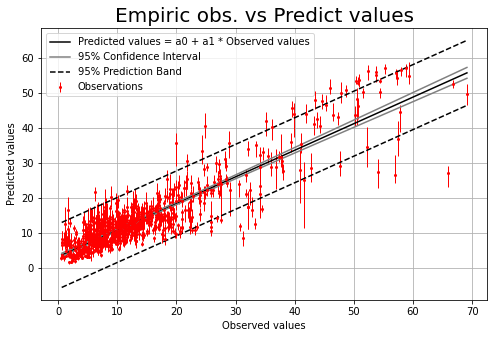

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 2.744, median - 2.748, CI - [2.486-2.975]

SHAP-values for: DBH_cm: mean - 2.222, median - 2.283, CI - [1.873-2.502]

SHAP-values for: H_m: mean - 1.562, median - 1.548, CI - [1.393-1.73]

SHAP-values for: Origin_ID: mean - 0.297, median - 0.296, CI - [0.245-0.349]

SHAP-values for: Species_ID: mean - 4.12, median - 4.127, CI - [3.909-4.312]



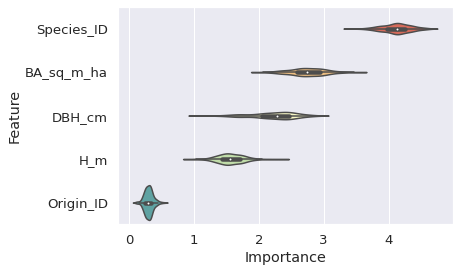

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Species_ID', 'BA_sq_m_ha', 'DBH_cm', 'H_m', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [27]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 86.41, median: 83.0,
 pred. interval (P(0.025)-P(0.975)): 19.975-169.025, 
 conf. interval (p-value=0.95): 45.246-131.356 
***
Aggregate bias statistic: 
 mean: -0.129, median: -0.14,
 pred. interval (P(0.025)-P(0.975)): -0.98-0.862, 
 conf. interval (p-value=0.95): -0.56-0.301 
***
Aggregate RMSE statistic: 
 mean: 5.471, median: 5.454, pred. interval (P(0.025)-P(0.975)): 4.287-6.637, 
 conf. interval (p-value=0.95): 4.891-6.094 
***
Aggregate MSE statistic: 
 mean: 30.335, median: 29.741, pred. interval (P(0.025)-P(0.975)): 18.376-44.051, 
 conf. interval (p-value=0.95): 23.957-37.181 
***
Aggregate R^2 statistic: 
 mean: 0.772, median: 0.775, pred. interval (P(0.025)-P(0.975)): 0.664-0.865, 
 conf. interval (p-value=0.95): 0.729-0.82 
***
Aggregate bias(%) statistic: 
 mean: -0.836, median: -1.018, pred. interval (P(0.025)-P(0.975)): -6.572-6.191, 
 conf. interval (p-value=0.95): -3.823-2.266 
***
Aggregate RMSE(%) statistic:

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'Distribution of predicted values')

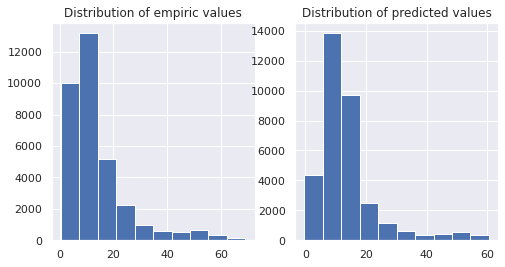

In [28]:
# Preprocessing

results_y['residuals'] = results_y[predictor] - results_y[0]

results_y['residuals_%'] =  results_y['residuals'] / results_y[predictor] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Distribution of empiric values')
axs[1].hist(results_y[0])
axs[1].set_title('Distribution of predicted values')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
intervals = pd.cut(results_y[predictor], [0, 10, 20, 30, 40, 50])

grouped = results_y.groupby(intervals)

max_obs_in_group = len(results_y)    
    
pre = pd.DataFrame()
pre_rel = pd.DataFrame()

pre = pre.assign(row_number=range(max_obs_in_group))
pre_rel = pre_rel.assign(row_number=range(max_obs_in_group))

for i in range(len(list(grouped))):
    pre[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals'])
    pre_rel[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals_%'])

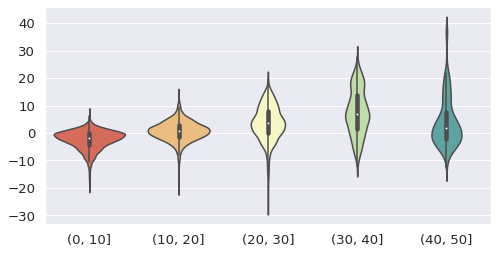

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre[list(pre.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

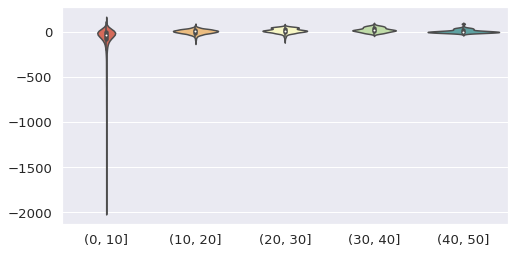

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel[(pre_rel.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [32]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [33]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [34]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:14.66011
[1]	validation_0-rmse:12.36023
[2]	validation_0-rmse:10.58667
[3]	validation_0-rmse:9.31591
[4]	validation_0-rmse:8.30416
[5]	validation_0-rmse:7.55587
[6]	validation_0-rmse:6.95542
[7]	validation_0-rmse:6.47527
[8]	validation_0-rmse:6.15947
[9]	validation_0-rmse:5.90619


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:5.68390
[11]	validation_0-rmse:5.52732
[12]	validation_0-rmse:5.28280
[13]	validation_0-rmse:5.18979
[14]	validation_0-rmse:5.11632
[15]	validation_0-rmse:5.05383
[16]	validation_0-rmse:4.89428
[17]	validation_0-rmse:4.75572
[18]	validation_0-rmse:4.68685
[19]	validation_0-rmse:4.61631
[20]	validation_0-rmse:4.54745
[21]	validation_0-rmse:4.47225
[22]	validation_0-rmse:4.42092
[23]	validation_0-rmse:4.39596
[24]	validation_0-rmse:4.38117
[25]	validation_0-rmse:4.35364
[26]	validation_0-rmse:4.31483
[27]	validation_0-rmse:4.25265
[28]	validation_0-rmse:4.19959
[29]	validation_0-rmse:4.16540
[30]	validation_0-rmse:4.14094
[31]	validation_0-rmse:4.06418
[32]	validation_0-rmse:3.98665
[33]	validation_0-rmse:3.97202
[34]	validation_0-rmse:3.92912
[35]	validation_0-rmse:3.86894
[36]	validation_0-rmse:3.85441
[37]	validation_0-rmse:3.83833
[38]	validation_0-rmse:3.79129
[39]	validation_0-rmse:3.75902
[40]	validation_0-rmse:3.74319
[41]	validation_0-rmse:3.72701
[42]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [35]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 171


In [36]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

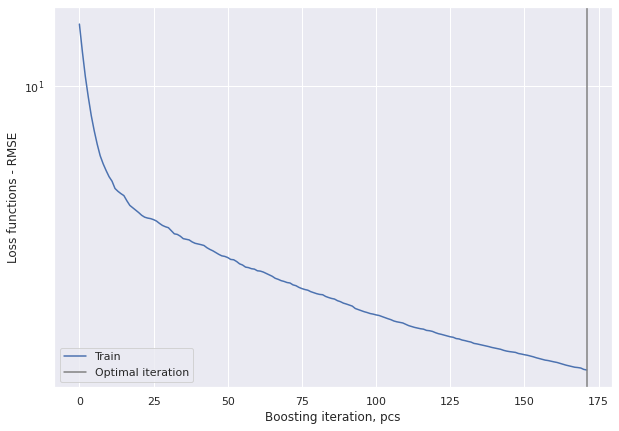

In [37]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [38]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.04
RMSE: 1.7
Relative RMSE(%):  12.383
MSE: 2.9
R square: 97.8%


In [39]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.979
Uncertainty
a0: 0.65+/-0.09
a1: 0.952+/-0.005


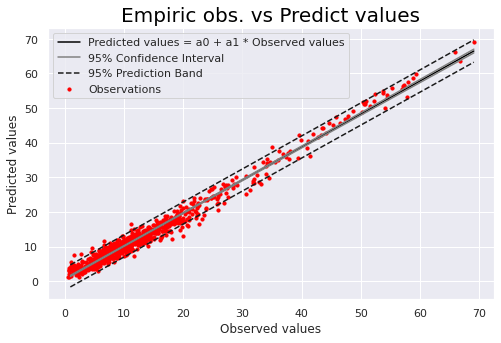

In [40]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

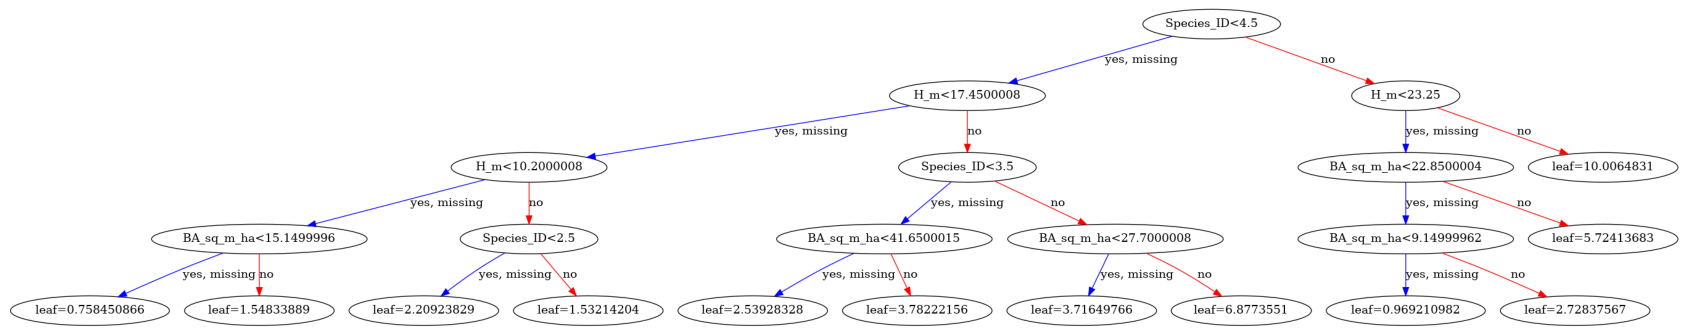

In [44]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

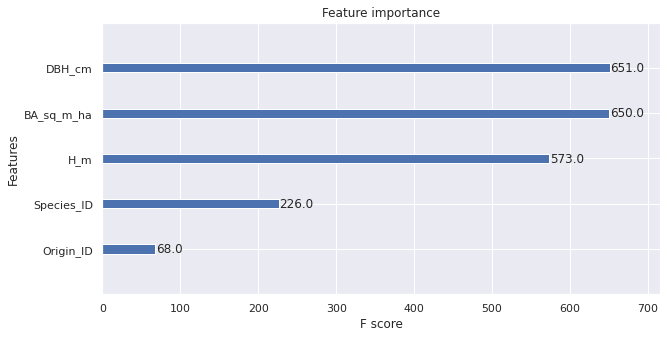

In [47]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

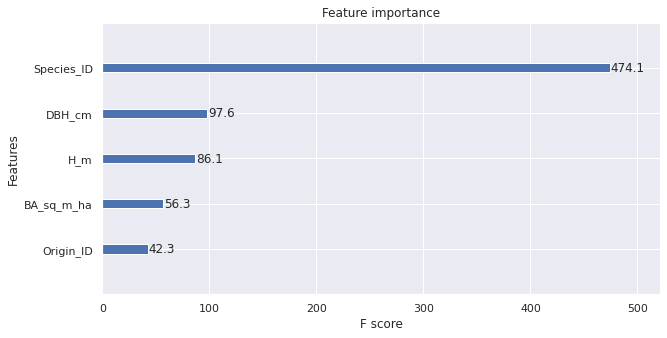

In [48]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

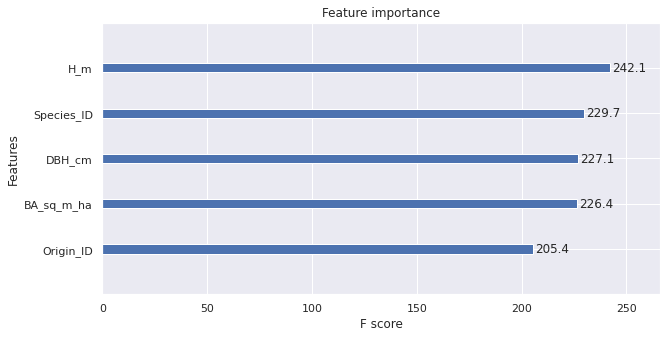

In [49]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


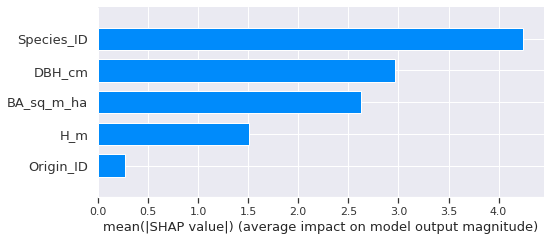

In [51]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

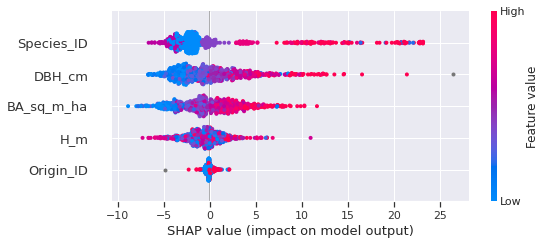

In [52]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

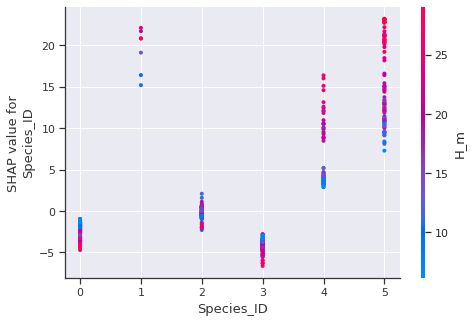

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


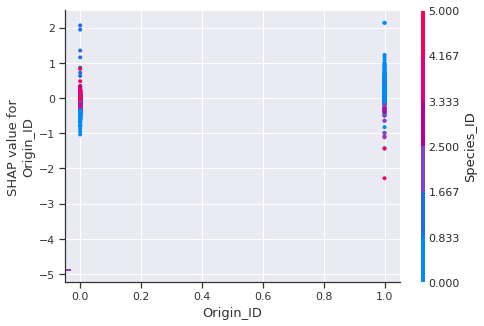

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


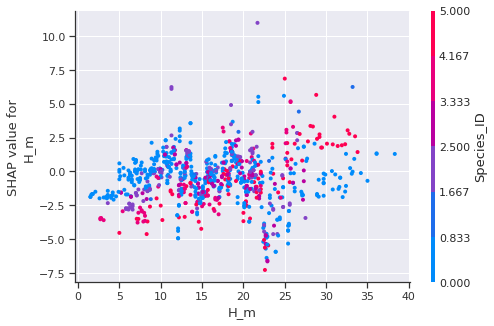

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


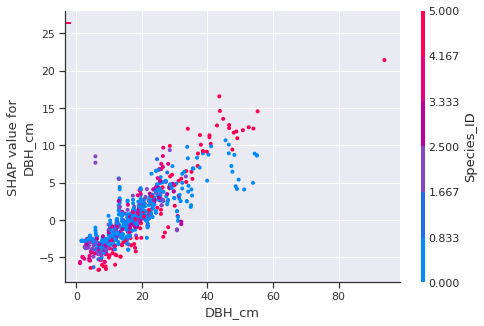

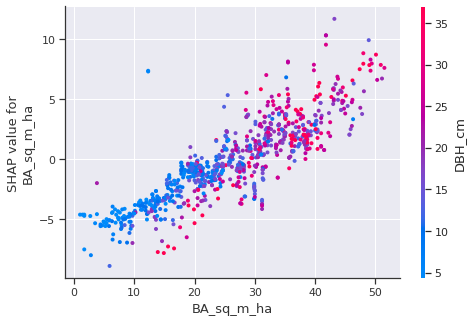

In [53]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [54]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_M_branch_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_M_branch_other_authors_XGB_model.txt")